#  EDA - Loan Default Analyis <br>
### Credit EDA Case Study 
####  Submitted by : Kamal Kumar, Ranjana Gupta



#<h1>1.Introduction:</h1>  <br>
The dilemma faced by lending institutions grant loans to people (Urban Consumers) due to  lack of  insufficient or non-existent credit history of the applicants.<br> 
Some consumers take advantage of this by becoming a defaulter proving a great risk to such companies  in terms of financial loss to the business. <br>
<br>

Two types of risks are associated with the loan providing companies eg Banks :

1. The applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company <br>
2. The applicant is not likely to repay the loan ie default,  then approving the loan may lead to a financial loss for the company. <br>


## <h2>1.1. Business Objectives:</h2> <br>
The company would like to  understand the driving factors (or driver variables) behind loan defaults so as to use this as part of the risk analysis on  a loan application <br>
- - Loss of Principle <br>
  - Loss of Interest



## <h2>1.2. Objective of the Study : </h2>  <br>
Use Exploratory Data Analysis  provide Insights to the Financial Instituitions to address above mentioned risks <br>

Based on inferences , financial institutions may take actions on   :
1. Genuine / Incorrect Loan Denial
2. Revision of Loan Amt and terms of repayment  eg reducing loan amount
3. Lending (to risky applicants) at a higher interest rate  to ensure guaranteed honouring of the loans 
4. Help the lender take correct decisions in terms of identifying  consumers ability  to honour the loans. 


#<h1>2. The Data Set</h1>  <br>
 



##<h3>2.1. Data Overview:</h3>  <br>
The dataset provided contains a vast number of details about the loan applicants. <br>
1. Current Loan Applications : Data pertaining to whether a consumer has payment difficulties.<br>
   Information pertaining to personal & social ie.  gender, age, number of family members, occupation ,income,income type, type of house and its locality,details of current loan application <br>
   External data of credit scores, inquiries to Credit Bureau <br> 
   Type of Loan, Credit, Annuity Down Payments <br>
   There are other data points related to documentation , phone etc <br>

2. Data information about the consumer's  previous loan applications  <br> 
   Type of loans taken , loans status ie  Approved, Cancelled, Refused or Unused offer.  <br> 
   Loan amt, down payment, processing time of the loans etc

3. Information describing each column in business terms is provided <br>

The Dataset can be downloaded from the UPGRAD Learning Portal <br>



##<h3>2.2. Data Specification: </h3>  <br>
There are three files :   <br>

1. application.csv                162240 Kb
2. previous_application.csv       395482 Kb
3. columns_description.csv            28 Kb     



##<h3>2.3. Relationship between two sets of information : </h3> <br>
    
> Application  One to Many Relation  with Previous_application <br>
> A current applicant may or may not  have a history of  one or multiple loan applications   <br> 



##<h3>2.4. Information available : </h3> <br>
1.Application <br>
>  Static data for all applications. One row represents one loan for each Customer, Contract type combination ,
   Data related to Loan Amt, credit, Annuity, down payment, Income, Age, Gender ,Occupation, Phone details,  Social informaiton, Loacality, information of default of customers in the similar location, Credit ratings from external sources etc <br>
   
2.Previous Application  <br>
>  Multiple loan applications against a borrower . Data related to the  various factes of a loan ie contract type,  portfolio, reason for loan, Days processing etc <br>

#<h1> 3. Importing  the libraries  </h1>


In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# sklearn preprocessing for dealing with categorical variables
#from sklearn.preprocessing import LabelEncoder

#<h1> 4. Data Quality Check </h1>

In [2]:
# Reading dataset from csv  - Application.csv and dataframe name = dfn
dfn = pd.read_csv('application_data.csv')
#PrevApplication = pd.read_csv('previous_application.csv')

In [3]:
# Settings to display all columns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
# display the dataframe head
dfn.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [4]:
dfn.shape


(307511, 122)

In [5]:
dfn.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [6]:
#General Overview of Current application table
print('-'*100)
print(f'The shape of Current_application.csv is: {dfn.shape}')
print('-'*100)
print(f'Number of duplicate values in Current_application: {dfn.shape[0] - dfn.duplicated().shape[0]}')
print('-'*100)




----------------------------------------------------------------------------------------------------
The shape of Current_application.csv is: (307511, 122)
----------------------------------------------------------------------------------------------------
Number of duplicate values in Current_application: 0
----------------------------------------------------------------------------------------------------


##<h3> 4.1. MODULAR FUNCTIONS USED  </h3> <br>
  Used  used as Routines where ever required to reduces the recurring of the code <br>
  Execute the function with required parameters & listed as follows as per analysis being conducted <br>
  House Keeping  Functions <br>
-  nan_df_create  - create & print nulls in dataframe with graph for visualization <br>   
-  print_unique_categ  - to print all 'object' data type columns



In [7]:
def print_unique_categories(data, column_name, show_counts = False):
  
    print('-'*100)
    print(f"The unique categories of '{column_name}' are:\n{data[column_name].unique()}")
    print('-'*100)
    
    if show_counts:
        print(f"Counts of each category are:\n{data[column_name].value_counts()}")
        print('-'*100)

In [8]:
 '''
    Generic Function to create a dataframe of percentage of NaN values for each column of the dataframe
    This function is called by the other fuctionn plot_nan_percent
    Inputs: ie data:  Dataframe  &   Returns:   DataFrame of NaN ie null percentages
    '''
def nan_df_create(data):  
    
    nan_percentages = data.isna().sum() * 100 / len(data)
    #Creating a DataFrame by passing a dict of objects that can be converted to series-like.
    df = pd.DataFrame({'column' : nan_percentages.index, 'percent' : nan_percentages.values})
      
    #sorting the dataframe by decreasing order of percentage of NaN values
    df.sort_values(by = 'percent', ascending = False, inplace = True)
    
    return df

def plot_nan_percent(df_nan, title_name, tight_layout = True, figsize = (20,8), grid = False, rotation = 90):
    
    '''
    Function to plot Bar Plots of NaN percentages for each Column with missing values    
   
    '''    
    #checking if there are columns with NaNs.
    if df_nan.percent.sum() != 0:
        print(f"Number of columns having NaN values: {df_nan[df_nan['percent'] != 0].shape[0]} columns")
        
        #plotting the Bar-Plot for NaN percentages (only for columns with Non-Zero percentage of NaN values)
        plt.figure(figsize = figsize, tight_layout = tight_layout)
        sns.barplot(x= 'column', y = 'percent', data = df_nan[df_nan['percent'] > 0])
        plt.xticks(rotation = rotation)
        plt.xlabel('Column Name')
        plt.ylabel('Percentage of NaN values')
        plt.title(f'Percentage of NaN values in {title_name}')
        if grid:
            plt.grid()
        plt.show()
    else:
        print(f"The dataframe {title_name} does not contain any NaN values.")



##### Check for Null - Missing values in all the columns of the dfn  - graphical representation

Number of columns having NaN values: 67 columns


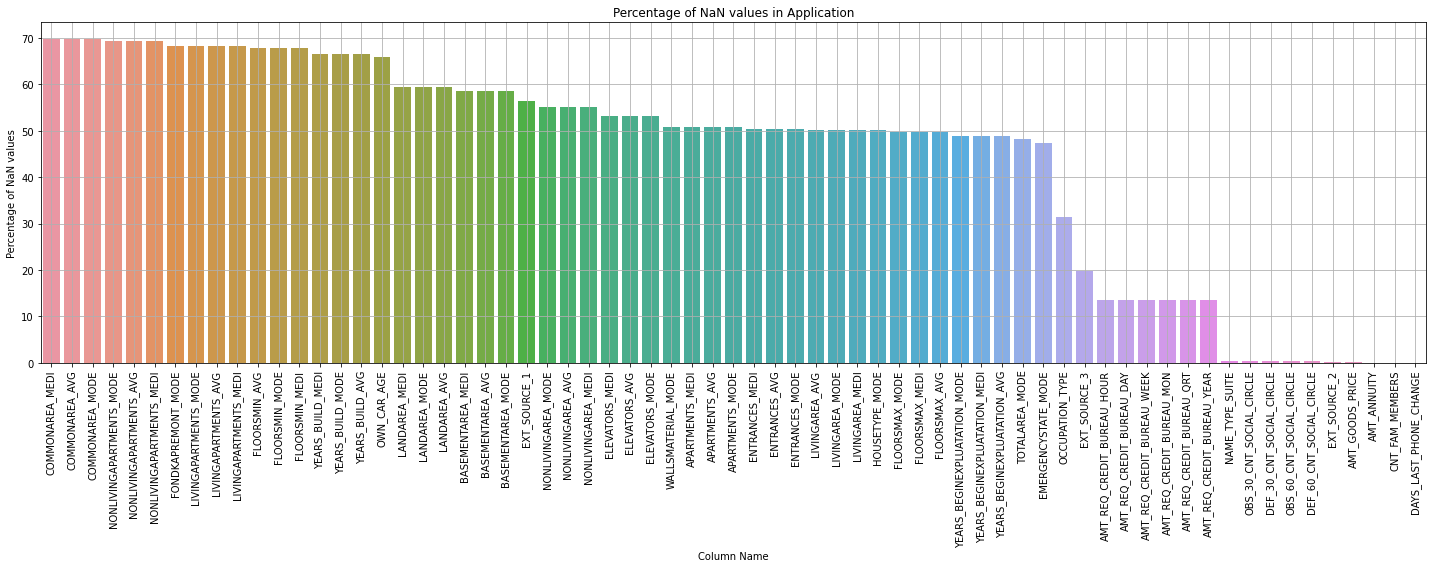

In [9]:
#invoke function to plot & within this pass function for creation of NaN Dataframe which will be plotted
#Pass the dataframe name & title of the dataframe eg 'Application  or 'Previous Application'
plot_nan_percent(nan_df_create(dfn), 'Application', grid = True)

#### No of Columns of dataframe 'dfn' have Nulls > 50 %  = 41

## <h3> 4.2. Strategy for Addressing Null  Values  </h3> <br>

#### 1. DROP colunmns having Null >=  50 % <br>

1. There are a total of  67columns which have nulls/missing values <br>

2. Columns having Null values  > 50 %  are  candidates for drop  as it will  difficult to find a logics to impute missing data <br>

>  On furthe analysis , most of these cases pertain to information related to customers house ie Locality, Floor Space , Age of Building, Type of residence  etc <br>

So we would drop columns >= 50 % Missing cases  = 41 columns  


In [10]:
# List the columns
#Create a list of columns > 50 % nulls
cols = dfn.columns[dfn.isnull().mean()>=0.50]
cols

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE'],
      dtype='object')

In [11]:
delnull = int(len(cols))
print('No of Columns >50 percent Nulls =  %i'%(delnull))

No of Columns >50 percent Nulls =  41


In [12]:
#Brute force method to delete columns >=50% NaN cases but retaining 'OWN_CAR_AGE', 'EXT_SOURCE_1' 
#these may contribute to defaulters traits 
dfn = dfn.drop(columns=[  'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'EXT_SOURCE_1',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE'
                       ])


In [13]:
dfn.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [14]:
#Create a list of columns 50  % nulls
cols = dfn.columns[dfn.isnull().mean()>0.50]
cols  


Index(['OWN_CAR_AGE'], dtype='object')

In [15]:
dfn.shape

(307511, 82)

In [16]:
(round(dfn.isnull().mean()*100,2).sort_values(ascending = False)) 


OWN_CAR_AGE                     65.99
FLOORSMAX_AVG                   49.76
FLOORSMAX_MODE                  49.76
FLOORSMAX_MEDI                  49.76
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BEGINEXPLUATATION_MEDI    48.78
YEARS_BEGINEXPLUATATION_MODE    48.78
TOTALAREA_MODE                  48.27
EMERGENCYSTATE_MODE             47.40
OCCUPATION_TYPE                 31.35
EXT_SOURCE_3                    19.83
AMT_REQ_CREDIT_BUREAU_HOUR      13.50
AMT_REQ_CREDIT_BUREAU_QRT       13.50
AMT_REQ_CREDIT_BUREAU_DAY       13.50
AMT_REQ_CREDIT_BUREAU_WEEK      13.50
AMT_REQ_CREDIT_BUREAU_MON       13.50
AMT_REQ_CREDIT_BUREAU_YEAR      13.50
NAME_TYPE_SUITE                  0.42
DEF_60_CNT_SOCIAL_CIRCLE         0.33
OBS_60_CNT_SOCIAL_CIRCLE         0.33
DEF_30_CNT_SOCIAL_CIRCLE         0.33
OBS_30_CNT_SOCIAL_CIRCLE         0.33
EXT_SOURCE_2                     0.21
AMT_GOODS_PRICE                  0.09
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PH

Number of columns having NaN values: 27 columns


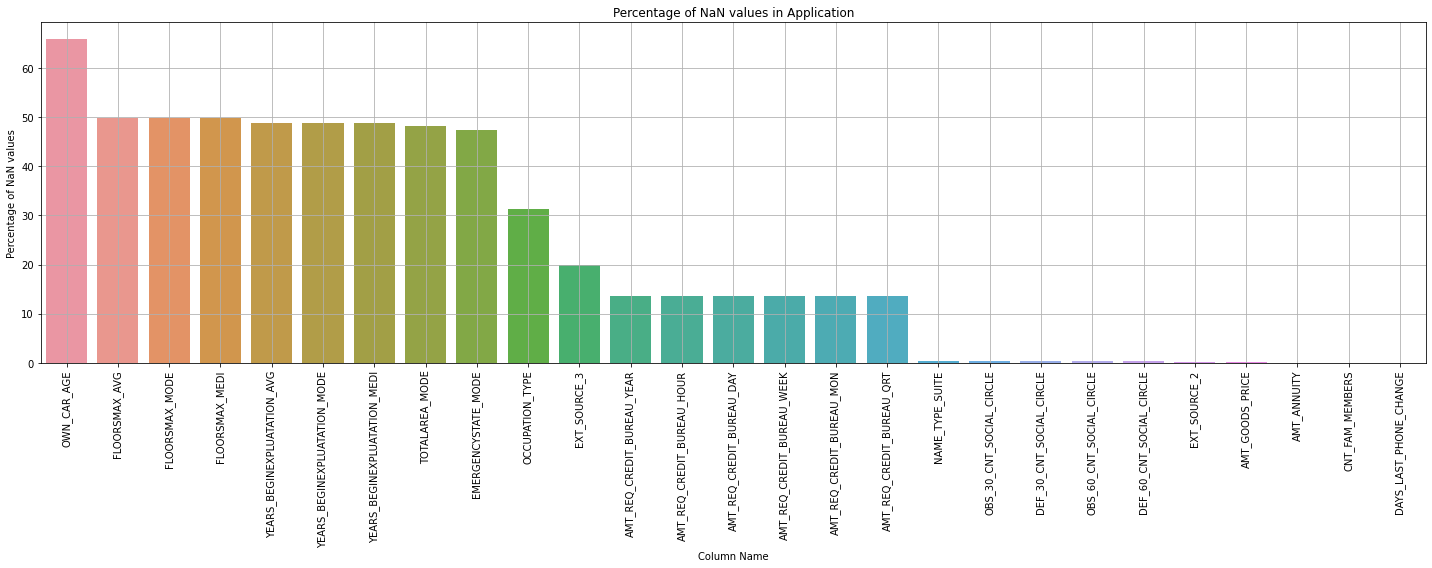

In [17]:
plot_nan_percent(nan_df_create(dfn), 'Application', grid = True)

##### On further inspection columns related to FLAG_DOCUMENT_%  may also be dropped  <br>
>> Reason : We are unable to derive any meaningful value due to lack of clarity  <br>
    
> The following variables will also be dropped
>> Reason : No clarity on them and nulls ~ > 48 % <br>
>>YEARS_BEGINEXPLUATATION_AVG     48.78 <br>
>>YEARS_BEGINEXPLUATATION_MODE    48.78 <br>
>>YEARS_BEGINEXPLUATATION_MEDI    48.78  <br>
>>FLOORSMAX_MODE
>>FLOORSMAX_AVG

In [18]:
dfn.drop(["FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5","FLAG_DOCUMENT_6","FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21",
         "YEARS_BEGINEXPLUATATION_AVG","YEARS_BEGINEXPLUATATION_MEDI","YEARS_BEGINEXPLUATATION_MODE" ,"FLOORSMAX_MODE","FLOORSMAX_AVG"],axis=1,inplace=True)
dfn.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

#### Arrived at list of 58 columns which may be used for EDA

In [19]:
dfn.shape

(307511, 57)

In [20]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

##<h3>4.3. Outliers &  Imputation  </h3> <br>
Analysis of  Outliers ,Impute , Datatype typecast  <br>



In [21]:
dfn.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [22]:
#Check for Unique values
dfn.nunique().sort_values()

EMERGENCYSTATE_MODE                 2
REG_REGION_NOT_LIVE_REGION          2
FLAG_EMAIL                          2
FLAG_PHONE                          2
FLAG_CONT_MOBILE                    2
FLAG_WORK_PHONE                     2
FLAG_EMP_PHONE                      2
FLAG_MOBIL                          2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
FLAG_OWN_REALTY                     2
TARGET                              2
NAME_CONTRACT_TYPE                  2
FLAG_OWN_CAR                        2
REGION_RATING_CLIENT_W_CITY         3
REGION_RATING_CLIENT                3
CODE_GENDER                         3
NAME_EDUCATION_TYPE                 5
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_HOUSING_TYPE                   6
NAME_FAMILY_STATUS                  6
NAME_TYPE_SUITE                     7
WEEKDAY_APPR_PROCESS_START          7
NAME_INCOME_

###<h3> 4.3.1. OUTLIERS - Identify and suggest treatment </h3> <br>



#### A. Financial Variables
> 1. AMT_INCOME_TOTAL: 
    1. 1 row each  having value 307511000, 117000000,13500000, 9000000,6750000  respectively <br>
    2. 4 rows having value 4500000 <br>
    3. 1 row having value 3825000,3600000 <br
    4. 2 rows having value 3375000 etc <br>
        Iterative process of deletion & checking box plots,stats  optimum level for outliers >= 500000 <br>
        No. of rows  dropped = 738 <br>
        This was arrived at by  reviewing the statistics after dropping suggested records <br>
        
> 2.The comparative box plot of Income,Credit,Annuity, Goods value  suggest as income increases , a +ve linear trend is evident in all 3 variables  , will not suggest outliers <br.
    AMT_GOODS_PRICE <br>
    AMT_CREDIT <br>
    AMT_ANNUITY  <br>



#### B. DAYS_EMPLOYED
> 3. DAYS_EMPLOYED  <br>
     Outliers detected below 25 % & above 75 % Quantile  <>
     a. Below 25 % quantile   ~ 49 years  Treat as outliers as all cases where Years of Employment is > 35 years <br>
>> Assumption a person can work for 35 years max)  - Drop such cases <br>
     b.Above 75 % quantile   ~ 100 years which  on further analysis of reveal this data subset has INCOME_TYPE = Pensioners, Not Employed - Impute to 0 <br>
> 4. DAYS_BIRTH - No Outliers, No null values  value range 20 - 70 years appears ok<br>



#### C. External Data Source <br>
> EXT_DATA_SOURCE_1,EXT_DATA_SOURCE_2,EXT_DATA_SOURCE_3  - No outliers detected as far as abnormal values are concerned, impute <br>
> 4. EXT_DATA_SOURCE_1  has approx 56 % null values <br>
> 5. EXT_DATA_SOURCE_2  has approx .021 of null values <br>
> 6. EXT_DATA_SOURCE_3  has approx 20 % of null values <br>
>> Assumption : This data shows the credit rating of the borrowers by various agencies where the lender has taken earlier loans & credit history . This will be very important data <br>
>> Treatment of Nulls : Create new column of EXT_SOURCE_MEAN  and compute mean for the 3 ratings <br>



#### D. Categorical Variables <br>
> 7.OCCUPATION_TYPE  nulls > 31 %  will not be treated as outliers  & will have to impute<br>
    


#### E. Other Variables - No Outliers detected

> 9. AMT_REQ_CREDIT_BUREAU_QRT       13.50 <br>
> 10. AMT_REQ_CREDIT_BUREAU_DAY       13.50 <br>      
> 11. AMT_REQ_CREDIT_BUREAU_MON       13.50 <br>
> 12. AMT_REQ_CREDIT_BUREAU_HOUR      13.50 <br>
> 13. DEF_30_CNT_SOCIAL_CIRCLE         0.33 <br>
> 14. OBS_30_CNT_SOCIAL_CIRCLE         0.33 <br>
> 15  DEF_60_CNT_SOCIAL_CIRCLE         0.33 <br>
> 16. OBS_60_CNT_SOCIAL_CIRCLE         0.33 <br>
> 17. DAYS_BIRTH  - No nulls, and no outliers detected
>
--------------------------------------------------------------------------------------------------


###<h3> 4.3.2. Impute Strategy  for null values </h3> <br>



####  A. Financial Variables -
> AMT_INCOME_TOTAL: Binning of AMT_INCOME_TOTAL will be required .The suggested ranges are No Income, Low Income, Low Middle Income, Upper Middle Income, High Income, Super Rich <br>
>> No Impute is required , only removal of absurdly high values approx 3 recs

> AMT_GOODS_PRICE ,AMT_ANNUITY- delete records. the null values  % is  < .01 <>



####  B. Age & Employment duration  <br>
> DAYS_EMPLOYED impute with 0 as outliers explain income type Pensioners , Not Employed <br>
> DAYS_BIRTH  No impute required



####  C. External Data Source <br>
> EXT_DATA_SOURCE_1,EXT_DATA_SOURCE_2,EXT_DATA_SOURCE_3 : <br>
>>No impute of the 3 columns , create new  column EXT_SOURCE_MEAN  which will be mean of the 3 data sources <br>



#### D. Categorical Variables <br>
> OCCUPATION_TYPE 
>> Based on Income Bracket, the  mode of the  OCCUPATION _TYPE records by doing a group by on the basis of Income bins <br> 



#### E .Other Variables <br>
As these variables may have an influence on indentification of defaulters the median value can be imputed for missing values <br> <br>

1.For these cases the median value was 0 so can impute null with 0  <br>
> AMT_REQ_CREDIT_BUREAU_QRT       13.50 <br>
> AMT_REQ_CREDIT_BUREAU_DAY       13.50 <br>      
> AMT_REQ_CREDIT_BUREAU_MON       13.50 <br>
> AMT_REQ_CREDIT_BUREAU_HOUR      13.50 <br>
> DEF_30_CNT_SOCIAL_CIRCLE         0.33 <br>
> OBS_30_CNT_SOCIAL_CIRCLE         0.33 <br>
> DEF_60_CNT_SOCIAL_CIRCLE         0.33 <br>
> OBS_60_CNT_SOCIAL_CIRCLE         0.33 <br>
> AMT_REQ_CREDIT_BUREAU_YEAR      13.50 <br>

2.Impute with 0 for Numerical variable < 1 % null values <br>
> CNT_FAM_MEMBERS  negligibe      0.001 <br>

3.Impute Unknown for categorical variables  < 1 %  null values <br>
> NAME_TYPE_SUITE  Nulls % 0.42 <br>  
> NAME_GENDER  - No impute address gender  diversity



### 4.3.3.Details steps for detecting  OUTLIERS & arriving at  IMPUTE recommendations
>Details  are shown to support our findings and suggested handling of outliers and missing values 


####  A. Financial Data
#####  AMT_INCOME_TOTAL

In [23]:
#AMT_INCOME_TOTAL
# INITIAL Stats  before removal of outliers    - very high value income 117000000
dfn.AMT_INCOME_TOTAL.describe().apply("{0:.5f}".format)

count       307511.00000
mean        168797.91930
std         237123.14628
min          25650.00000
25%         112500.00000
50%         147150.00000
75%         202500.00000
max      117000000.00000
Name: AMT_INCOME_TOTAL, dtype: object

> The box plot is not very informative as there is an abnormal outliers which if removed may give further insight. <br>
> Three records observed having abnormally high income amt and could be deleted

____________________________________________________________________________________________________
count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64
____________________________________________________________________________________________________


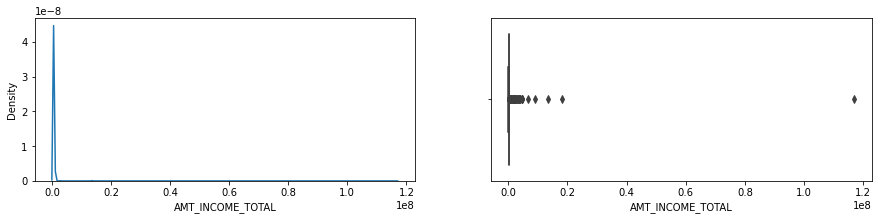

In [24]:
# AMT_INCOME_TOTAL 
print('_'*100)
print(dfn.AMT_INCOME_TOTAL.describe())
print('_'*100)

## Plot
plt.figure(figsize = (15,3))

plt.subplot(1,2,1)
sns.distplot(dfn.AMT_INCOME_TOTAL, hist = False)

plt.subplot(1,2,2)
sns.boxplot(dfn.AMT_INCOME_TOTAL)
plt.show()

In [25]:
#Check for rows to remove for   outliers

(dfn[dfn['AMT_INCOME_TOTAL'] >= 6000000 ].sort_values(by = 'AMT_INCOME_TOTAL', ascending = False))


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
12840       114967       1         Cash loans           F            N   
203693      336147       0         Cash loans           M            Y   
246858      385674       0         Cash loans           M            Y   
77768       190160       0         Cash loans           F            Y   
131127      252084       0         Cash loans           M            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
12840                Y             1       117000000.0    562491.0   
203693               Y             2        18000090.0    675000.0   
246858               Y             0        13500000.0   1400503.5   
77768                N             0         9000000.0   1431531.0   
131127               N             0         6750000.0    790830.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
12840       26194.5         454500.0   Unaccompanied               Working   
203693      69295.5         675000.0   Unaccompanied  Commercial associate   
246858     130945.5        1368000.0   Unaccompanied  Commercial associate   
77768      132601.5        1377000.0   Unaccompanied               Working   
131127      52978.5         675000.0   Unaccompanied               Working   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
12840   Secondary / secondary special            Married  House / apartment   
203693  Secondary / secondary special            Married  House / apartment   
246858               Higher education            Married  House / apartment   
77768                Higher education     Civil marriage  House / apartment   
131127               Higher education            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
12840                     0.010643      -12615           -922   
203693                    0.030755      -15704          -4961   
246858                    0.030755      -13551           -280   
77768                     0.010147      -16425          -8476   
131127                    0.009549      -19341           -443   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
12840             -6762.0            -3643          NaN           1   
203693            -3338.0            -4728          7.0           1   
246858            -3953.0            -4972         10.0           1   
77768             -7276.0            -1656          8.0           1   
131127            -7414.0            -2886          8.0           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
12840                1                0                 1           0   
203693               1                0                 1           0   
246858               1                1                 1           0   
77768                1                0                 1           0   
131127               1                1                 1           1   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
12840            0        Laborers              3.0                     2   
203693           0             NaN              4.0                     2   
246858           0             NaN              2.0                     2   
77768            0        Managers              2.0                     2   
131127           0        Laborers              2.0                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
12840                             2                    TUESDAY   
203693                            2                   THURSDAY   
246858                            2                     SUNDAY   
77768                             2                     FRIDAY   
131127                            2                    TUESDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
12840             

In [26]:
#This was executed to see the box plot for meaningful analysis   
#dfn.drop(dfn[dfn.AMT_INCOME_TOTAL >= 13500000].index, inplace=True)


#####  AMT_GOODS_PRICE, AMT_CREDIT, AMT_ANNUITY  
>  Comparative Analysis of Outliers for Financial data ie <br>
> AMT_CREDIT, AMT_ANNUITY,AMT_GOOD_PRICE- Linear relation
> AMT_GOOD_PRICE -  if Annuity,Credit is higher , goods price may be correspondingly higher depending on Contract type


In [27]:
dfn[['AMT_INCOME_TOTAL','AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY']].describe()

AMT_INCOME_TOTAL  AMT_GOODS_PRICE    AMT_CREDIT    AMT_ANNUITY
count      3.075110e+05     3.072330e+05  3.075110e+05  307499.000000
mean       1.687979e+05     5.383962e+05  5.990260e+05   27108.573909
std        2.371231e+05     3.694465e+05  4.024908e+05   14493.737315
min        2.565000e+04     4.050000e+04  4.500000e+04    1615.500000
25%        1.125000e+05     2.385000e+05  2.700000e+05   16524.000000
50%        1.471500e+05     4.500000e+05  5.135310e+05   24903.000000
75%        2.025000e+05     6.795000e+05  8.086500e+05   34596.000000
max        1.170000e+08     4.050000e+06  4.050000e+06  258025.500000

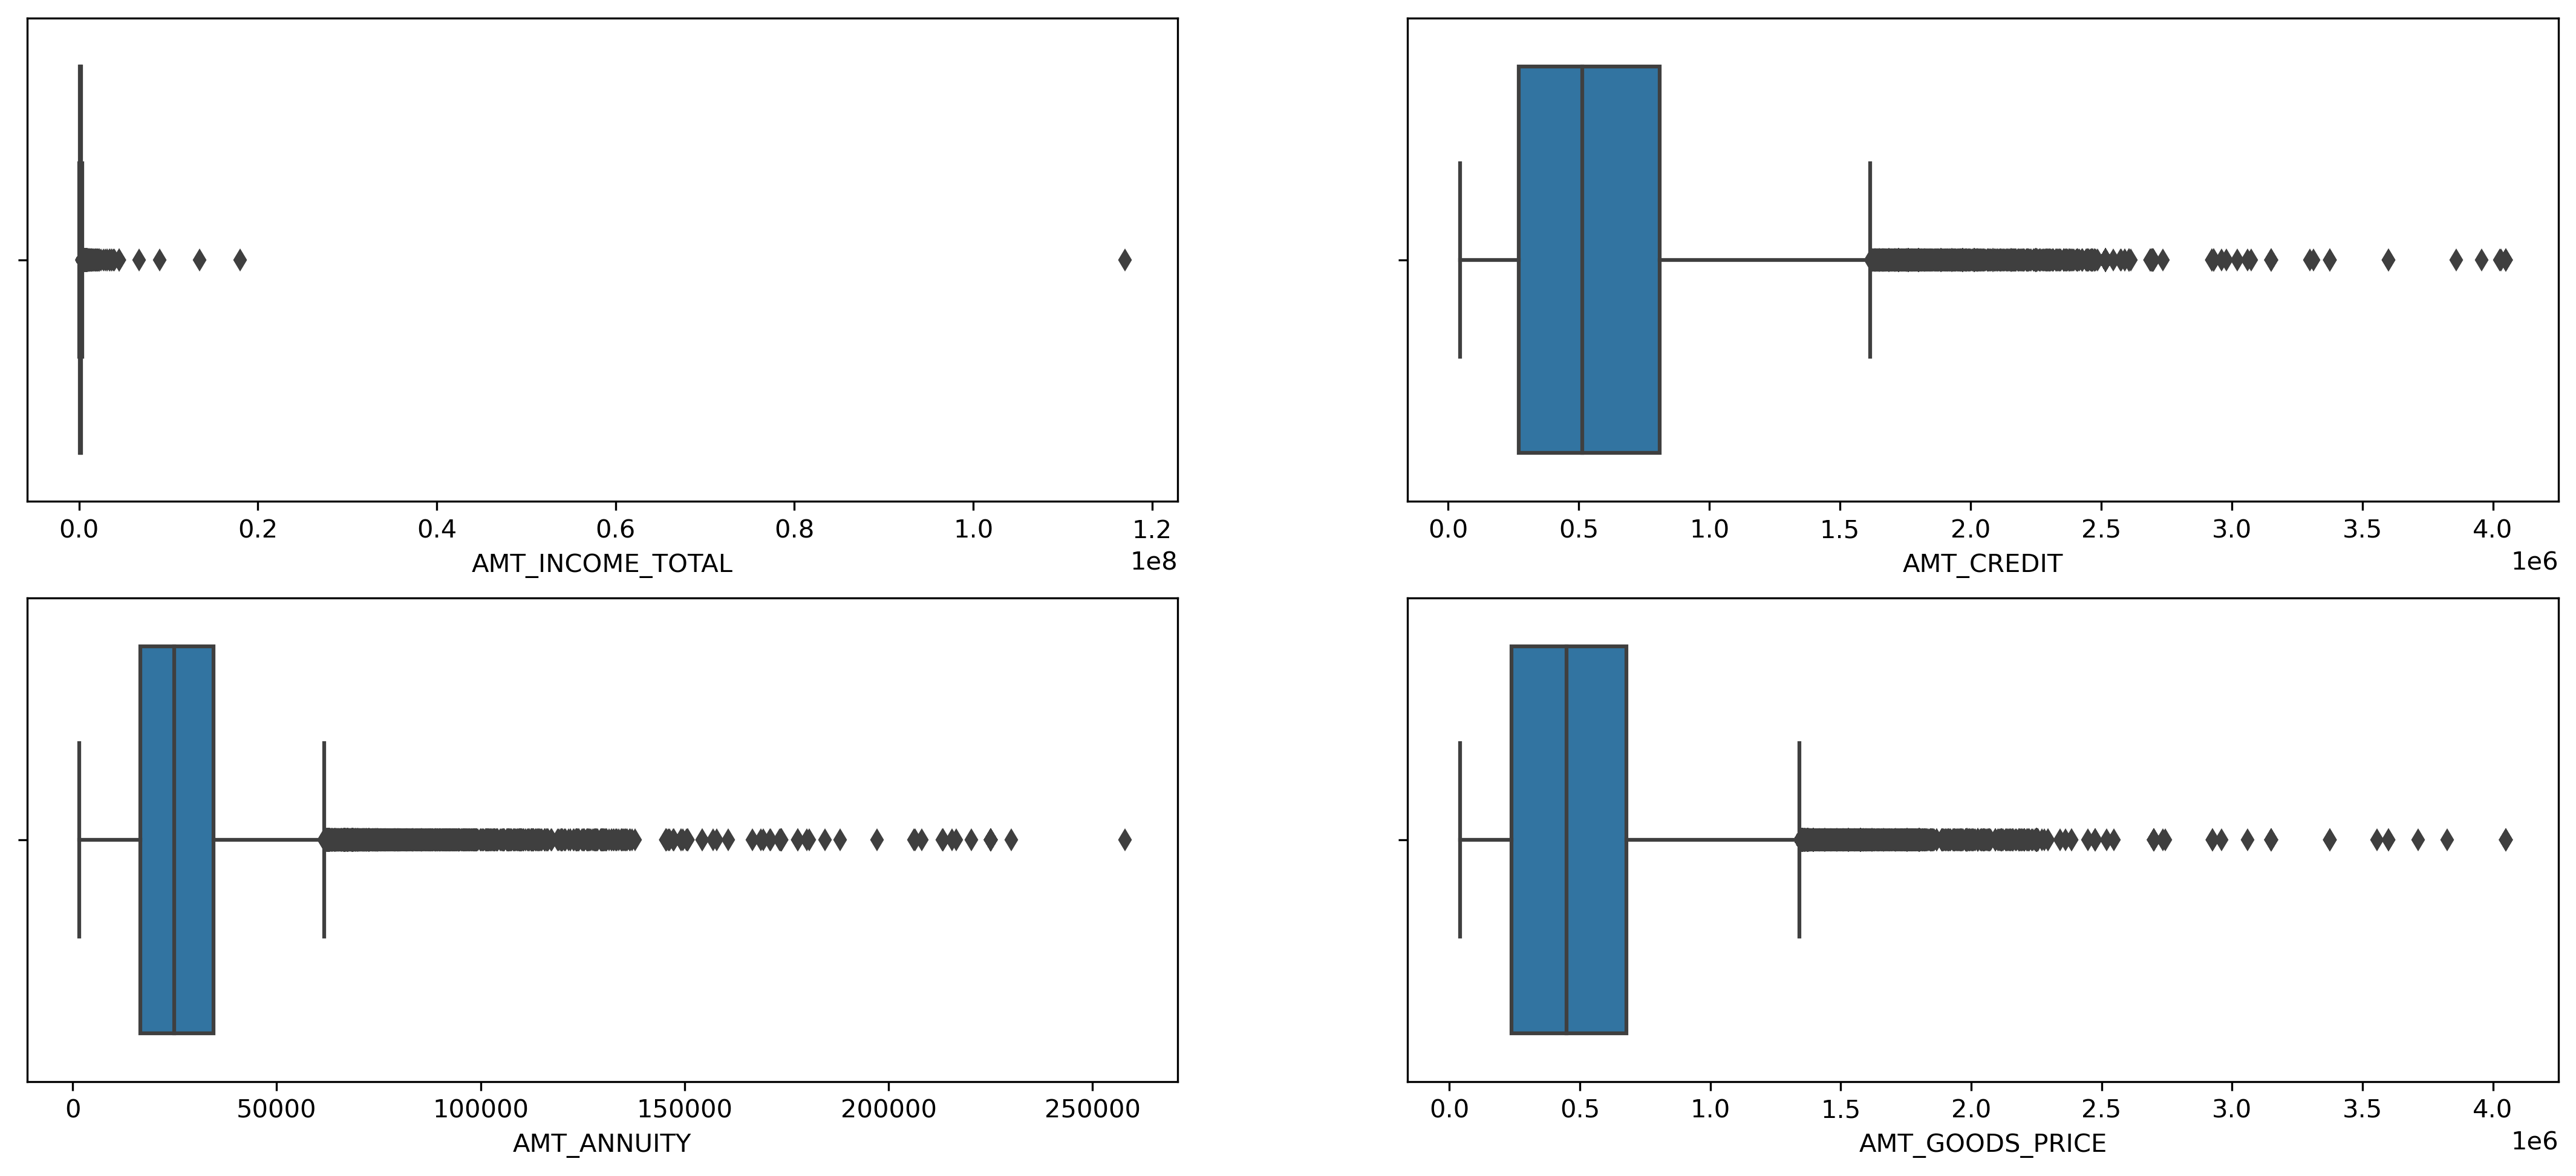

In [28]:
features = [ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']

plt.figure(figsize = (18, 12), dpi=300)
for i in enumerate(features):
    plt.subplot(3, 2, i[0]+1)
    sns.boxplot(x = i[1], data = dfn)
plt.show()

____________________________________________________________________________________________________
         AMT_CREDIT    AMT_CREDIT  AMT_GOODS_PRICE
count  3.075110e+05  3.075110e+05     3.072330e+05
mean   5.990260e+05  5.990260e+05     5.383962e+05
std    4.024908e+05  4.024908e+05     3.694465e+05
min    4.500000e+04  4.500000e+04     4.050000e+04
25%    2.700000e+05  2.700000e+05     2.385000e+05
50%    5.135310e+05  5.135310e+05     4.500000e+05
75%    8.086500e+05  8.086500e+05     6.795000e+05
max    4.050000e+06  4.050000e+06     4.050000e+06
____________________________________________________________________________________________________


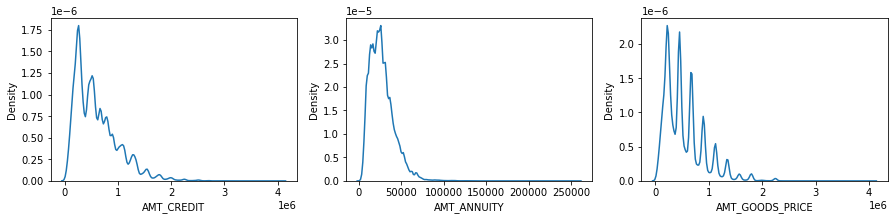

In [29]:
print('_'*100)
print(dfn[['AMT_CREDIT','AMT_CREDIT','AMT_GOODS_PRICE']].describe())
print('_'*100)

## Plot
plt.figure(figsize = (15,3))
plt.subplot(1,3,1)
sns.distplot(dfn.AMT_CREDIT, hist = False)

plt.subplot(1,3,2)
sns.distplot(dfn.AMT_ANNUITY, hist = False)
 

plt.subplot(1,3,3)
sns.distplot(dfn.AMT_GOODS_PRICE, hist = False)
plt.show()

In [30]:
column_name = 'AMT_CREDIT'
percentiles = list(range(0,80,25)) + list(range(90,101,2))
for i in percentiles:
    print(f'The {i}th percentile value of {column_name} is {np.percentile(dfn[column_name].dropna(), i)}')
    if i == 25:
        Q1 = i
    elif i ==50:
        Q2 = i
    elif i == 75:
        Q3  = i
    else:
        print('-')
        

  
IQR = Q3 - Q1 
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
outlier =[]

print('low_limit is', low_lim)
print('up_limit is', up_lim)

The 0th percentile value of AMT_CREDIT is 45000.0
-
The 25th percentile value of AMT_CREDIT is 270000.0
The 50th percentile value of AMT_CREDIT is 513531.0
The 75th percentile value of AMT_CREDIT is 808650.0
The 90th percentile value of AMT_CREDIT is 1133748.0
-
The 92th percentile value of AMT_CREDIT is 1255680.0
-
The 94th percentile value of AMT_CREDIT is 1305000.0
-
The 96th percentile value of AMT_CREDIT is 1436850.0
-
The 98th percentile value of AMT_CREDIT is 1661418.0
-
The 100th percentile value of AMT_CREDIT is 4050000.0
-
Interquartile range is 50
low_limit is -50.0
up_limit is 150.0


In [31]:
column_name = 'AMT_GOODS_PRICE'
percentiles = list(range(0,80,25)) + list(range(90,101,2))
for i in percentiles:
    print(f'The {i}th percentile value of {column_name} is {np.percentile(dfn[column_name].dropna(), i)}')
    if i == 25:
        Q1 = i
    elif i ==50:
        Q2 = i
    elif i == 75:
        Q3  = i
    else:
        print('-')
        

  
IQR = Q3 - Q1 
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
outlier =[]

print('low_limit is', low_lim)
print('up_limit is', up_lim)

The 0th percentile value of AMT_GOODS_PRICE is 40500.0
-
The 25th percentile value of AMT_GOODS_PRICE is 238500.0
The 50th percentile value of AMT_GOODS_PRICE is 450000.0
The 75th percentile value of AMT_GOODS_PRICE is 679500.0
The 90th percentile value of AMT_GOODS_PRICE is 1093500.0
-
The 92th percentile value of AMT_GOODS_PRICE is 1125000.0
-
The 94th percentile value of AMT_GOODS_PRICE is 1170000.0
-
The 96th percentile value of AMT_GOODS_PRICE is 1350000.0
-
The 98th percentile value of AMT_GOODS_PRICE is 1575000.0
-
The 100th percentile value of AMT_GOODS_PRICE is 4050000.0
-
Interquartile range is 50
low_limit is -50.0
up_limit is 150.0


In [32]:
column_name = 'AMT_ANNUITY'
percentiles = list(range(0,80,25)) + list(range(90,101,2))
for i in percentiles:
    print(f'The {i}th percentile value of {column_name} is {np.percentile(dfn[column_name].dropna(), i)}')
    if i == 25:
        Q1 = i
    elif i ==50:
        Q2 = i
    elif i == 75:
        Q3  = i
    else:
        print('-')
        

  
IQR = Q3 - Q1 
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
outlier =[]

print('low_limit is', low_lim)
print('up_limit is', up_lim)

The 0th percentile value of AMT_ANNUITY is 1615.5
-
The 25th percentile value of AMT_ANNUITY is 16524.0
The 50th percentile value of AMT_ANNUITY is 24903.0
The 75th percentile value of AMT_ANNUITY is 34596.0
The 90th percentile value of AMT_ANNUITY is 45954.0
-
The 92th percentile value of AMT_ANNUITY is 48465.0
-
The 94th percentile value of AMT_ANNUITY is 51745.5
-
The 96th percentile value of AMT_ANNUITY is 55624.5
-
The 98th percentile value of AMT_ANNUITY is 62964.0
-
The 100th percentile value of AMT_ANNUITY is 258025.5
-
Interquartile range is 50
low_limit is -50.0
up_limit is 150.0


####  B. DAYS_EMPLOYED

##### Check for Outliers <br>

>  The Stats shows a value of 365423 which if converted into years = 1000 years , hence can we delete  ? <br>
>  No of such rows = 55002  may not be able to drop such cases , further investigation required <br>
>  BOXPLOT : 
>  Below 25 % quantile   ~ 49 years  Treat as outliers as all cases where Years of Employment is > 35 years , assumption a person works for approx 35 years max <br>
>  Above 75 % quantile   ~ 100 years which is not correct but requires further analysis


____________________________________________________________________________________________________
       DAYS_EMPLOYED
count  307511.000000
mean    63815.045904
std    141275.766519
min    -17912.000000
25%     -2760.000000
50%     -1213.000000
75%      -289.000000
max    365243.000000
____________________________________________________________________________________________________


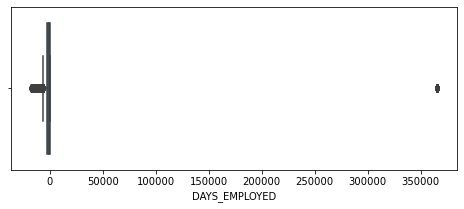

In [33]:
print('_'*100)
print(dfn[['DAYS_EMPLOYED']].describe())
print('_'*100)
dfn['DAYS_EMPLOYED'].describe()
plt.figure(figsize =(8,3))
sns.boxplot(dfn.DAYS_EMPLOYED)
plt.show()

In [34]:
#Above 75 %
Years = 365243/365
Years

1000.6657534246575

In [35]:
#Below 25 %
Years = -17912/365
Years

-49.07397260273972

In [36]:
#Create subset of such cases dfn1 dataframe
dfn1 = dfn[dfn['DAYS_EMPLOYED'] ==  365243]
len(dfn1)

55374

>  The subset of data with outlier DAYS_EMPLOYED = 365243  was created <br>
> The unique value  in this subset pertain to Pensioners & Not Employed <br>
> Hence such records may be imputed with 0 DAYS_EMPLOYED <br>




In [37]:
#NAME_INCOME_TYPE for DAYS_EMPLOYED = 365243  
dfn1.NAME_INCOME_TYPE.value_counts()

Pensioner     55352
Unemployed       22
Name: NAME_INCOME_TYPE, dtype: int64

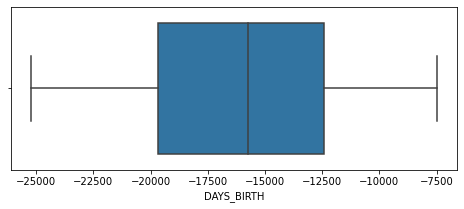

In [38]:
#DAYS_BIRTH  -Box Plot Prior to action on Outliers

plt.figure(figsize =(8,3))
sns.boxplot(dfn.DAYS_BIRTH)
plt.show()

In [39]:
dfn.DAYS_BIRTH.describe()    
#below 50 %Quantile  avg age is 43 %, lowest is 68 years
#75th Quantile avg age is 35 years
#No outliers 

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

##### Recommendations for outlier handling
######     1. DAYS_EMPLOYED : Handling of Outliers ie dfn.loc[dfn.DAYS_EMPLOYED == 365243.0, 'DAYS_EMPLOYED'] = 0  <br>
          Impute outliers = 0  as these pertain to Pensiones as shown in cell No 214

######     2. DAYS_EMPLOYED <= -14000]  ie > 35 years  <br>
           Drop the rows as we will assumne the Max Working Years ~ 35 years


In [40]:
#Code for DAYS_EMPLOYED Impute 

In [41]:
#1>Code for Imputing DAYS_EMPLOYED to 0 
#dfn.loc[dfn.DAYS_EMPLOYED == 365243.0, 'DAYS_EMPLOYED'] = 0
#2>Drop the outlier record for > 14000 ie 35 years
#dfn.drop(dfn[dfn.DAYS_EMPLOYED <= -14000].index, inplace=True)

####  C. EXT_SOURCE_X

##### EXT_SOURCE_2' & 'EXT_SOURCE_3'
An insight from the the EXT_Source can be generated by taking mean of the ratings from all the three sources, this could be a driving factor if it was created based on the past record of client. <br>
Create new column for avg of EXT_SOURCE_2','EXT_SOURCE_3' credit ratings <br>
Ignored 'EXT_SOURCE_1' as around 60% data were missing from the column

In [42]:
# 'EXT_SOURCE_2','EXT_SOURCE_3' :  Create a new column with Mean of both the column
dfn['EXT_SOURCE_AVG'] = dfn[['EXT_SOURCE_2','EXT_SOURCE_3']].mean(axis=1)
dfn[['EXT_SOURCE_2','EXT_SOURCE_3','EXT_SOURCE_AVG']].head()

EXT_SOURCE_2  EXT_SOURCE_3  EXT_SOURCE_AVG
0      0.262949      0.139376        0.201162
1      0.622246           NaN        0.622246
2      0.555912      0.729567        0.642739
3      0.650442           NaN        0.650442
4      0.322738           NaN        0.322738

In [43]:
#Dropped the new column as we have to retain the original data set
dfn.drop(['EXT_SOURCE_AVG'],axis=1,inplace=True)
dfn.shape

(307511, 57)

#### D. Categorical Variable <br>


#####OCCUPATION_TYPE

In [44]:
#Categorical Variable
#### OCCUPATION_TYPE - 35 % nulls , max are labourers  but may not be correct to impute
dfn['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

##### Recommended Imputation
The 35 % nulls values, shows a variable income, So the chances are strong that it is completely at random, but imputration would not help with better insights. <br> 
It is better to impute the missing values with "Unknown" and analyse further based on the assumption that a good number of people don't want to reveal their Occupation Type.

#### E. Other Variables


Columns having < 13 %  impute based on median value <br>
As these columns may have an influence on indentification of defaulters the median value can be imputed for missing values <br>

1.For these cases the median value was 0 so can impute null with 0
> AMT_REQ_CREDIT_BUREAU_QRT       13.50  %<br>
> AMT_REQ_CREDIT_BUREAU_DAY       13.50  %<br>      
> AMT_REQ_CREDIT_BUREAU_MON       13.50  %<br>
> AMT_REQ_CREDIT_BUREAU_HOUR      13.50  %<br>
> DEF_30_CNT_SOCIAL_CIRCLE         0.33  %<br>
> OBS_30_CNT_SOCIAL_CIRCLE         0.33  %<br>
> DEF_60_CNT_SOCIAL_CIRCLE         0.33  %<br>
> OBS_60_CNT_SOCIAL_CIRCLE         0.33  %<br>

2.AMT_REQ_CREDIT_BUREAU_YEAR      13.50  % impute to 1 based on median  value <br>

3.Impute with Median  for extremely small % Null values  0 <br>
> NAME_TYPE_SUITE  Nulls % 0.42 <br>
> CNT_FAM_MEMBERS  negligibe % 0.001



In [45]:
dfn[['AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_HOUR','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE']].describe()

AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
count              265992.000000               265992.000000   
mean                    0.265474                    1.899974   
std                     0.794056                    1.869295   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    1.000000   
75%                     0.000000                    3.000000   
max                   261.000000                   25.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
mean                    0.007000                    0.034362   
std                     0.110757                    0.204685   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                     9.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_HOUR  \
count              265992.000000               265992.000000   
mean                    0.267395                    0.006402   
std                     0.916002                    0.083849   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                    27.000000                    4.000000   

       OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  
count             306490.000000             306490.000000  
mean                   1.422245                  1.405292  
std                    2.400989                  2.379803  
min                    0.000000                  0.000000  
25%                    0.000000                  0.000000  
50%                    0.000000                  0.000000  
75%                    2.000000                  2.000000  
max                  348.000000                344.000000

######  Script for impute with median value


In [46]:
#dfn['AMT_REQ_CREDIT_BUREAU_HOUR'] = dfn['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(dfn['AMT_REQ_CREDIT_BUREAU_HOUR'].median())
#dfn['AMT_REQ_CREDIT_BUREAU_DAY'] = dfn['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(dfn['AMT_REQ_CREDIT_BUREAU_DAY'].median())
#dfn['AMT_REQ_CREDIT_BUREAU_WEEK'] = dfn['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(dfn['AMT_REQ_CREDIT_BUREAU_WEEK'].median())
#dfn['AMT_REQ_CREDIT_BUREAU_MON'] = dfn['AMT_REQ_CREDIT_BUREAU_MON'].fillna(dfn['AMT_REQ_CREDIT_BUREAU_MON'].median())
#dfn['AMT_REQ_CREDIT_BUREAU_QRT'] = dfn['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(dfn['AMT_REQ_CREDIT_BUREAU_QRT'].median())
#dfn['AMT_REQ_CREDIT_BUREAU_YEAR'] = dfn['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(dfn['AMT_REQ_CREDIT_BUREAU_YEAR'].median())

In [47]:
#dfn[['DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE']].describe()

In [48]:
#Imputing Null with Median
#dfn['DEF_30_CNT_SOCIAL_CIRCLE'] = dfn['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(dfn['DEF_30_CNT_SOCIAL_CIRCLE'].median())

#dfn['DEF_60_CNT_SOCIAL_CIRCLE'] = dfn['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(dfn['DEF_60_CNT_SOCIAL_CIRCLE'].median())

#dfn['OBS_30_CNT_SOCIAL_CIRCLE'] = dfn['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(dfn['OBS_30_CNT_SOCIAL_CIRCLE'].median())

#dfn['OBS_60_CNT_SOCIAL_CIRCLE'] = dfn['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(dfn['OBS_60_CNT_SOCIAL_CIRCLE'].median())

In [49]:
#NAME_TYPE_SUITE  Impute with Unknown as very small % of nulls
round(dfn['NAME_TYPE_SUITE'].isnull().sum() / dfn.shape[0] * 100.00,2)

0.42

In [50]:
dfn.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [51]:
#CNT_FAM_MEMBERS  impute with median
round(dfn['CNT_FAM_MEMBERS'].isnull().sum() / dfn.shape[0] * 100.00,2)

0.0

In [52]:
dfn['CNT_FAM_MEMBERS'].median()
#dfn['CNT_FAM_MEMBERS'] = dfn['CNT_FAM_MEMBERS'].fillna(2)

2.0

In [53]:
#DAYS_LAST_PHONE_CHANGE  impute with 0
#dfn['DAYS_LAST_PHONE_CHANGE'] = dfn['DAYS_LAST_PHONE_CHANGE'].fillna(0)


In [54]:
#OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE

#Impute with median value which is 0 

In [55]:
dfn.shape

(307511, 57)

## <h3> 4.4. Datatype  Conversion </h3> <br>

Convert Data type to from object to numeric  <br>
 

CNT_FAM_MEMBERS variables object to float - Due to Null Values conversion from float to int is not possible



In [56]:
dfn['CNT_FAM_MEMBERS'] = dfn['CNT_FAM_MEMBERS'].fillna(9999)

rslt_df = dfn[dfn['CNT_FAM_MEMBERS'] == 9999]
dfn['CNT_FAM_MEMBERS'] = dfn['CNT_FAM_MEMBERS'].astype(int)

In [57]:
dfn.loc[(dfn.CNT_FAM_MEMBERS == 9999),'CNT_FAM_MEMBERS']=' '


In [58]:
rslt_df = dfn[dfn['CNT_FAM_MEMBERS'] == 9999]
rslt_df.shape

(0, 57)

##<h3> 4.6. Convert -ve Days to +ve </h3>

In [59]:
## Converting '-ve' values into '+ve' Values for days
dfn['DAYS_BIRTH'] = dfn['DAYS_BIRTH'].abs()
dfn['DAYS_EMPLOYED'] = dfn['DAYS_EMPLOYED'].abs()
dfn['DAYS_REGISTRATION'] = dfn['DAYS_REGISTRATION'].abs()
dfn['DAYS_ID_PUBLISH'] = dfn['DAYS_ID_PUBLISH'].abs()
dfn['DAYS_LAST_PHONE_CHANGE'] = dfn['DAYS_LAST_PHONE_CHANGE'].abs()

In [60]:
dfn.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120          NaN           1               1                0   
1              291          NaN           1               1                0   
2             2531         26.0           1               1                1   
3             2437          NaN           1               1                0   
4             3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers               1   
1                 1           1           0      Core staff               2   
2                 1           1           0        Laborers               1   
3                 1           0           0        Laborers               2   
4                 1           0           0      Core staff               1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0  

## 4.7 Visual Summary
Visual Summary of 'application.csv' -  Categorical , Float, Integer Columns

###  Categorical variables 

In [61]:
def print_unique_categ(data, col_type ):    
    '''
    Generic Function to print the basic stats such as unique categories and their counts for categorical variables
        Inputs:
        data: DataFrame    The DataFrame from which to print statistics
        column_name: str   Column's name whose stats are to be printed
        show_counts: bool, default = False   Whether to show counts of each category or not
    '''    
    print('-'*100)
    mylist = list(data.select_dtypes(include=[col_type]).columns)

    for i in mylist:
        print(i)
        print(f"Counts of each category are:\n{data[i].value_counts()}")
        print('-'*100)

In [62]:
#List of count values of Categorical Variables
print_unique_categ(dfn, 'object')

----------------------------------------------------------------------------------------------------
NAME_CONTRACT_TYPE
Counts of each category are:
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
----------------------------------------------------------------------------------------------------
CODE_GENDER
Counts of each category are:
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
----------------------------------------------------------------------------------------------------
FLAG_OWN_CAR
Counts of each category are:
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
----------------------------------------------------------------------------------------------------
FLAG_OWN_REALTY
Counts of each category are:
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
----------------------------------------------------------------------------------------------------
NAME_TYPE_SUITE
Counts of each catego

#### Visual Representation of Categorical Variables - Count Plots

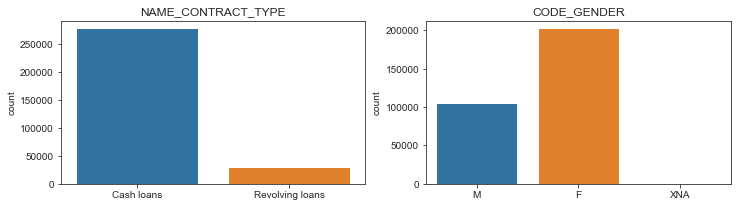

In [63]:
#  Categorical Data
sns.reset_orig
sns.set_style("ticks")
categorical =  ['NAME_CONTRACT_TYPE','CODE_GENDER']
a = 1  # number of rows
b = 2 # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(12,3))
for i in categorical:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i))
    plt.xlabel(i)
    p=sns.countplot(dfn[i])
    p.set_xlabel("", fontsize = 10)
    ##
    c = c + 1

plt.show()

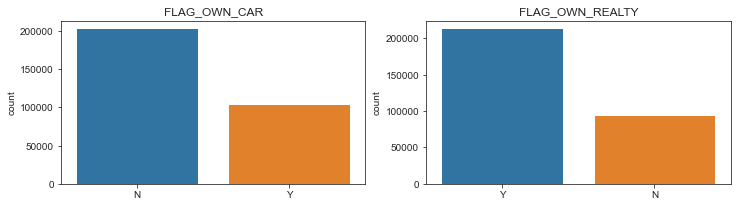

In [64]:
#  Categorical Data
sns.reset_orig
sns.set_style("ticks")
categorical =  [  'FLAG_OWN_CAR','FLAG_OWN_REALTY']
a = 1  # number of rows
b = 2 # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(12,3))
for i in categorical:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i))
    plt.xlabel(i)
    p=sns.countplot(dfn[i])
    p.set_xlabel("", fontsize = 10)
    ##
    c = c + 1

plt.show()

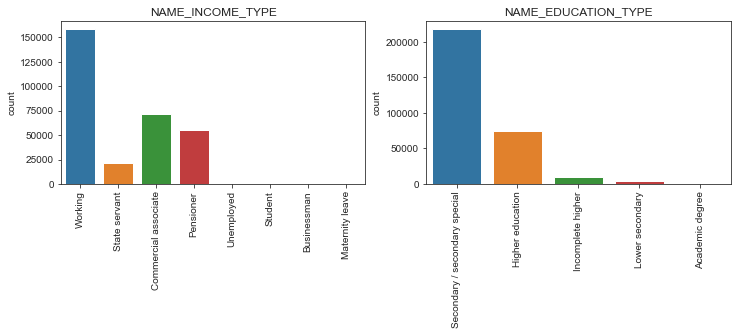

In [65]:
#  Categorical Data
sns.reset_orig
sns.set_style("ticks")
categorical =  ['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE']
a = 1  # number of rows
b = 2 # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(12,3))
for i in categorical:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i))
    plt.xlabel(i)
    p=sns.countplot(dfn[i])
    p.set_xlabel("", fontsize = 10)
    plt.xticks(rotation=90)
    ##
    c = c + 1

plt.show()

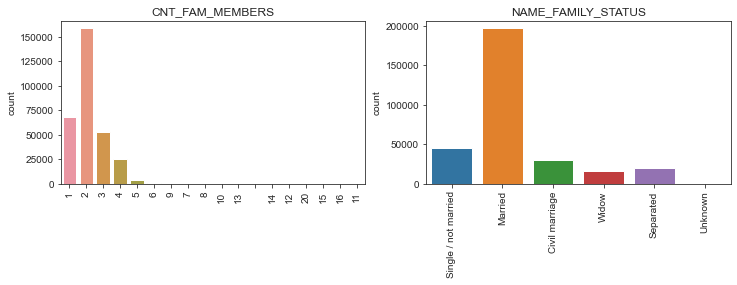

In [66]:
#  Categorical Data
sns.reset_orig
sns.set_style("ticks")
categorical =  ['CNT_FAM_MEMBERS','NAME_FAMILY_STATUS']
a = 1  # number of rows
b = 2 # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(12,3))
for i in categorical:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i))
    plt.xlabel(i)
    p=sns.countplot(dfn[i])
    p.set_xlabel("", fontsize = 10)
    plt.xticks(rotation=90)
    ##
    c = c + 1

plt.show()

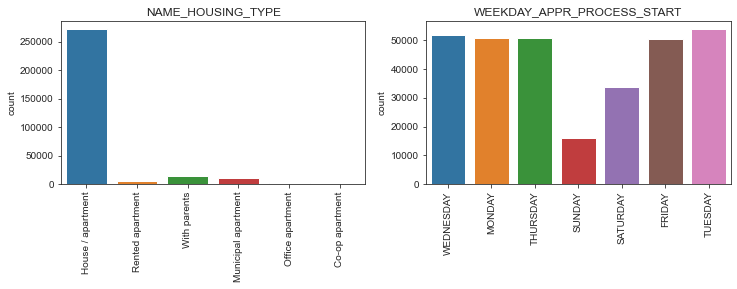

In [67]:
#  Categorical Data
sns.reset_orig
sns.set_style("ticks")
categorical =  ['NAME_HOUSING_TYPE','WEEKDAY_APPR_PROCESS_START']
a = 1  # number of rows
b = 2 # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(12,3))
for i in categorical:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i))
    plt.xlabel(i)
    p=sns.countplot(dfn[i])
    p.set_xlabel("", fontsize = 19)
    plt.xticks(rotation=90)
    ##
    c = c + 1

plt.show()

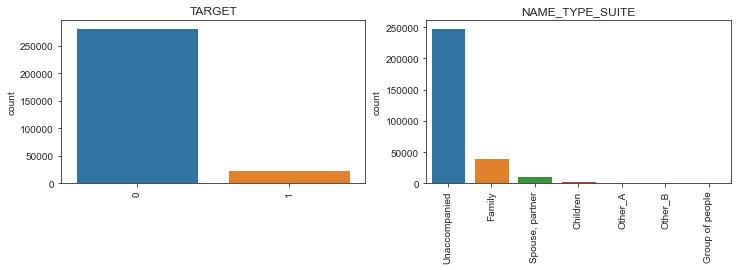

In [68]:
#  Categorical Data
sns.reset_orig
sns.set_style("ticks")
categorical =  ['TARGET','NAME_TYPE_SUITE']
a = 1  # number of rows
b = 2 # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(12,3))
for i in categorical:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i))
    plt.xlabel(i)
    p=sns.countplot(dfn[i])
    p.set_xlabel("", fontsize = 19)
    plt.xticks(rotation=90)
    ##
    c = c + 1

plt.show()

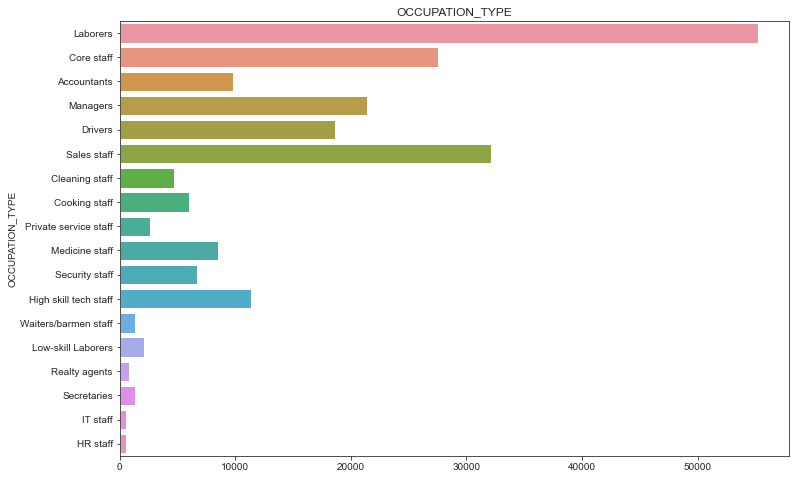

In [69]:
#  Categorical Data
sns.reset_orig
sns.set_style("ticks")
categorical =  ['OCCUPATION_TYPE']
a = 1  # number of rows
b = 1 # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(12,8))
for i in categorical:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i))
    plt.xlabel(i)
    p=sns.countplot(y=dfn[i])
    p.set_xlabel("", fontsize = 5)
    plt.xticks(rotation=0)
    ##
    c = c + 1

plt.show()

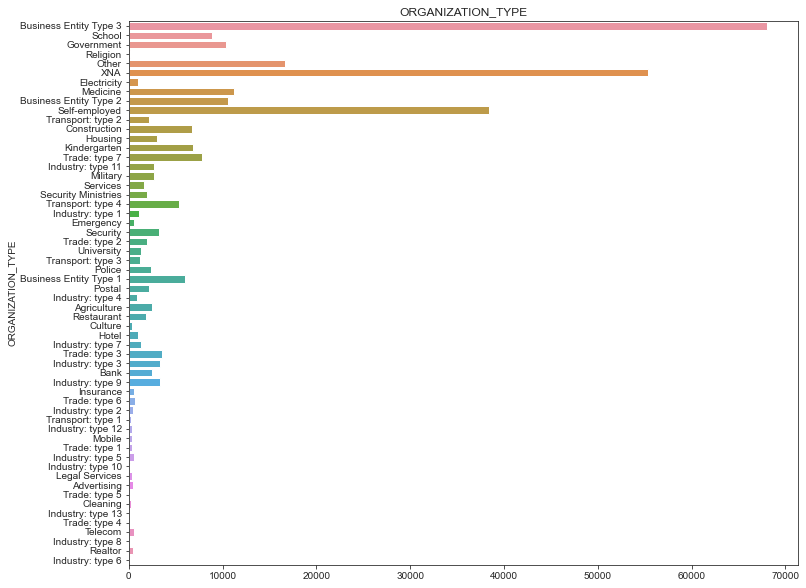

In [70]:
#  Categorical Data
sns.reset_orig
sns.set_style("ticks")
categorical =  ['ORGANIZATION_TYPE']
a = 1  # number of rows
b = 1 # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(12,10))
for i in categorical:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i))
    plt.xlabel(i)
    p=sns.countplot(y=dfn[i])
    p.set_xlabel("", fontsize = 5)
    plt.xticks(rotation=0)
    ##
    c = c + 1

plt.show()

#### Observations on Categorical Variables <br>
> 1.Two types of Contracts  - Cash Loans are much higher as compared to Revolving Loans <br>
> 2.Female take more loans as compared to Men <br>
> 3.Only a small population of borrowers have cars <br>
> 4.More Lenders own a house or apartment <br>
> 5.Borrowers were mostly unaccompanied when applying for the loan  ie 'sole' <br>
> 6.Higher Nos of borrowers were Labourers <br>
> 7.Majority of Applicants  were Employed or pensioners <br>
> 8.Low volume of Loan Applicants with own  business , student  <br>
> 8.Majority Loan Applicants were Educated, Married and with 0 or max 2 children,  Persons with >2 children were less <br>
> 9.Majority of applicants  were in Region rating of 2   , assume a medium rating by credit bodies ie defaults are not very high  <br>

### Numeric Variables

#### Visual representation of Numeric Columns  - Distribution Plot

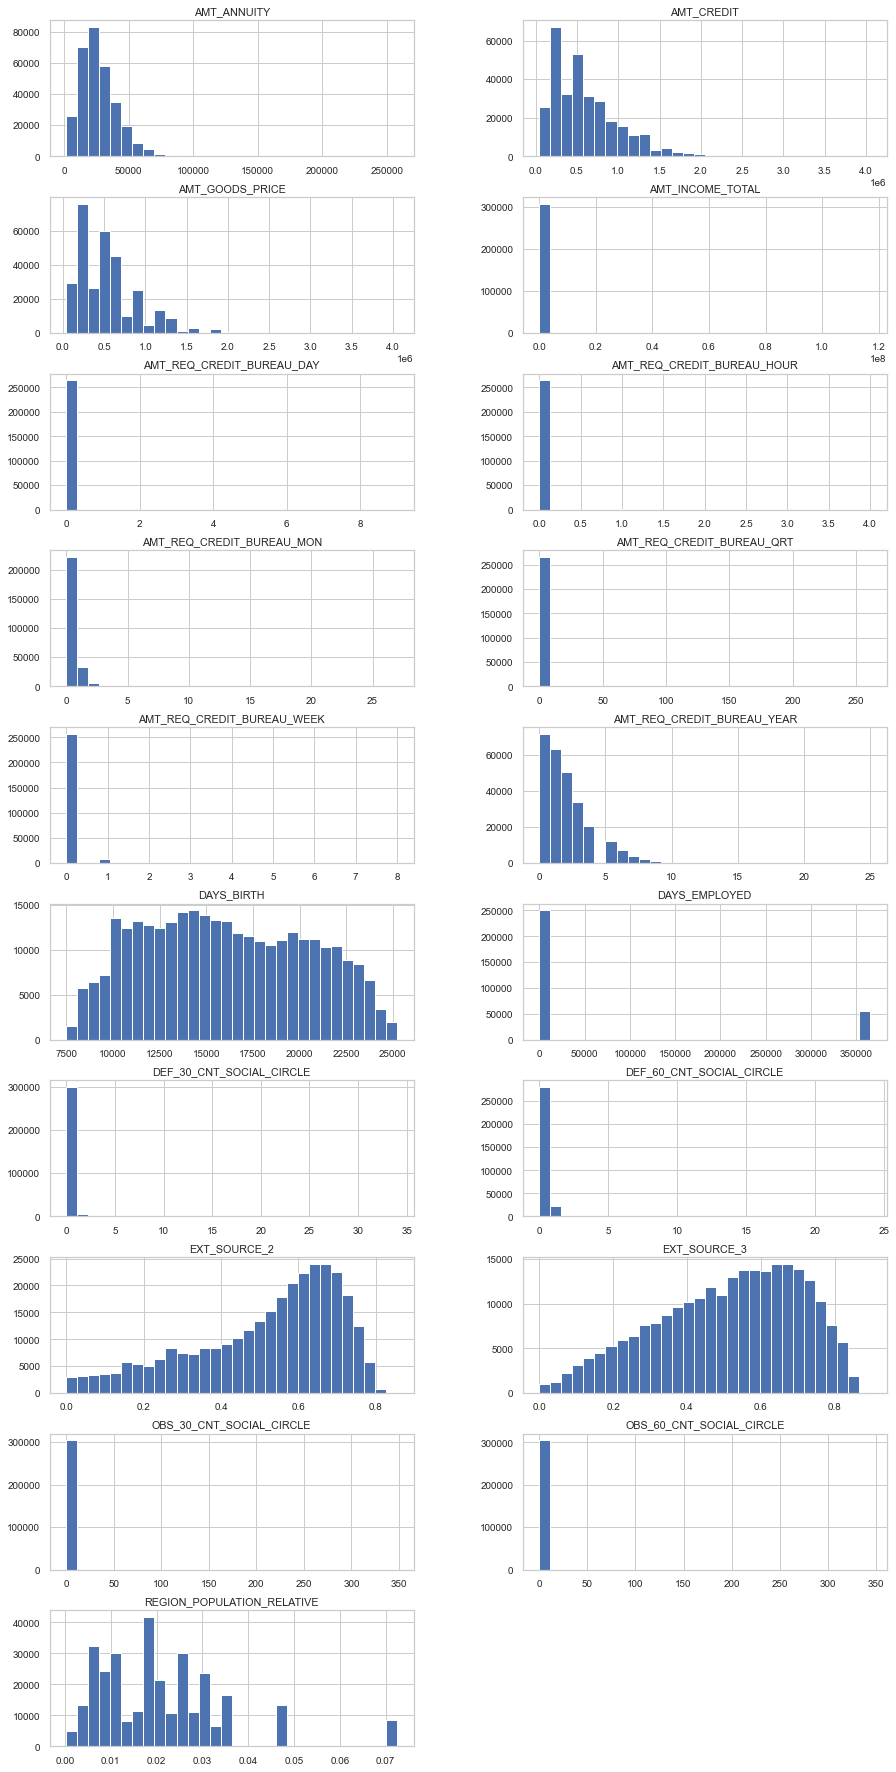

In [71]:
numerical = [
  'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY', 
  'AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE',
  'DAYS_EMPLOYED', 'EXT_SOURCE_2','EXT_SOURCE_3',
  'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
   'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
    'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
   'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','DAYS_BIRTH'
    
]
sns.set(style='whitegrid', palette="deep", font_scale=.9, rc={"figure.figsize": [15,35]})

dfn[numerical].hist(bins=30,  layout=(11, 2))
plt.show()


## 4.8. Final Observations on Outliers : <br>
1.   AMT_INCOME_TOTAL  23 %  > 202500  which leads to a +ve skewness of the data,  retain this as there may be super rich class  <br>
     Few records have abnormally high values, ,may  be dropped as they comprise  approx .05 % of the population <br>
2.   AMT_ANNUITY,AMT_CREDIT,AMT, AMT_GOOD_PRICE appear to have a linear relationship , hence large values will not be treated as outliers <br>
3.   DAYS_EMPLOYED     18 %  = 365243  which  appears to be erroneous ,however appicant  INCOME_TYPE reveal  99 percent of such cases are Pensioners. <br>
     We will impute the DAYS_EMPLOYED to 0 for these cases as  pensioners  are not employed <br>
4.   ORGANIZATION_TYPE  = XNA  - since  Pensioners are not employed XNA may be retained and not an outlier <br>
     Missing values to be imputed with  median of  occupation type income in respective income groups <br>
5.   EXT_SOURCE 1,2,3   These are an important criteria (Ratings from External agencies) , Combined mean of all 3 may be created <br
6.   Rest of the columns having small % of nulls  may be imputed to median values  <br>


##<h3>4.9. BINNING of Continuous Variables <br> </h3>

Binning has been attempted on two continuous variables to  faciliate analyis  <br>
> 1. AMT_INCOME_TOTAL   <br>
> 2. AMT_CREDIT <br>




In [72]:
# Creating bins for income amount
bins = [0,100000,200000,300000,400000,500000,10000000000]
slot = ['<100000', '100000-200000','200000-300000','300000-400000','400000-500000', '500000 and above']

dfn['AMT_INCOME_RANGE']=pd.cut(dfn['AMT_INCOME_TOTAL'],bins,labels=slot)

In [73]:
# Creating bins for Credit amount
bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,10000000000]
slot = ['<100000', '100000-200000','200000-300000','300000-400000','400000-500000', '500000-600000',
        '600000-700000','700000-800000','850000-900000','900000 and above']

dfn['AMT_CREDIT_RANGE']=pd.cut(dfn['AMT_CREDIT'],bins,labels=slot)

In [74]:
dfn.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120          NaN           1               1                0   
1              291          NaN           1               1                0   
2             2531         26.0           1               1                1   
3             2437          NaN           1               1                0   
4             3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers               1   
1                 1           1           0      Core staff               2   
2                 1           1           0        Laborers               1   
3                 1           0           0        Laborers               2   
4                 1           0           0      Core staff               1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0  

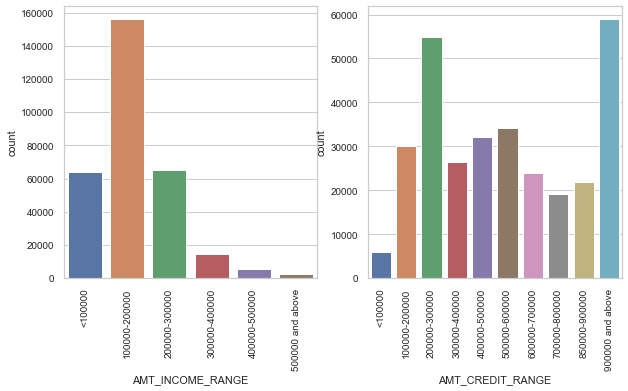

In [75]:
categorical =  [
  'AMT_INCOME_RANGE','AMT_CREDIT_RANGE'
]


fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(dfn[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

#### 4.9.1. Observations after Binning <br>
1. AMT_INCOME_RANGE  <br>
-   Applicants with lower & middle income (<10000 -300000) take out max loans <br> 
-   Affluent applicants  do not take loans frequently <br>
<br>
2. CREDIT_RANGE <br>
-   High frequency for CREDIT ranging 20000 -300000  , > 900000  <br>
-   There may be possible defaulters in HIGH Credit range which may become apparent during bivariate analysis <br>
    
  Hence a analysis  on these two Income ranges may analysed for default behaviour


#<h1> 5. ANALYSIS - Application Data - Target 0  (Non Defaulters) vs Target 1 (Defaluters) </h1>

###<h3> 5.1. Target 0 & 1 Imbalance computation <br> </h3>
> Target = 0 Non Defaulters  <br>
> Target = 1 Defaluters

####  Dividing the dataset into two dataset of and Target=0(Non Defaulters) Target=1(Defaulters) 

In [76]:
target0_df=dfn.loc[dfn["TARGET"]==0]
target1_df=dfn.loc[dfn["TARGET"]==1]

In [77]:
target0_df.shape

(282686, 59)

In [78]:
target1_df.shape

(24825, 59)

####  Imbalance percentage
Calculating the Imbalance percentage

In [79]:
# majority is target0 and minority is target1

print('Imbalance ratio  =  ',round(len(target1_df)/len(target0_df),3))

Imbalance ratio  =   0.088


In [80]:
sns.reset_defaults()
sns.color_palette()
#qualitative_colors = sns.color_palette("Set3", 10)
qualitative_colors =sns.color_palette()

In [81]:
#pal = sns.color_palette("Accent")
#print(pal.as_hex())

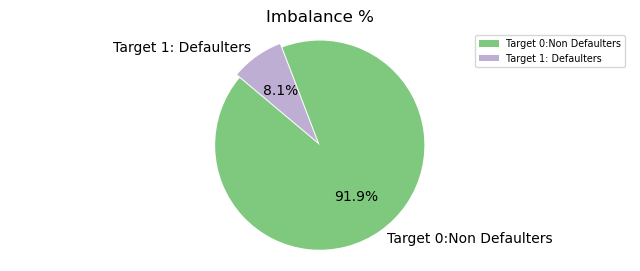

In [82]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(8,3))


labels = ['Target 0:Non Defaulters', 'Target 1: Defaulters']
sizes = [(dfn['TARGET']== 0).value_counts()[1],(dfn['TARGET'] == 1).value_counts()[1] ]

colors = ['#7fc97f', '#beaed4']
explode = (0,0.04)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False , startangle=140)
plt.title ("Imbalance %")
plt.legend( labels, loc="upper right", fontsize= 'x-small')
plt.axis('equal')
plt.show()

####  Observations :


*   From the distribution of TARGET  variable, we can notice there is an  Imbalance in the data w.r.t to TARGET 0 & 1 <br>

*   TARGET 0 (Non Defaulters) contribute to 91.9% of the total loans. <br>
*   TARGET 1 (Defaulters) contribute to 8.07% of the total loans<br>

*   Imbalance ratio  =   0.088 Due to imbalanced dataset,  we will use log scale for plotting the graphs. With this, i can handle the skewness in the data (which is towards Target = 1) <br>

*   Though a less percentage of people are defaulters, the data related to their background & behaviour is important to predict that people with which type of records are more likelhood to default.

*   The outliers needs to be observed well to get insight, as they could be the 
differentiating factor between Defaulter and Non-Defaulter.

###<h3>5.2 Categorical Univariate Analyis Target 0 , Target 1 </h3>



In [83]:
# Set the color of the palette 
sns.reset_defaults()
sns.color_palette()
#qualitative_colors = sns.color_palette("Set3", 10)
qualitative_colors =sns.color_palette()

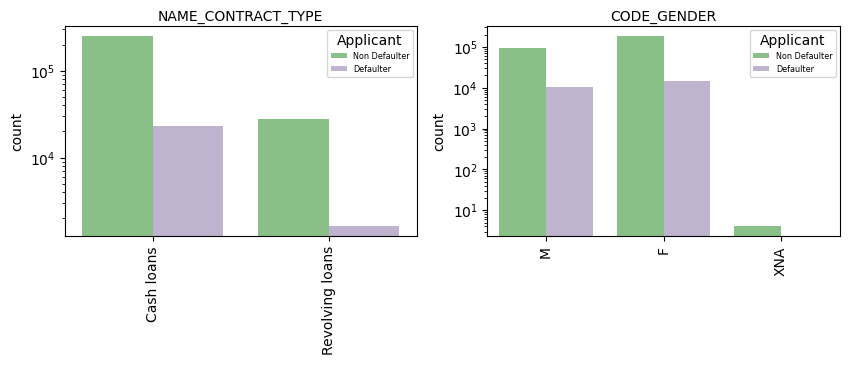

In [84]:
features = ['NAME_CONTRACT_TYPE','CODE_GENDER']
countplt, ax = plt.subplots(figsize = (10,6))

for i in enumerate(features):
    plt.subplot(2, 2, i[0]+1)
    #plt.subplots_adjust(hspace=0.3)
    ax = sns.countplot(x = i[1], hue = 'TARGET', data = dfn,palette = 'Accent')
    
    #plt.rcParams['axes.titlesize'] = 14
    ax.xaxis.set_label_position('top')
    plt.legend(title='Applicant', loc='upper right', labels=['Non Defaulter', 'Defaulter'],fontsize ='xx-small')
    plt.xticks(rotation =90)
    plt.yscale('log')


Contract Type <br>
- Cash Loans preferred choice  for  Non Defaulter , Defaulter <br>
- Defaulters prefer Cash Loans more than revolving loans and have defaulted 50 % of the time  <br>
- Very Low Default rate for  Revolvling loans

Gender  <br>
- Almost similar distribution of  of Male /Female applicants for both Defaulter and Non Defaulters  <br>
- Females have a slightly higher tendency to repay loans on time  <br>

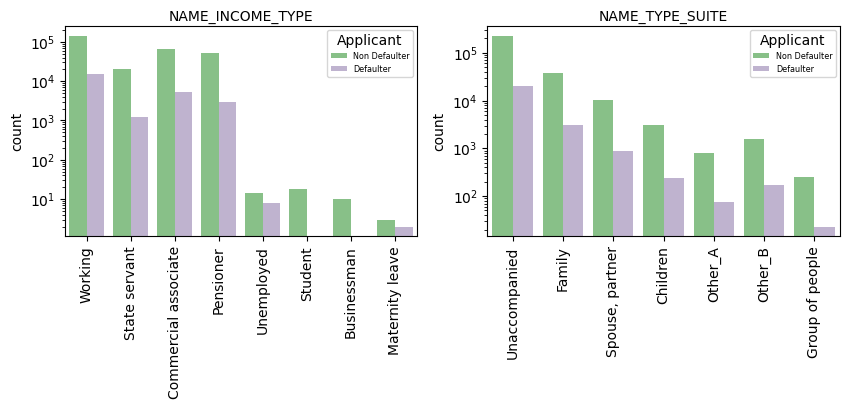

In [85]:
features = ['NAME_INCOME_TYPE','NAME_TYPE_SUITE']
countplt, ax = plt.subplots(figsize = (10,6))

for i in enumerate(features):
    plt.subplot(2, 2, i[0]+1)
    #plt.subplots_adjust(hspace=0.3)
    ax = sns.countplot(x = i[1], hue = 'TARGET', data = dfn,palette = 'Accent')
    
    #plt.rcParams['axes.titlesize'] = 14
    ax.xaxis.set_label_position('top')
    plt.legend(title='Applicant', loc='upper right', labels=['Non Defaulter', 'Defaulter'],fontsize ='xx-small')
    plt.xticks(rotation =90)
    plt.yscale('log')


INCOME TYPE : <br>
- Majority of the applicants  belong to income category :  Working , Commrecial associate, Pension, State Goverment . Thus persons who have a steady source of income, take loans frequenetly and also default frequently <br>
- Students, Unemployed , Business men have a very loan frequency <>
- Unemployed & Applicants on Maternity leave ( Females ) default almost as much as non defaulters <br>

TYPE_SUIT  <br>
- Persons who were unaccompanied are the highest loan applicants and along with high rate of default  - Single Persons? <br>
- Persons having family are also loan seekers and tend to default <br>

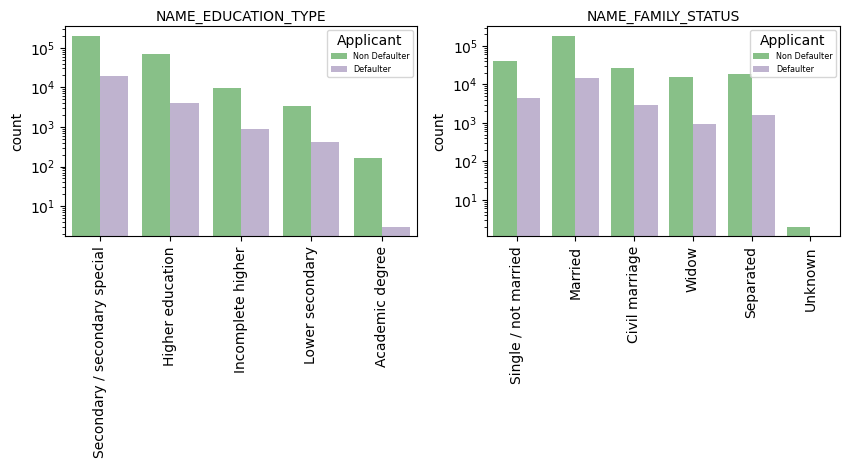

In [86]:
features = ['NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS']
countplt, ax = plt.subplots(figsize = (10,6))


for i in enumerate(features):
    plt.subplot(2, 2, i[0]+1)
    #plt.subplots_adjust(hspace=0.3)
    ax = sns.countplot(x = i[1], hue = 'TARGET', data = dfn,palette = 'Accent')
    
    #plt.rcParams['axes.titlesize'] = 14
    ax.xaxis.set_label_position('top')
    plt.legend(title='Applicant', loc='upper right', labels=['Non Defaulter', 'Defaulter'],fontsize ='xx-small')
    plt.xticks(rotation =90)
    plt.yscale('log')
    


Education Type :<br>
- Secondary , Higher Education, Incomplete Education are the highest loan seekers and defaulters  approx 80% of the time <br>
- Academic Degeree holders low default rate <br>
Family Status <br>
- Highest default evident in Marital Status 'Married' 
- Single /not married had a very high defult rate - probably due finacial liabilities or procuring assets like House,Car before settling down
-All categories of family status default frequently  - hence not conclusive

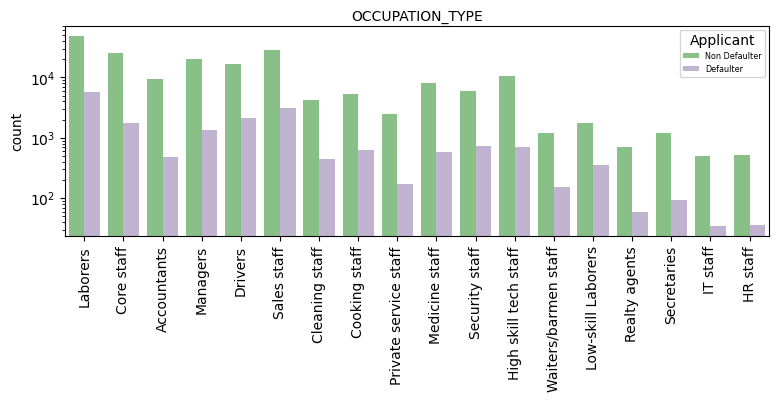

In [87]:
features = ['OCCUPATION_TYPE']
countplt, ax = plt.subplots(figsize = (20,6))

for i in enumerate(features):
    plt.subplot(2, 2, i[0]+1)
    #plt.subplots_adjust(hspace=0.3)
    ax = sns.countplot(x = i[1], hue = 'TARGET', data = dfn,palette = 'Accent')
    
    #plt.rcParams['axes.titlesize'] = 14
    ax.xaxis.set_label_position('top')
    plt.legend(title='Applicant', loc='upper right', labels=['Non Defaulter', 'Defaulter'],fontsize ='xx-small')
    plt.xticks(rotation =90)
    plt.yscale('log')
    

OCCUPATION_TYPE: <br>
- Loan Applicants mainly in Labourer,Sales staff, Core staff, Drivers ,Manages
- Defaulters mainly amongst Labourers, Sales Staff, Drivers , Managers,Core Staff 
- Low Default amongst IT Staff, HR Staff Realty Agents, High Skill tech staff - they may be having a reasonably good income
    

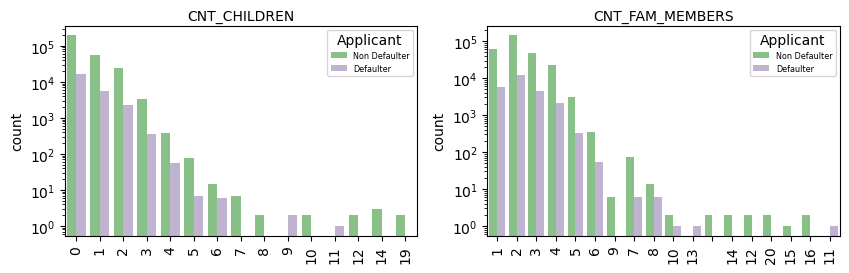

In [88]:
features = ['CNT_CHILDREN','CNT_FAM_MEMBERS']
countplt, ax = plt.subplots(figsize = (10,6))

for i in enumerate(features):
    plt.subplot(2, 2, i[0]+1)
    #plt.subplots_adjust(hspace=0.3)
    ax = sns.countplot(x = i[1], hue = 'TARGET', data = dfn,palette = 'Accent')
    
    #plt.rcParams['axes.titlesize'] = 14
    ax.xaxis.set_label_position('top')
    plt.legend(title='Applicant', loc='upper right', labels=['Non Defaulter', 'Defaulter'],fontsize ='xx-small')
    plt.xticks(rotation =90)
    plt.yscale('log')

CNT_CHILDREN, CNT_FAM_MEMBERS <br>
- Most of the loan applicants having < 3 children and correspondingly high default rate <br>
- The same is observed for small families < 5 members frequency of loans higher and default rate is high  <br>
- Familes with two members - maybe newly weds are highest applicants & defaulters - mayebe setting up their house <br>

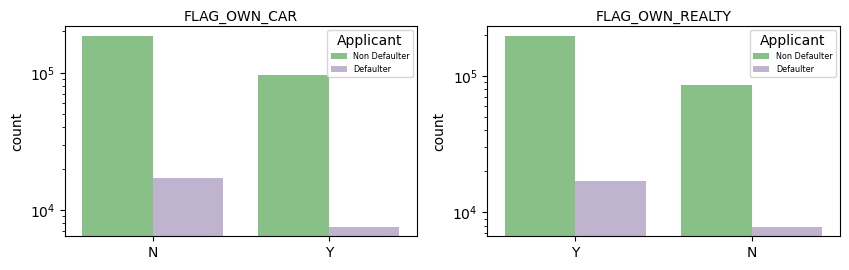

In [89]:
features = ['FLAG_OWN_CAR','FLAG_OWN_REALTY']
countplt, ax = plt.subplots(figsize = (10,6))

for i in enumerate(features):
    plt.subplot(2, 2, i[0]+1)
    #plt.subplots_adjust(hspace=0.3)
    ax = sns.countplot(x = i[1], hue = 'TARGET', data = dfn,palette = 'Accent')
    
    #plt.rcParams['axes.titlesize'] = 14
    ax.xaxis.set_label_position('top')
    plt.legend(title='Applicant', loc='upper right', labels=['Non Defaulter', 'Defaulter'],fontsize ='xx-small')
    plt.xticks(rotation =0)
    plt.yscale('log')

OWN CAR, OWN REALTY <br>
a.Applicants not owning cars default more , hence this may indicate the applicant amy already have an earlier car loan <br>
  - check loan history of the applicant
b.Applicants owning a House  tend to default more  , maybe the applicant is already having a house loan <br>
  - check loan history of the applicant

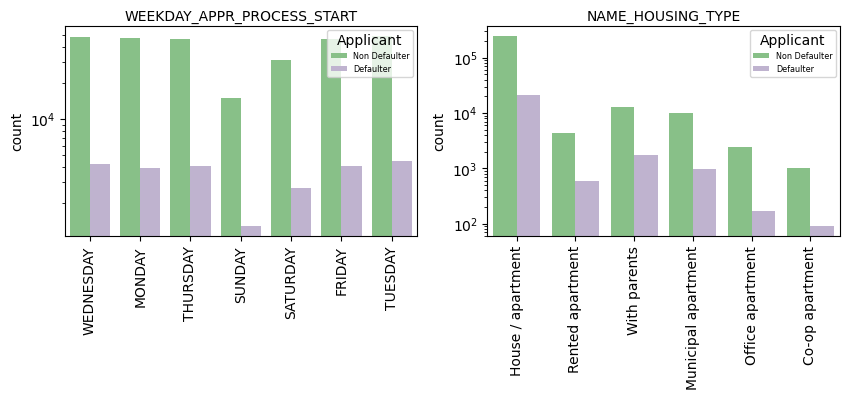

In [90]:
features = ['WEEKDAY_APPR_PROCESS_START','NAME_HOUSING_TYPE']
countplt, ax = plt.subplots(figsize = (10,6))

for i in enumerate(features):
    plt.subplot(2, 2, i[0]+1)
    #plt.subplots_adjust(hspace=0.3)
    ax = sns.countplot(x = i[1], hue = 'TARGET', data = dfn,palette = 'Accent')
    
    #plt.rcParams['axes.titlesize'] = 14
    ax.xaxis.set_label_position('top')
    plt.legend(title='Applicant', loc='upper right', labels=['Non Defaulter', 'Defaulter'],fontsize ='xx-small')
    plt.xticks(rotation =90)
    plt.yscale('log')

WEEKDAY APPROVAL PROCSESS START:<br>
- Sunday there are low nos of applicants  - Nothing conclusive from this information <br>

HOUSING TYPE : <br>
Applicants living in own House/Apartment are the highest to apply for loans and also default <br>
- The loan  maybe for House purchase, check for possible collateral <br>
- Applicants living with parents  are second in the default rank - possibly  aged parents have health issues and expenses increase <br>
- Low rate of default amongst people sharing apartments : expenses are possibly shared leading reduce cost of living <br>


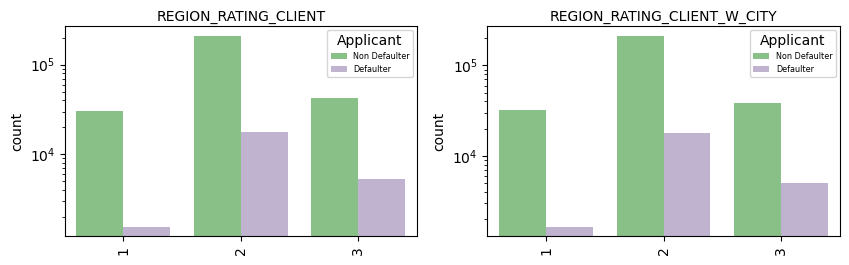

In [91]:
features = ['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']
countplt, ax = plt.subplots(figsize = (10,6))

for i in enumerate(features):
    plt.subplot(2, 2, i[0]+1)
    #plt.subplots_adjust(hspace=0.3)
    ax = sns.countplot(x = i[1], hue = 'TARGET', data = dfn,palette = 'Accent')
    
    #plt.rcParams['axes.titlesize'] = 14
    ax.xaxis.set_label_position('top')
    plt.legend(title='Applicant', loc='upper right', labels=['Non Defaulter', 'Defaulter'],fontsize ='xx-small')
    plt.xticks(rotation =90)
    plt.yscale('log')

REGION RATING/W CITY of Client:<br>
Assumption : Scale = 1.High 2.Medium 3 Low <br>
- a.Similar  trend of Non Default/default  observerd across  region and recion-city of applicant <br>
- Low defaults in High Rated regions/cities <br>
- Highest defaluts in Medium Rated region/cities <br>
- Moderate defaults in Low Rated Region/cities <br>

-b.Applicants residng in Medium rated regions/cities take out more loans as compared to 1,3 cases



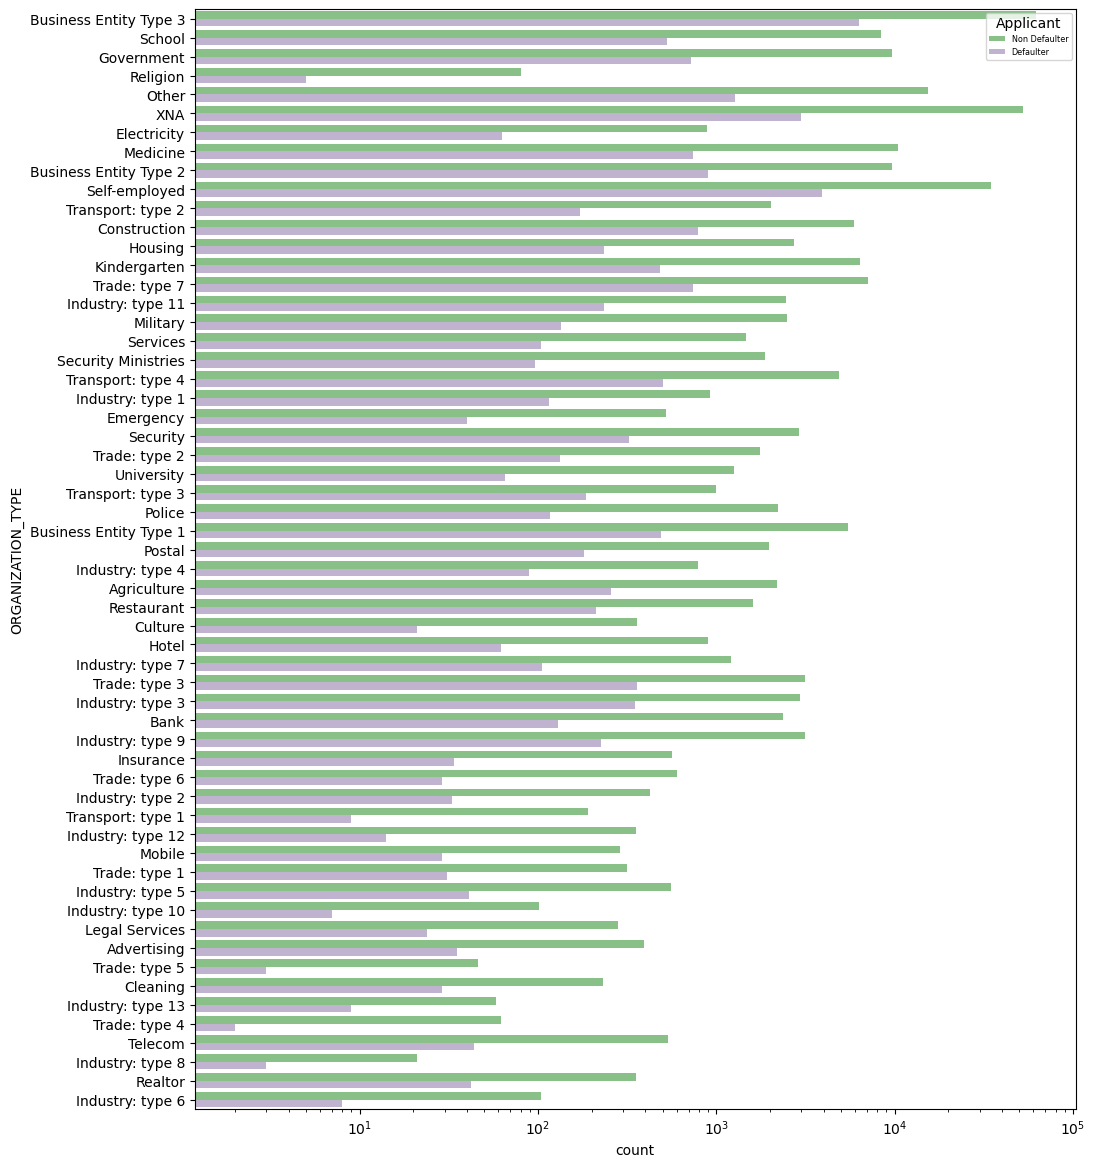

In [92]:
features = ['ORGANIZATION_TYPE']
countplt, ax = plt.subplots(figsize = (25,40))

for i in enumerate(features):
    plt.subplot(2, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.8)
    ax = sns.countplot(y = i[1], hue = 'TARGET', data = dfn, palette = 'Accent')
    
    plt.rcParams['axes.titlesize'] = 4
    plt.legend(title='Applicant', loc='upper right', labels=['Non Defaulter', 'Defaulter'],fontsize ='xx-small')
    plt.xticks(rotation = 0)
    plt.xscale('log')
   
    

ORGANIZATION_TYPE <br>
- XNA, OTHERS will have to handled using some logic or more information <br>
- Highest Loan applicants : Business Entity Type 3 - may be sole proprietor company eg startups which need heavy insvestment,  Self Employed, Medicine, XNA, OTHERS <br>
- High Defaulters : Business Entity Type 3, Self Employed, Trade ,Medicine <br>
- Moderate Defaulters : Government, Schools <br>


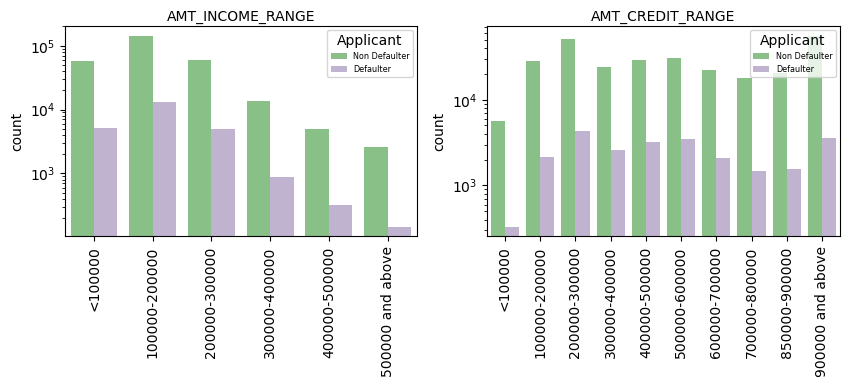

In [93]:
features = ['AMT_INCOME_RANGE','AMT_CREDIT_RANGE']
countplt, ax = plt.subplots(figsize = (10,6))

for i in enumerate(features):
    plt.subplot(2, 2, i[0]+1)
    #plt.subplots_adjust(hspace=0.3)
    ax = sns.countplot(x = i[1], hue = 'TARGET', data = dfn,palette = 'Accent')
    
    #plt.rcParams['axes.titlesize'] = 14
    ax.xaxis.set_label_position('top')
    plt.legend(title='Applicant', loc='upper right', labels=['Non Defaulter', 'Defaulter'],fontsize ='xx-small')
    plt.xticks(rotation =90)
    plt.yscale('log')

AMT_INCOME_RANGE <br>
- Highest Default/Highest Loan availers : Income range 100000-200000  which could represent Lower Middle Class who have limited resources<br>
- Next category of defaulters - Below 100000 - students/widows  , 200000-300000 - Middle Income group <br>
- Their loan history, occupation, Income source  to be checked during loan application  <br>
AMT_CREDIT_RANGE: <br>
- Approx. 40 % defaulters in various credit amt ranges, credit amount < 100000 has least defaulters - could be revolving loans <br>


###<h3>5.3 Continuous Variable :  Univariate Analysis Target 0 , Target 1 </h3>
Univariate Analysis of the Continuous Variable to do the comparative study of defaulter and Non Defaulters

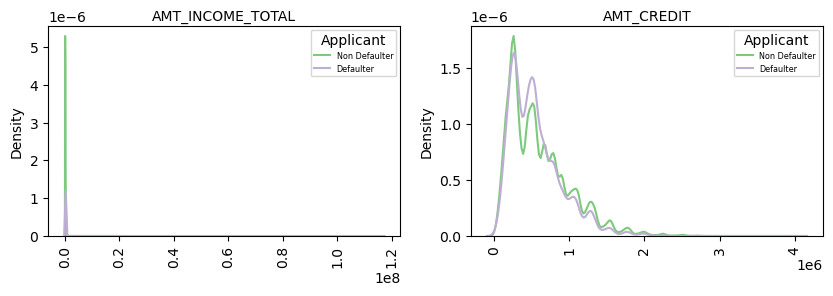

In [94]:
features = ['AMT_INCOME_TOTAL','AMT_CREDIT']
ax = plt.subplots(figsize = (10,6))

for i  in enumerate(features):
    
    plt.subplot(2, 2, i[0]+1)    
    
    ax = sns.distplot(target0_df[i[1]],  hist = False, label='Non_Defaulter', color = '#7fc97f')
    ax = sns.distplot(target1_df[i[1]],  hist = False, label='Non_Defaulter', color = '#beaed4')
   
    plt.legend()    
   
    ax.xaxis.set_label_position('top')
    plt.legend(title='Applicant', loc='upper right',labels=['Non Defaulter', 'Defaulter'],fontsize ='xx-small')
    plt.xticks(rotation =90)
    
   


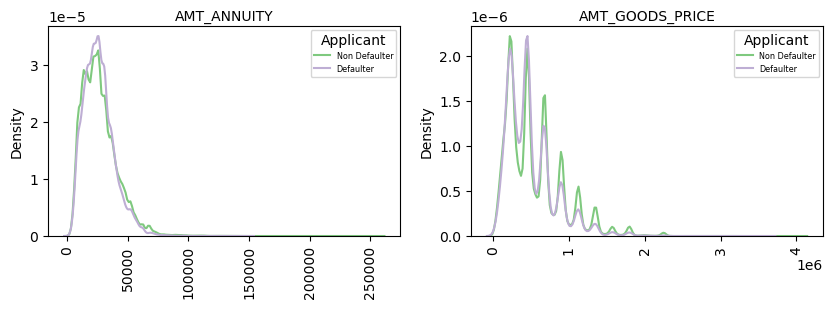

In [95]:
features = ['AMT_ANNUITY','AMT_GOODS_PRICE']
ax = plt.subplots(figsize = (10,6))

for i  in enumerate(features):
    
    plt.subplot(2, 2, i[0]+1)    
    
    ax = sns.distplot(target0_df[i[1]],  hist = False, label='Non_Defaulter', color = '#7fc97f')
    ax = sns.distplot(target1_df[i[1]],  hist = False, label='Non_Defaulter', color = '#beaed4')
   
    plt.legend()    
   
    ax.xaxis.set_label_position('top')
    plt.legend(title='Applicant', loc='upper right',labels=['Non Defaulter', 'Defaulter'],fontsize ='xx-small')
    plt.xticks(rotation =90)
    
   

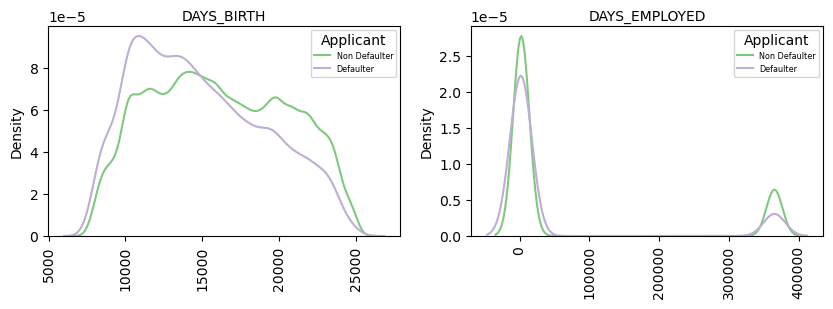

In [96]:
features = ['DAYS_BIRTH','DAYS_EMPLOYED']
ax = plt.subplots(figsize = (10,6))

for i  in enumerate(features):
    
    plt.subplot(2, 2, i[0]+1)    
    
    ax = sns.distplot(target0_df[i[1]],  hist = False, label='Non_Defaulter', color = '#7fc97f')
    ax = sns.distplot(target1_df[i[1]],  hist = False, label='Non_Defaulter', color = '#beaed4')
   
    plt.legend()    
   
    ax.xaxis.set_label_position('top')
    plt.legend(title='Applicant', loc='upper right',labels=['Non Defaulter', 'Defaulter'],fontsize ='xx-small')
    plt.xticks(rotation =90)
    
   

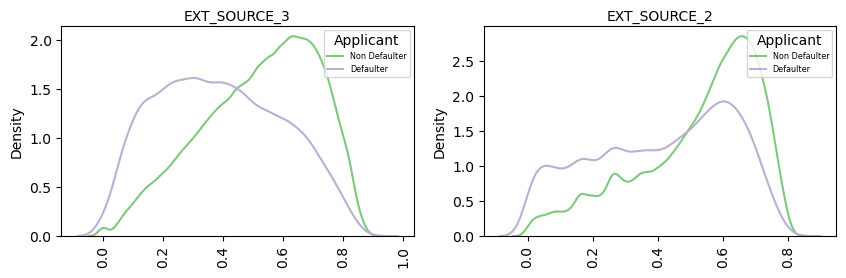

In [97]:
features = ['EXT_SOURCE_3','EXT_SOURCE_2']
ax = plt.subplots(figsize = (10,6))

for i  in enumerate(features):
    
    plt.subplot(2, 2, i[0]+1)    
    
    ax = sns.distplot(target0_df[i[1]],  hist = False, label='Non_Defaulter', color = '#7fc97f')
    ax = sns.distplot(target1_df[i[1]],  hist = False, label='Non_Defaulter', color = '#beaed4')
   
    plt.legend()    
   
    ax.xaxis.set_label_position('top')
    plt.legend(title='Applicant', loc='upper right',labels=['Non Defaulter', 'Defaulter'],fontsize ='xx-small')
    plt.xticks(rotation =90)
    
   

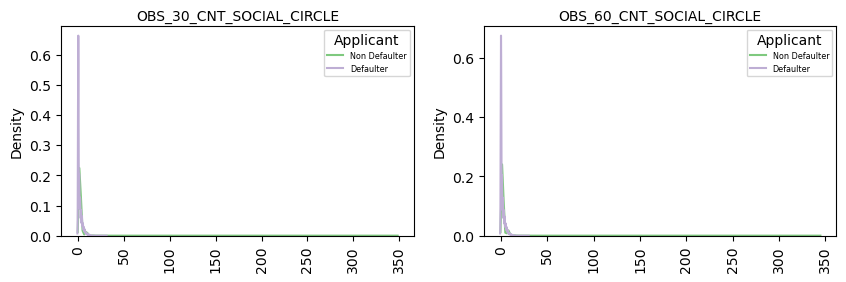

In [98]:
features = ['OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE']
ax = plt.subplots(figsize = (10,6))

for i  in enumerate(features):
    
    plt.subplot(2, 2, i[0]+1)    
    
    ax = sns.distplot(target0_df[i[1]],  hist = False, label='Non_Defaulter', color = '#7fc97f')
    ax = sns.distplot(target1_df[i[1]],  hist = False, label='Non_Defaulter', color = '#beaed4')
   
    plt.legend()    
   
    ax.xaxis.set_label_position('top')
    plt.legend(title='Applicant', loc='upper right',labels=['Non Defaulter', 'Defaulter'],fontsize ='xx-small')
    plt.xticks(rotation =90)
    

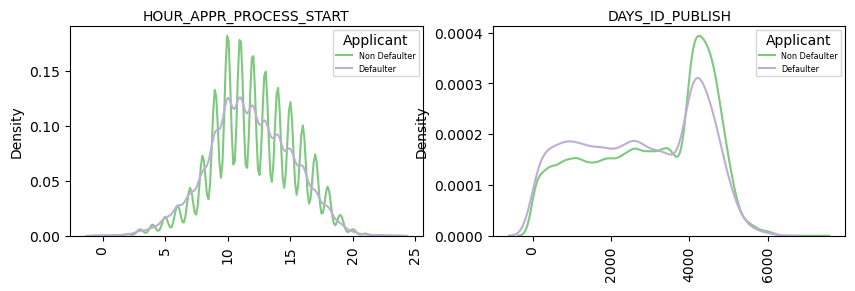

In [99]:
features = ['HOUR_APPR_PROCESS_START','DAYS_ID_PUBLISH']
ax = plt.subplots(figsize = (10,6))

for i  in enumerate(features):
    
    plt.subplot(2, 2, i[0]+1)    
    
    ax = sns.distplot(target0_df[i[1]],  hist = False, label='Non_Defaulter', color = '#7fc97f')
    ax = sns.distplot(target1_df[i[1]],  hist = False, label='Non_Defaulter', color = '#beaed4')
   
    plt.legend()    
   
    ax.xaxis.set_label_position('top')
    plt.legend(title='Applicant', loc='upper right',labels=['Non Defaulter', 'Defaulter'],fontsize ='xx-small')
    plt.xticks(rotation =90)
    

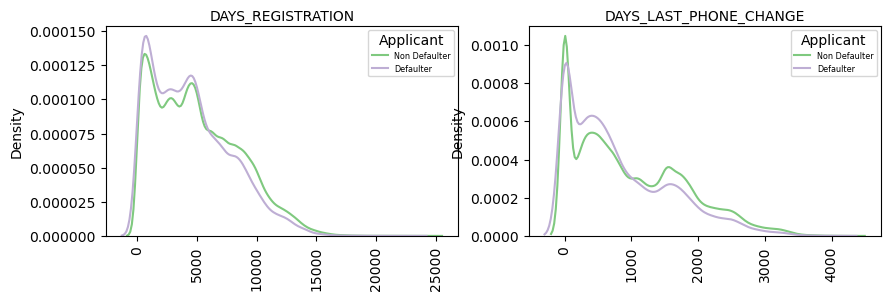

In [100]:
features = ['DAYS_REGISTRATION','DAYS_LAST_PHONE_CHANGE']
ax = plt.subplots(figsize = (10,6))

for i  in enumerate(features):
    
    plt.subplot(2, 2, i[0]+1)    
    
    ax = sns.distplot(target0_df[i[1]],  hist = False, label='Non_Defaulter', color = '#7fc97f')
    ax = sns.distplot(target1_df[i[1]],  hist = False, label='Non_Defaulter', color = '#beaed4')
   
    plt.legend()    
   
    ax.xaxis.set_label_position('top')
    plt.legend(title='Applicant', loc='upper right',labels=['Non Defaulter', 'Defaulter'],fontsize ='xx-small')
    plt.xticks(rotation =90)

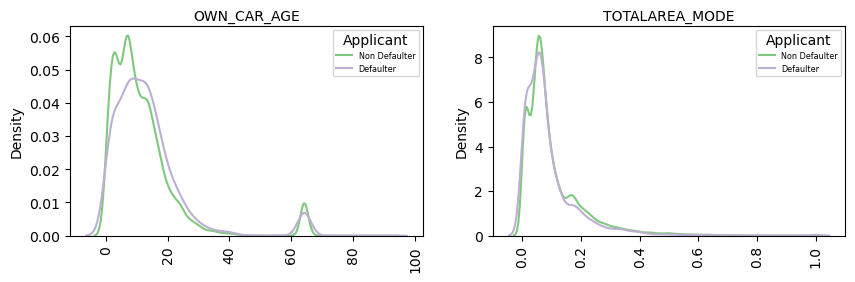

In [101]:
features = ['OWN_CAR_AGE','TOTALAREA_MODE']
ax = plt.subplots(figsize = (10,6))

for i  in enumerate(features):
    
    plt.subplot(2, 2, i[0]+1)    
    
    ax = sns.distplot(target0_df[i[1]],  hist = False, label='Non_Defaulter', color = '#7fc97f')
    ax = sns.distplot(target1_df[i[1]],  hist = False, label='Non_Defaulter', color = '#beaed4')
   
    plt.legend()    
   
    ax.xaxis.set_label_position('top')
    plt.legend(title='Applicant', loc='upper right',labels=['Non Defaulter', 'Defaulter'],fontsize ='xx-small')
    plt.xticks(rotation =90)

#### Observations of Continuous Variables : SUMMARY <br>
1.AMT_INCOME_TOTAL ie Applicant Income is right skewed for both Defaulter, Non Defaulter <br>
2.AMT_CREDIT : Generally Credit amt is in the in the lower range and has also a very high value range - pls refer to CREDIT_RANGE plot <br>
  Both Defaulters & Non Defaulters  show a similar trend <br>
3.AMT_ANNUITY  - Maximum concentration 300000- 500000 range for both Defaulters & Non Defaulters <br>
4.AMT_GOODS_PRICE - Shows similar distribution as Credit& Annuity , Defaulters & Non Defaulters  show a similar trend <br>
5.DAYS of BIRTH ie Age - Younger Defaulters are higher in the age range of 30 - 35, whereas  older the applicant > 40 Non Defaults increase <br>
  Mature , middle age & pensioners are less defaulters <br>
6.Ratings3 : EX_DATA_SOURCE3 = Defaulters have a lower score 0.2 to 0.4, Non Defaulters have a higher score  0.6to 0.8<br>
7 Ratings2 :EXT_DATA_SORUCE2 = Both Defaulter  are centrated are lower 0.4 to 0.6 & Non Defaulter have a score  of  0.6to 0.8 <br>
8.TOTAL_AREA ie Living Area, DAYS_REGISTRATION,  DAYS_APP_PROCESS_START - No difference obseverd for Defaulters/Non Defaulters <br>

Recommendations :  <br>
1. Credit Scores : It would be prudent to take the wtd. average score of the two External Scores 2 &3 and use for decision making <br>
2. Age of Car : Defaulters & Non Defaulters have cars which are 10 + years. There are more defaulters haveng cars > 10 years. This may be checked at the tile of loan application as an old  car may not be used as collateral <br>
3.  No of times the Applicant changed the application before submission DAYS_TO_PUBLISH ie - Higher in Defaulters in the early days of the loan application. May be potential fraud cases  <br>
 

###<h3>5.4 Bivariate Analysis   </h3>

####<h4>5.4.1a Credit Amt, Family Status  - Non Defaulters </h4>

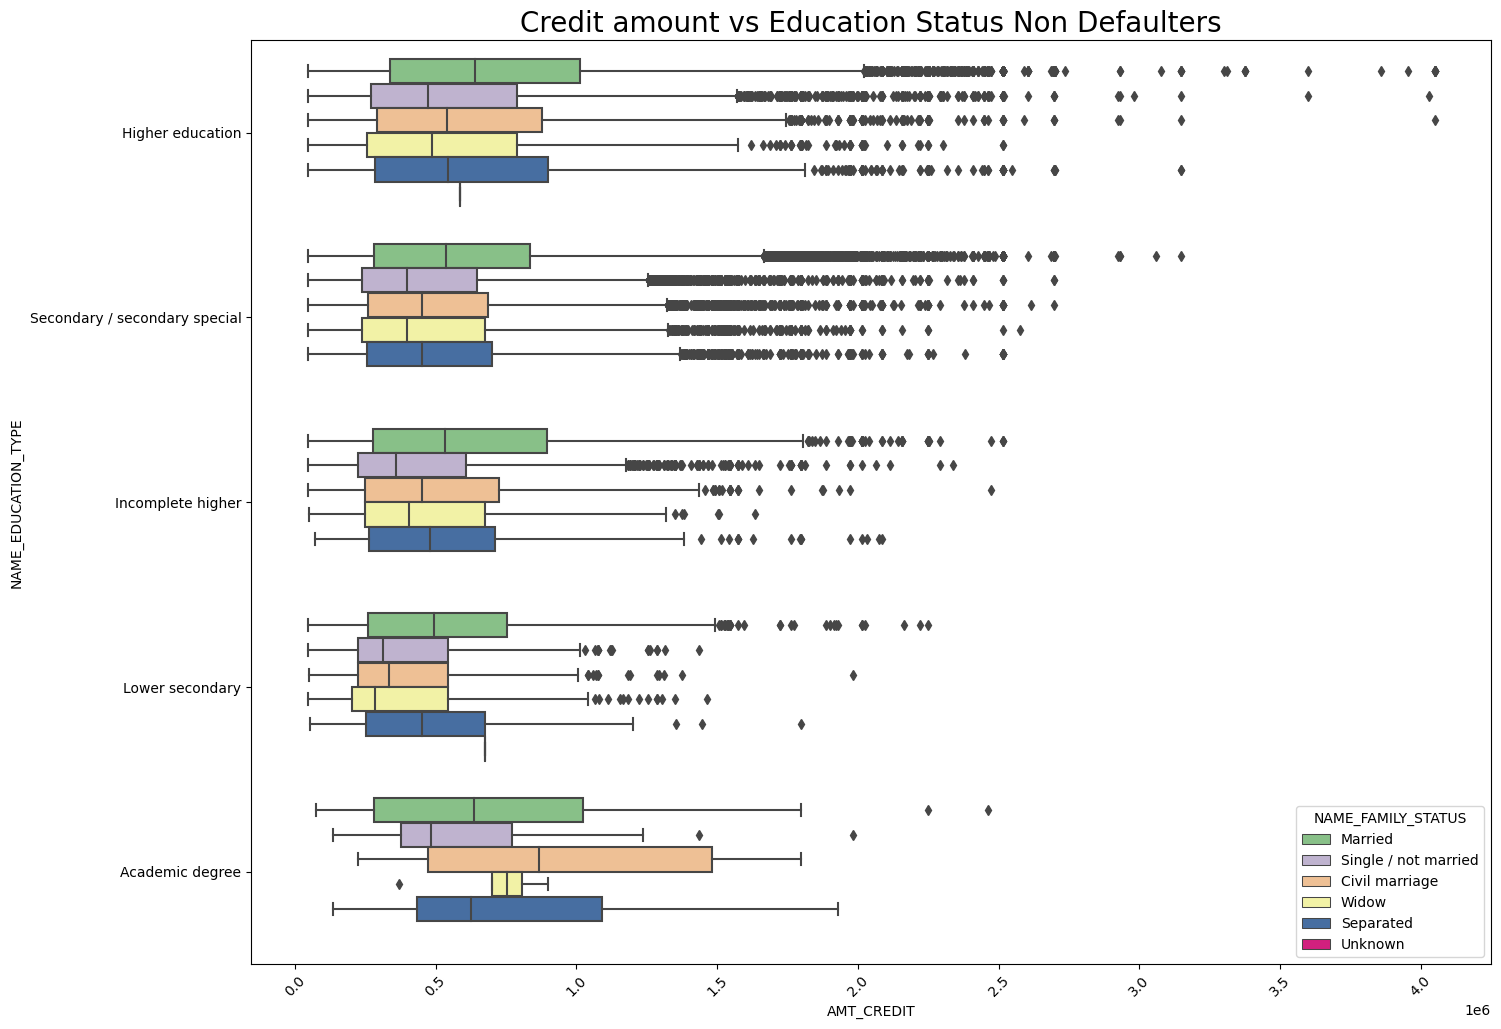

In [102]:
# Box plotting for Credit amount & FAMILY

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0_df, x='AMT_CREDIT',y='NAME_EDUCATION_TYPE', hue ='NAME_FAMILY_STATUS',orient='h',palette = 'Accent')
plt.title('Credit amount vs Education Status Non Defaulters',fontsize = 20)
plt.show()

####<h4>5.4.1b Credit Amt, Family Status  - Defaulters</h4>

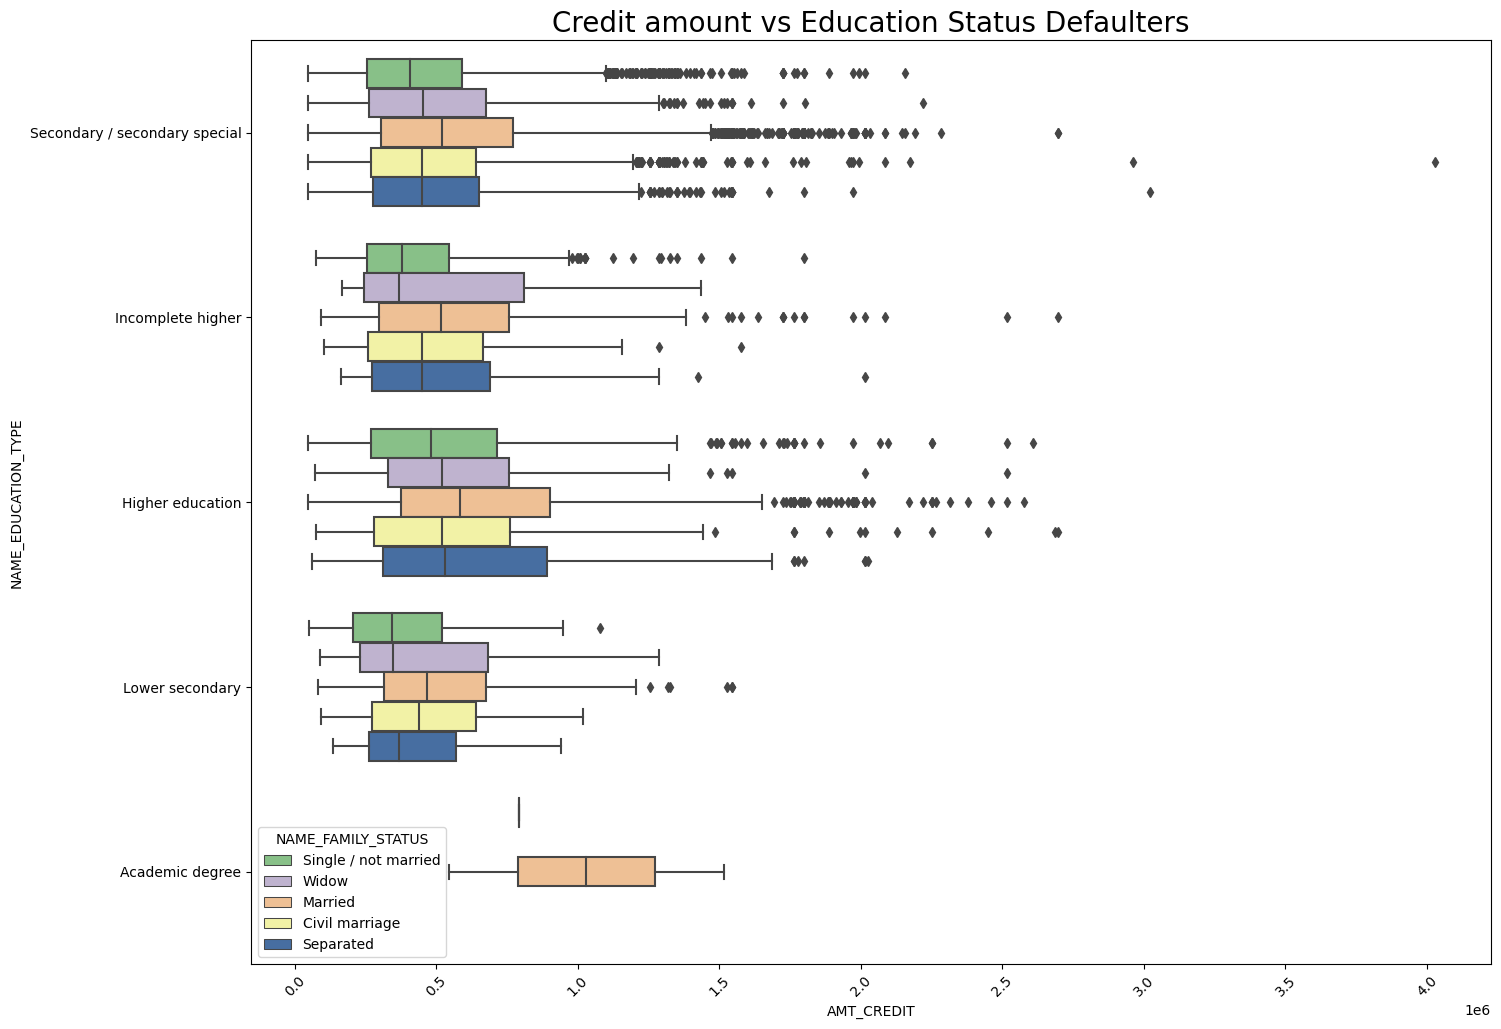

In [103]:
# Box plotting for Credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target1_df, y='NAME_EDUCATION_TYPE',x='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='h', palette = 'Accent')
plt.title('Credit amount vs Education Status Defaulters',fontsize = 20)
plt.show()

####Observations:

Non Defaulters : <br>

> 1.Academic Degree holders apply for a higher credit specially by applicants who are  married ie  Civil Marriage , Widows<br>
> 2.Applicants ( Married, Civil Marriage) go for a Higher Credit Amt in the remaining  categories <br>
> 3.Less  educated applicants  ie Lower Secondary Average have the lowest Credit Limit  <br>
> 4.Single persons have lower Credit Amts  <br>

Defaulters : 
> 1.Applicants with family status 'Civil Marriage', with a slightly high Credit Amt are the highest defaulters  acorss all family status <br>
> 2.Applicants with Academic Degrees and status Civil Marriage have the highest Credit Amt are likely defaulters
> 3.Highest category of defaulters are Widows, except who are have Degress,although they do not take very high Credit Amt. They would be likey be facing financial issues due their personal loss <br> 


####<h4> 5.4.2 Income, Credit Rating EXT_SOURCE_2  Target 0 &1   </h4>

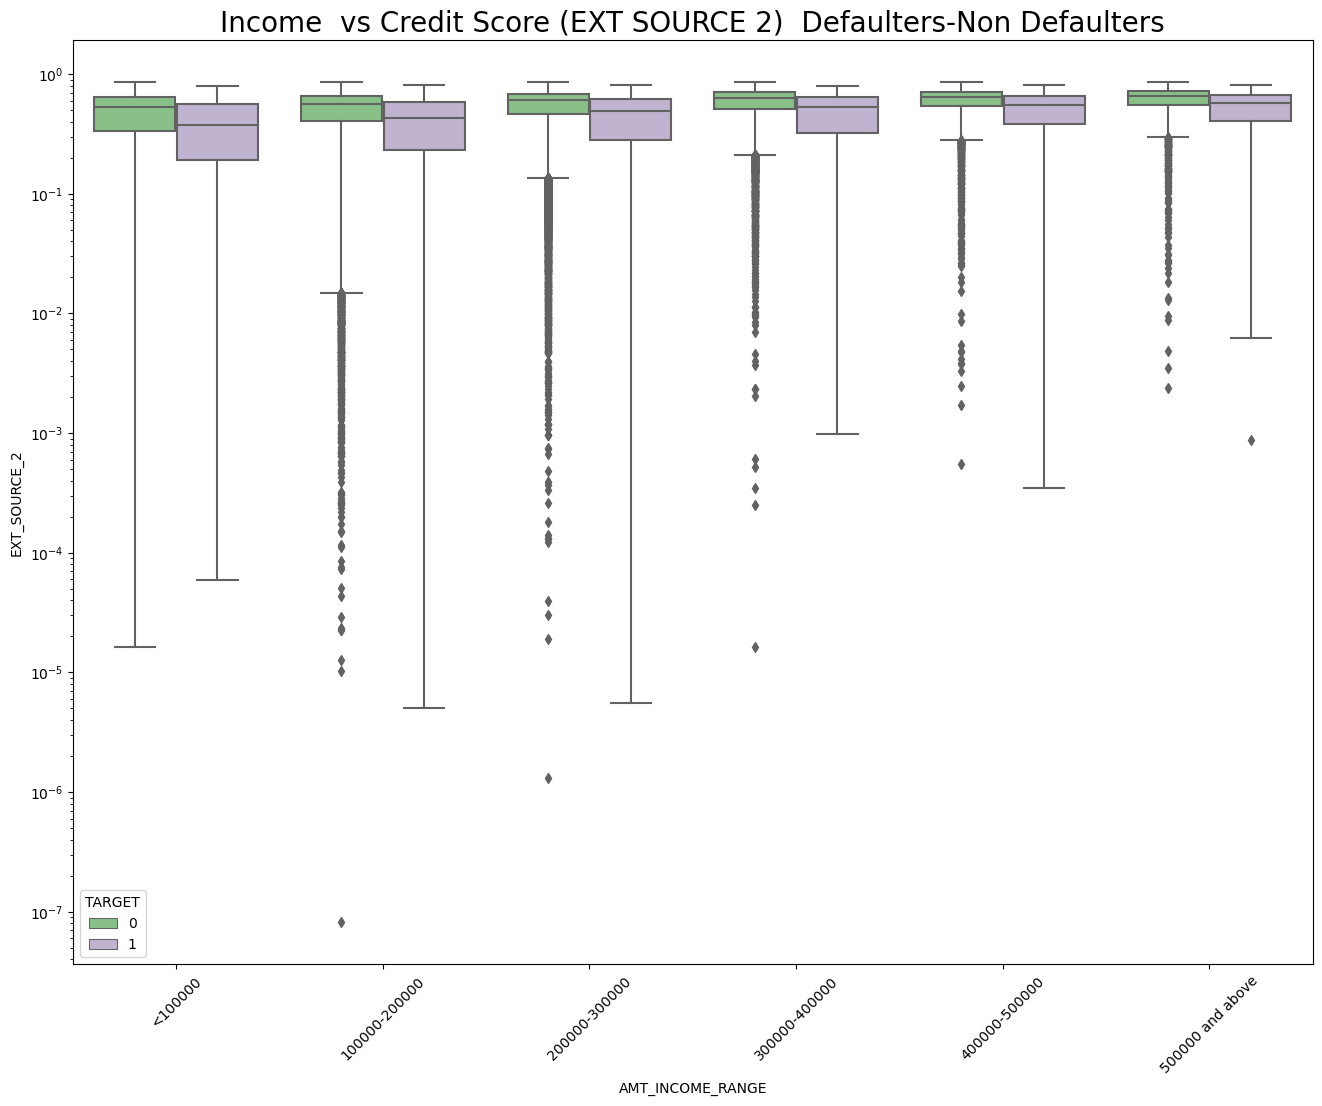

In [104]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =dfn, x='AMT_INCOME_RANGE',y='EXT_SOURCE_2', hue ='TARGET',orient='v', palette = 'Accent')
plt.title('Income  vs Credit Score (EXT SOURCE 2)  Defaulters-Non Defaulters',fontsize = 20)
plt.show()

####  Observation : <br>
- Defaulters have low credit scores from External Source in all income ranges <>
- Defaulter in the Income range of 100000 to 300000  have extremely low scores &  default the most - Need to watch <br> 
- Non Defaulters are concentrated in the lower credit amt range < 200000

####<h4> 5.4.3 OCCUPATION TYPE vs ANNUITY   </h4>

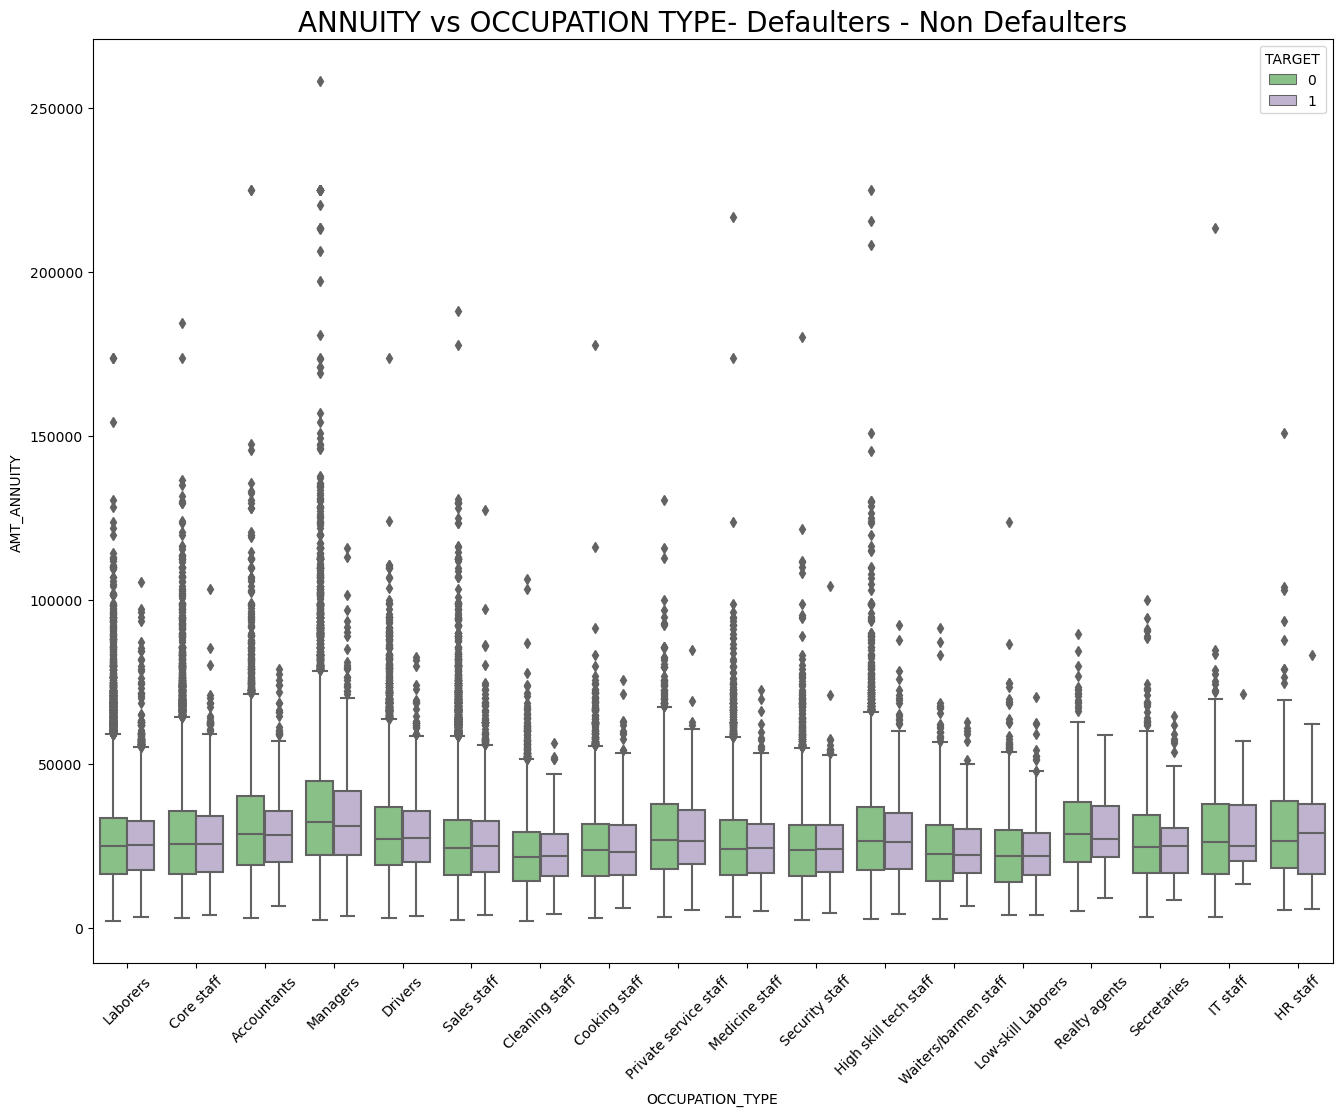

In [105]:
# Box plotting for Credit amount & FAMILY

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =dfn, x='OCCUPATION_TYPE',y='AMT_ANNUITY', hue ='TARGET',orient='v',palette = 'Accent')
plt.title('ANNUITY vs OCCUPATION TYPE- Defaulters - Non Defaulters',fontsize = 20)
plt.show()

#### Observations <br>
-  Highest Annuity is being paid by Accountants  - they have indepth knowledge of finance , hence would have planned  accordingly <br>
   Defaulters are lower w.r.t to Non Defaulters in this  <br>
-  High Skill Tech Staff are the next highest Annuity payers  & al<br>
This supports Education , Occupation influences the risk taken by loan applicants  <br>
-  HR Staff default the highest inspite of Low Annuity pay out <br>

A plot of Occupation vs Income would have supported the above , but due to outliers in the AMT_INCOME_TOTAL  analysis may not reveal useful insights <br>

####<h4>5.4.4 Bivariate Analysis of continuous variables</h4>
Bivariate Analysis of continuous variables:  Credit vs Annuity,  Goods Price , Occupation, Family status

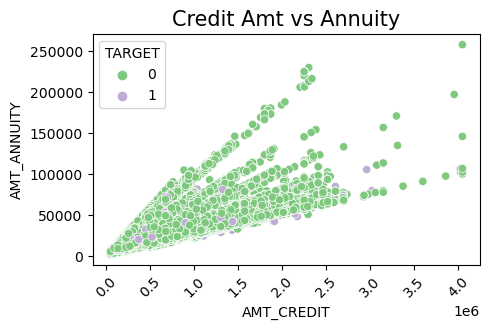

In [106]:
#Scatterplot of AMT_CREDIT vs AMT_ANNUITY
plt.figure(figsize=(5,3))
plt.xticks(rotation=45)
sns.scatterplot(data =dfn, x='AMT_CREDIT',y='AMT_ANNUITY', hue = 'TARGET', palette = 'Accent')
plt.title('Credit Amt vs Annuity',fontsize = 15)
plt.show()

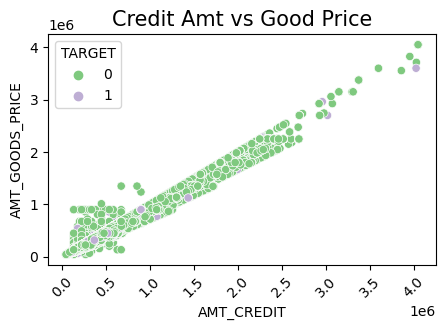

In [107]:
#Scatterplot of AMT_CREDIT vs AMT_GOODS_PRICE
plt.figure(figsize=(5,3))
plt.xticks(rotation=45)
sns.scatterplot(data =dfn, x='AMT_CREDIT',y='AMT_GOODS_PRICE', hue = 'TARGET', palette = 'Accent')
plt.title('Credit Amt vs Good Price',fontsize = 15)
plt.show()

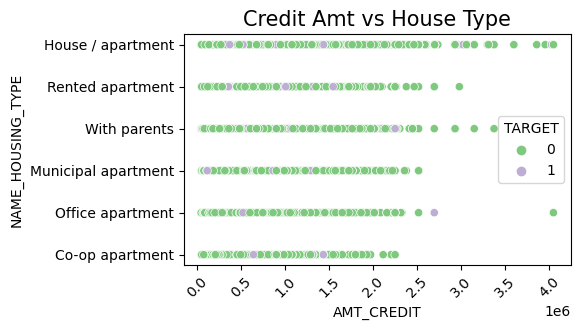

In [108]:
#Scatterplot of AMT_CREDIT vs NAME_HOUSING_TYPE

plt.figure(figsize=(5,3))
plt.xticks(rotation=45)
sns.scatterplot(data =dfn, x='AMT_CREDIT',y='NAME_HOUSING_TYPE', hue = 'TARGET', palette = 'Accent')
plt.title('Credit Amt vs House Type',fontsize = 15)
plt.show()

##<h3>5.5. Correlation </h3>

In [109]:
dfn.shape

(307511, 59)

In [110]:
#Create data frame -  Target = 0
NUMERIC_COLS_0 = dfn[['TARGET', 'CNT_CHILDREN',  'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
                    'AMT_GOODS_PRICE',  'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
                    'DAYS_EMPLOYED', 'DAYS_REGISTRATION',  'DAYS_ID_PUBLISH' ,  'OWN_CAR_AGE',
                    'FLAG_MOBIL',  'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
                    'FLAG_EMAIL',  'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
                    'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
                    'LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
                    'LIVE_CITY_NOT_WORK_CITY'  ]]
NUMERIC_COLS_0.drop(NUMERIC_COLS_0[NUMERIC_COLS_0['TARGET'] == 1].index, inplace = True)
NUMERIC_COLS_0.shape

(282686, 27)

In [111]:
NUMERIC_COLS_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282686 entries, 1 to 307510
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       282686 non-null  int64  
 1   CNT_CHILDREN                 282686 non-null  int64  
 2   AMT_INCOME_TOTAL             282686 non-null  float64
 3   AMT_CREDIT                   282686 non-null  float64
 4   AMT_ANNUITY                  282674 non-null  float64
 5   AMT_GOODS_PRICE              282429 non-null  float64
 6   REGION_POPULATION_RELATIVE   282686 non-null  float64
 7   DAYS_BIRTH                   282686 non-null  int64  
 8   DAYS_EMPLOYED                282686 non-null  int64  
 9   DAYS_REGISTRATION            282686 non-null  float64
 10  DAYS_ID_PUBLISH              282686 non-null  int64  
 11  OWN_CAR_AGE                  97006 non-null   float64
 12  FLAG_MOBIL                   282686 non-null  int64  
 13 

In [112]:
NUMERIC_COLS_0.head()

TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1       0             0          270000.0   1293502.5      35698.5   
2       0             0           67500.0    135000.0       6750.0   
3       0             0          135000.0    312682.5      29686.5   
4       0             0          121500.0    513000.0      21865.5   
5       0             0           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
1        1129500.0                    0.003541       16765           1188   
2         135000.0                    0.010032       19046            225   
3         297000.0                    0.008019       19005           3039   
4         513000.0                    0.028663       19932           3038   
5         454500.0                    0.035792       16941           1588   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
1             1186.0              291          NaN           1   
2             4260.0             2531         26.0           1   
3             9833.0             2437          NaN           1   
4             4311.0             3458          NaN           1   
5             4970.0              477          NaN           1   

   FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL CNT_FAM_MEMBERS  \
1                0                 1           1           0               2   
2                1                 1           1           0               1   
3                0                 1           0           0               2   
4                0                 1           0           0               1   
5                1                 1           1           0               2   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
1                     1                            1                       11   
2                     2                            2                        9   
3                     2                            2                       17   
4                     2                            2                       11   
5                     2                            2                       16   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
5                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   
5                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  
1                       0                        0  
2                       0                        0  
3                       0                        0  
4                       1                        1  
5                       0                        0

In [113]:
#For  TARGET = 1
NUMERIC_COLS_1 = dfn[['TARGET', 'CNT_CHILDREN',  'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
                    'AMT_GOODS_PRICE',  'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
                    'DAYS_EMPLOYED', 'DAYS_REGISTRATION',  'DAYS_ID_PUBLISH' ,  'OWN_CAR_AGE',
                    'FLAG_MOBIL',  'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
                    'FLAG_EMAIL',  'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
                    'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
                    'LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
                    'LIVE_CITY_NOT_WORK_CITY'  ]]
NUMERIC_COLS_1.drop(NUMERIC_COLS_1[NUMERIC_COLS_1['TARGET'] == 0].index, inplace = True)
NUMERIC_COLS_1.shape

(24825, 27)

In [114]:
NUMERIC_COLS_1.head()

TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0        1             0          202500.0    406597.5      24700.5   
26       1             0          112500.0    979992.0      27076.5   
40       1             0          202500.0   1193580.0      35028.0   
42       1             0          135000.0    288873.0      16258.5   
81       1             0           81000.0    252000.0      14593.5   

    AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0          351000.0                    0.018801        9461            637   
26         702000.0                    0.018029       18724           2628   
40         855000.0                    0.025164       17482           1262   
42         238500.0                    0.007305       13384           3597   
81         252000.0                    0.028663       24794         365243   

    DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0              3648.0             2120          NaN           1   
26             6573.0             1827          NaN           1   
40             1182.0             1029          NaN           1   
42               45.0             4409          NaN           1   
81             5391.0             4199          NaN           1   

    FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL CNT_FAM_MEMBERS  \
0                 0                 1           1           0               1   
26                0                 1           0           0               1   
40                0                 1           0           0               2   
42                1                 1           1           0               2   
81                0                 1           0           0               2   

    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                      2                            2   
26                     3                            2   
40                     2                            2   
42                     3                            3   
81                     2                            2   

    HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                        10                           0   
26                        9                           0   
40                        9                           0   
42                       11                           0   
81                       10                           0   

    REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                            0                            0   
26                           0                            0   
40                           0                            0   
42                           0                            0   
81                           0                            0   

    REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  
0                        0                       0                        0  
26                       0                       0                        0  
40                       0                       0                        0  
42                       0                       0                        0  
81                       0                       0                        0

###<h4>5.5.1 Correlation Heat Map - Target 0 - Non Defaulters </h4>

In [115]:
#sns.choose_diverging_palette(as_cmap=False)

[Text(0, 0.5, 'TARGET'),
 Text(0, 1.5, 'CNT_CHILDREN'),
 Text(0, 2.5, 'AMT_INCOME_TOTAL'),
 Text(0, 3.5, 'AMT_CREDIT'),
 Text(0, 4.5, 'AMT_ANNUITY'),
 Text(0, 5.5, 'AMT_GOODS_PRICE'),
 Text(0, 6.5, 'REGION_POPULATION_RELATIVE'),
 Text(0, 7.5, 'DAYS_BIRTH'),
 Text(0, 8.5, 'DAYS_EMPLOYED'),
 Text(0, 9.5, 'DAYS_REGISTRATION'),
 Text(0, 10.5, 'DAYS_ID_PUBLISH'),
 Text(0, 11.5, 'OWN_CAR_AGE'),
 Text(0, 12.5, 'FLAG_MOBIL'),
 Text(0, 13.5, 'FLAG_WORK_PHONE'),
 Text(0, 14.5, 'FLAG_CONT_MOBILE'),
 Text(0, 15.5, 'FLAG_PHONE'),
 Text(0, 16.5, 'FLAG_EMAIL'),
 Text(0, 17.5, 'REGION_RATING_CLIENT'),
 Text(0, 18.5, 'REGION_RATING_CLIENT_W_CITY'),
 Text(0, 19.5, 'HOUR_APPR_PROCESS_START'),
 Text(0, 20.5, 'REG_REGION_NOT_LIVE_REGION'),
 Text(0, 21.5, 'REG_REGION_NOT_WORK_REGION'),
 Text(0, 22.5, 'LIVE_REGION_NOT_WORK_REGION'),
 Text(0, 23.5, 'REG_CITY_NOT_LIVE_CITY'),
 Text(0, 24.5, 'REG_CITY_NOT_WORK_CITY'),
 Text(0, 25.5, 'LIVE_CITY_NOT_WORK_CITY')]

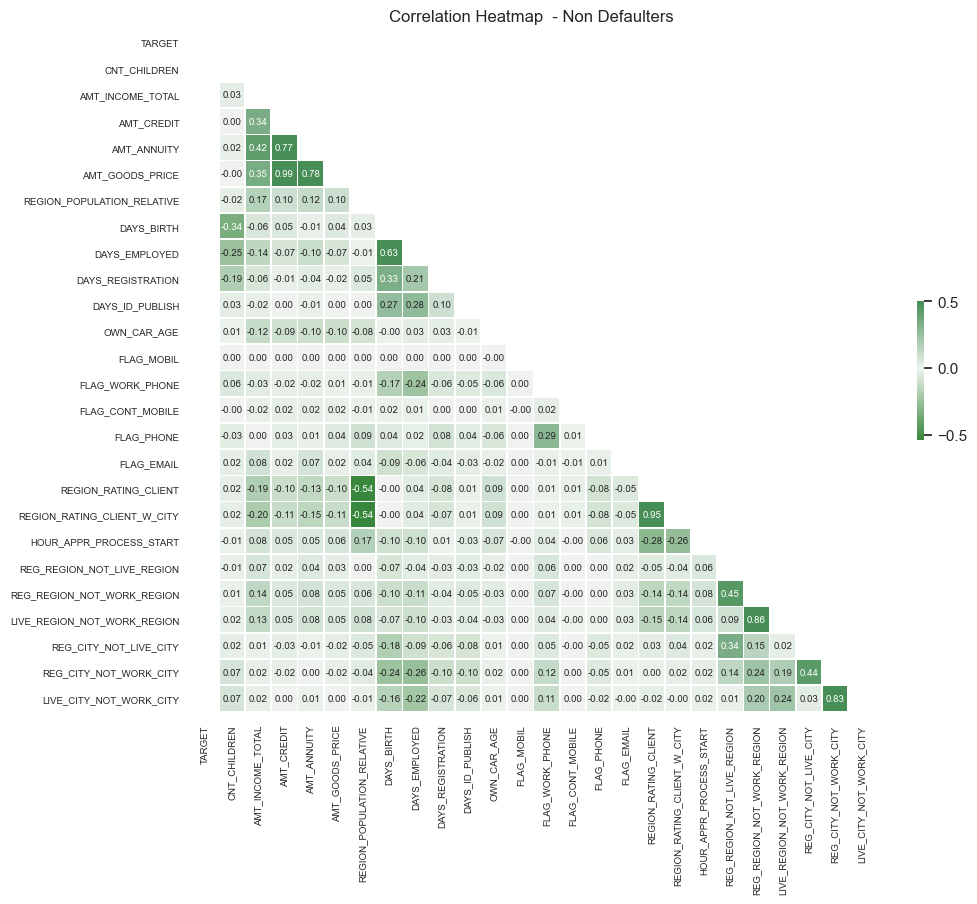

In [116]:
sns.set_theme(style="white")


# Compute the correlation matrix
corr = NUMERIC_COLS_0.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
cmap = sns.diverging_palette(129, 133, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0, annot=True, fmt='.02f',annot_kws={"size": 7},
            square=True, linewidths=.5, cbar_kws={"shrink": .2})
ax.set_title('Correlation Heatmap  - Non Defaulters ',fontsize =12)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 7)
ax.set_yticklabels(ax.get_xmajorticklabels(), fontsize = 7)

###<h4>5.5.2 Correlation Heat Map - Target 1 - Defaulters </h4>

[Text(0, 0.5, 'TARGET'),
 Text(0, 1.5, 'CNT_CHILDREN'),
 Text(0, 2.5, 'AMT_INCOME_TOTAL'),
 Text(0, 3.5, 'AMT_CREDIT'),
 Text(0, 4.5, 'AMT_ANNUITY'),
 Text(0, 5.5, 'AMT_GOODS_PRICE'),
 Text(0, 6.5, 'REGION_POPULATION_RELATIVE'),
 Text(0, 7.5, 'DAYS_BIRTH'),
 Text(0, 8.5, 'DAYS_EMPLOYED'),
 Text(0, 9.5, 'DAYS_REGISTRATION'),
 Text(0, 10.5, 'DAYS_ID_PUBLISH'),
 Text(0, 11.5, 'OWN_CAR_AGE'),
 Text(0, 12.5, 'FLAG_MOBIL'),
 Text(0, 13.5, 'FLAG_WORK_PHONE'),
 Text(0, 14.5, 'FLAG_CONT_MOBILE'),
 Text(0, 15.5, 'FLAG_PHONE'),
 Text(0, 16.5, 'FLAG_EMAIL'),
 Text(0, 17.5, 'REGION_RATING_CLIENT'),
 Text(0, 18.5, 'REGION_RATING_CLIENT_W_CITY'),
 Text(0, 19.5, 'HOUR_APPR_PROCESS_START'),
 Text(0, 20.5, 'REG_REGION_NOT_LIVE_REGION'),
 Text(0, 21.5, 'REG_REGION_NOT_WORK_REGION'),
 Text(0, 22.5, 'LIVE_REGION_NOT_WORK_REGION'),
 Text(0, 23.5, 'REG_CITY_NOT_LIVE_CITY'),
 Text(0, 24.5, 'REG_CITY_NOT_WORK_CITY'),
 Text(0, 25.5, 'LIVE_CITY_NOT_WORK_CITY')]

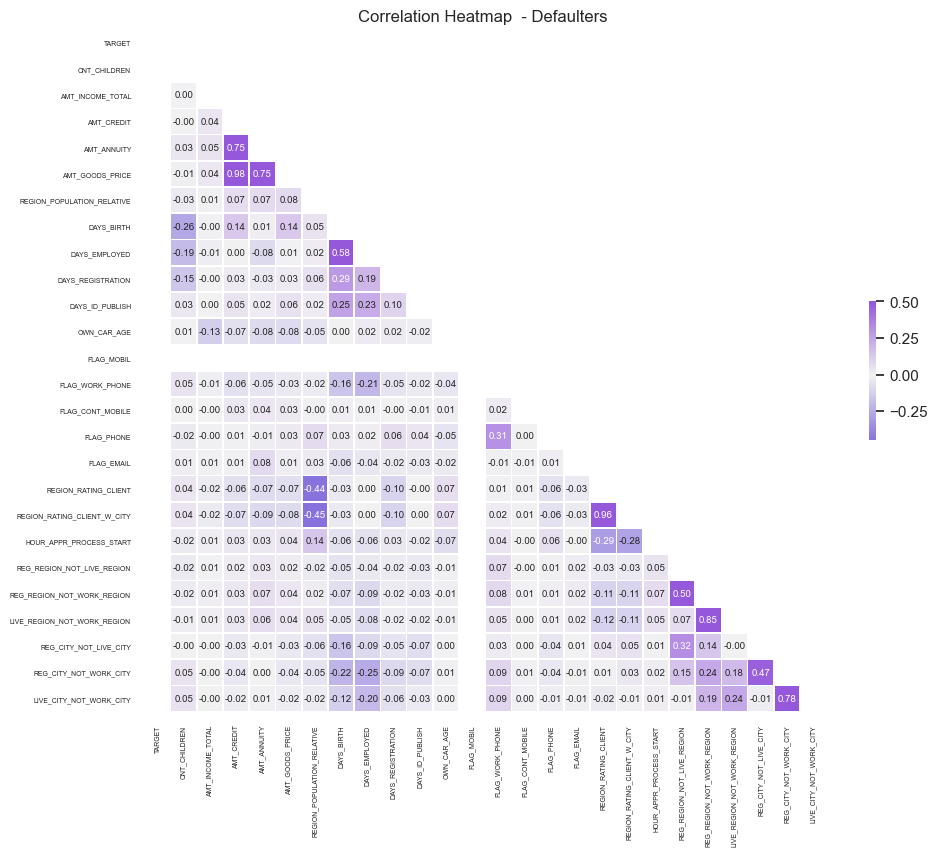

In [117]:
sns.set_theme(style="white")


# Compute the correlation matrix for Defaulters
corr = NUMERIC_COLS_1.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
cmap = sns.diverging_palette(271, 280, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0, annot=True, fmt='.02f',annot_kws={"size": 7},
            square=True, linewidths=.5, cbar_kws={"shrink": .2})
ax.set_title('Correlation Heatmap  - Defaulters ',fontsize =12)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 5)
ax.set_yticklabels(ax.get_xmajorticklabels(), fontsize = 5)

###<h3>5.5.3 Correlation Matrix - Top 10 - Non Defaulters  </h3>

In [118]:
# Top 10 correlated variables: Target 0  dataaframe

corr0 = target0_df.corr()
corrdf0 = corr0.where(np.triu(np.ones(corr0.shape), k=1).astype(np.bool))
corrdf0 = corrdf0.unstack().reset_index()
corrdf0.columns = ['Var-NDF1', 'Var-NDF2', 'Correlation']
corrdf0.dropna(subset = ['Correlation'], inplace = True)
corrdf0['Correlation'] = round(corrdf0['Correlation'], 2)
corrdf0['Correlation'] = abs(corrdf0['Correlation'])
corrdf0.sort_values(by = 'Correlation', ascending = False).head(10)
 
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



Var-NDF1                    Var-NDF2  Correlation
611                FLAG_EMP_PHONE               DAYS_EMPLOYED         1.00
1494     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE         1.00
262               AMT_GOODS_PRICE                  AMT_CREDIT         0.99
879   REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT         0.95
1538     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE         0.86
1055  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION         0.86
1187      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.83
263               AMT_GOODS_PRICE                 AMT_ANNUITY         0.78
219                   AMT_ANNUITY                  AMT_CREDIT         0.77
395                 DAYS_EMPLOYED                  DAYS_BIRTH         0.63

###<h3>5.5.4. Correlation Matrix - Top 10 - Defaulters  </h3>

In [119]:
# Top 10 correlated variables: Target 1  dataaframe


corr = target1_df.corr()
corrdf = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1-DF', 'Var2-DF', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

Var1-DF                     Var2-DF  Correlation
1494     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE         1.00
611                FLAG_EMP_PHONE               DAYS_EMPLOYED         1.00
262               AMT_GOODS_PRICE                  AMT_CREDIT         0.98
879   REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT         0.96
1538     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE         0.87
1055  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION         0.85
1187      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.78
263               AMT_GOODS_PRICE                 AMT_ANNUITY         0.75
219                   AMT_ANNUITY                  AMT_CREDIT         0.75
1363               TOTALAREA_MODE              FLOORSMAX_MEDI         0.64

### Observations on Top 10 Correlations : 
Correlation Martrix for Defaulters & Non Defaulters  are almost similar  both in terms of top 10 combinations and Association <br>

Important correlations : <br>
- Loan Value w.r.t to the item being procured and credit requested <br>
- Region where the applicant resides & its credit rating
- Loan default behaviour of persons in the neighbourhood matter as it reflects the strata of society applicant resides in <br>
- Affluence in terms of Housing may also be checked during loan approval process <br>



#<h1> 6. Previous Application </h1>
Analysis of Previous Application

#### Analyse   - previous_application.csv
(Load, Read data,  Drop Columns having  >50 % Null values)


In [120]:
dfp = pd.read_csv('previous_application.csv')
dfp.shape

(1670214, 37)

In [121]:
dfp.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [122]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [123]:
print(type(dfp))

<class 'pandas.core.frame.DataFrame'>


#### Hig Null Value Columns Check
Hig Null cases ie > 50 %- may have to drop these columns <br>
>RATE_INTEREST_PRIVILEGED       99.64 <br>
>RATE_INTEREST_PRIMARY          99.64 <br>
>RATE_DOWN_PAYMENT              53.64 <br>
>AMT_DOWN_PAYMENT               53.64 <br>

In [124]:
round(dfp.isnull().mean()*100,2).sort_values(ascending = False)

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
RATE_DOWN_PAYMENT              53.64
AMT_DOWN_PAYMENT               53.64
NAME_TYPE_SUITE                49.12
DAYS_TERMINATION               40.30
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_FIRST_DRAWING             40.30
DAYS_FIRST_DUE                 40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_LAST_DUE                  40.30
AMT_GOODS_PRICE                23.08
CNT_PAYMENT                    22.29
AMT_ANNUITY                    22.29
PRODUCT_COMBINATION             0.02
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_CREDIT                      0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
AMT_APPLICATION                 0.00
NAME_PAYMENT_TYPE               0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
C

In [125]:
print_unique_categ(dfp, 'object')

----------------------------------------------------------------------------------------------------
NAME_CONTRACT_TYPE
Counts of each category are:
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64
----------------------------------------------------------------------------------------------------
WEEKDAY_APPR_PROCESS_START
Counts of each category are:
TUESDAY      255118
WEDNESDAY    255010
MONDAY       253557
FRIDAY       252048
THURSDAY     249099
SATURDAY     240631
SUNDAY       164751
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64
----------------------------------------------------------------------------------------------------
FLAG_LAST_APPL_PER_CONTRACT
Counts of each category are:
Y    1661739
N       8475
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64
----------------------------------------------------------------------------------------------------
NAME_CASH_LOAN_PURPOSE
Counts o

##### Drop Null Value Column<br>
> Drop columns with 99% nulls RATE_INTEREST_PRIVILEGED ,RATE_INTEREST_PRIMARY 

In [126]:
dfp.drop(['RATE_INTEREST_PRIMARY'], axis=1, inplace=True)

In [127]:
dfp.shape

(1670214, 36)

In [128]:
dfp.drop(['RATE_INTEREST_PRIVILEGED'], axis=1, inplace=True)

In [129]:
dfp.shape

(1670214, 35)

In [130]:
dfp.drop(['RATE_DOWN_PAYMENT','AMT_DOWN_PAYMENT'], axis=1, inplace=True)

Number of columns having NaN values: 12 columns


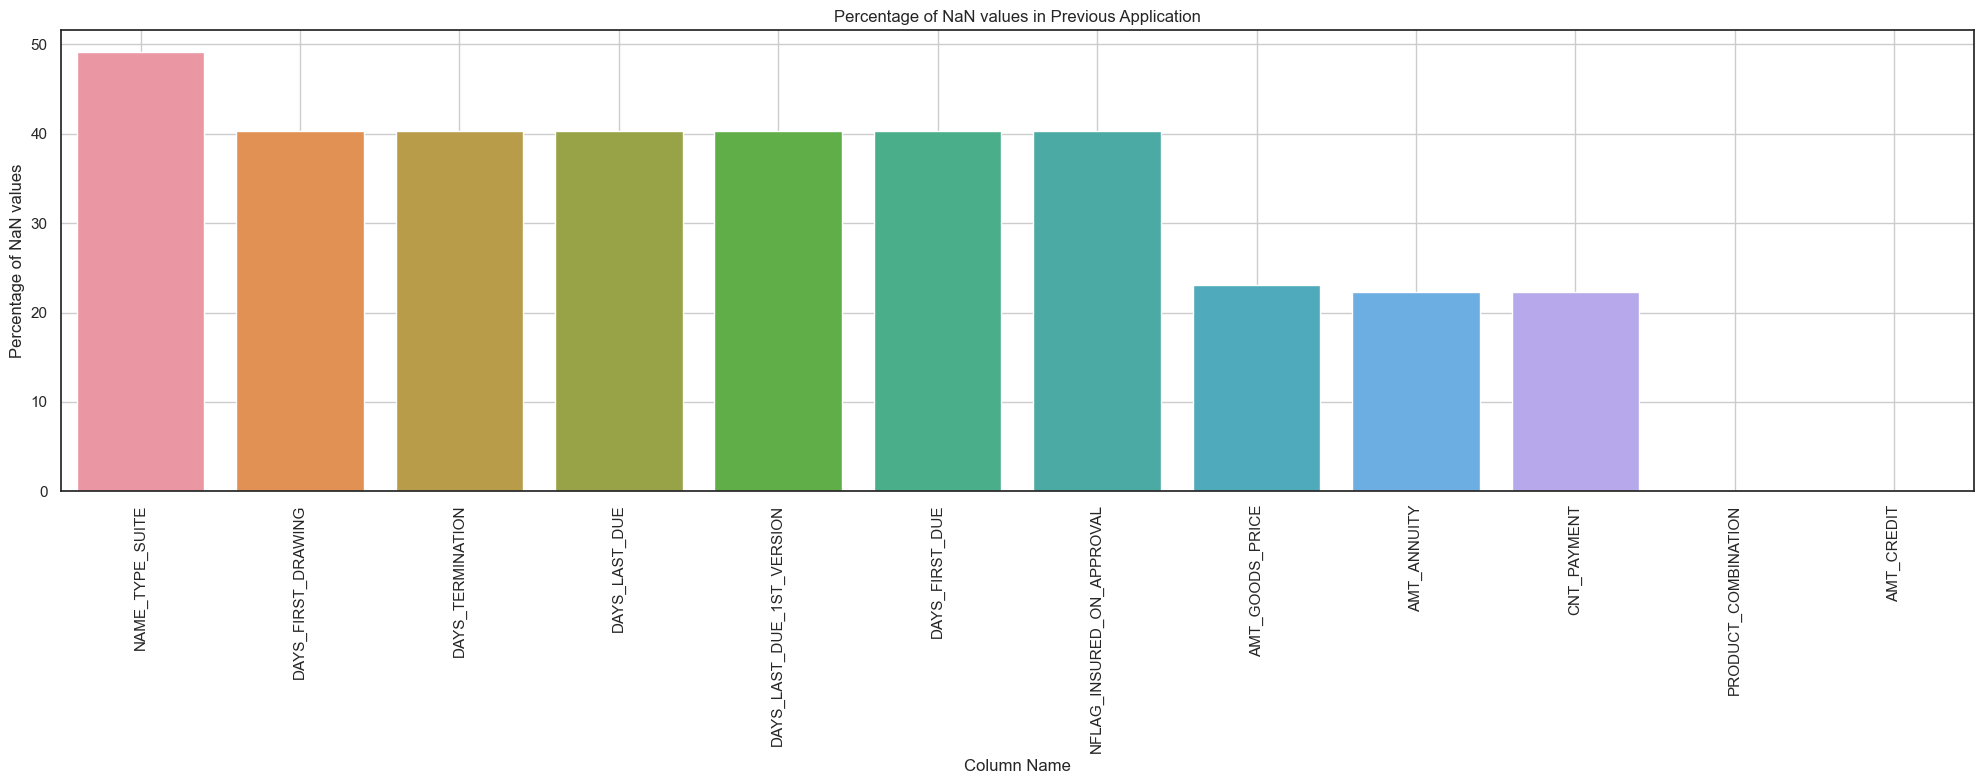

In [131]:
plot_nan_percent(nan_df_create(dfp), 'Previous Application', grid = True)

In [132]:
dfp.shape


(1670214, 33)

In [133]:
g = dfp.groupby(['NAME_CONTRACT_STATUS','NAME_CONTRACT_TYPE','NAME_PORTFOLIO'])['NAME_PRODUCT_TYPE'].count().reset_index()
g

NAME_CONTRACT_STATUS NAME_CONTRACT_TYPE NAME_PORTFOLIO  NAME_PRODUCT_TYPE
0              Approved         Cash loans           Cash             312536
1              Approved         Cash loans            XNA                  4
2              Approved     Consumer loans           Cars                263
3              Approved     Consumer loans            POS             626207
4              Approved    Revolving loans          Cards              97771
5              Canceled         Cash loans           Cash               9823
6              Canceled         Cash loans            XNA             258768
7              Canceled     Consumer loans           Cars                 44
8              Canceled     Consumer loans            POS                174
9              Canceled     Consumer loans            XNA               1341
10             Canceled    Revolving loans          Cards                473
11             Canceled    Revolving loans            XNA              45381
12             Canceled                XNA            XNA                315
13              Refused         Cash loans           Cash             139204
14              Refused         Cash loans            XNA              26724
15              Refused     Consumer loans           Cars                118
16              Refused     Consumer loans            POS              63720
17              Refused     Consumer loans            XNA              11347
18              Refused    Revolving loans          Cards              46739
19              Refused    Revolving loans            XNA               2795
20              Refused                XNA            XNA                 31
21         Unused offer         Cash loans            XNA                494
22         Unused offer     Consumer loans            POS                910
23         Unused offer     Consumer loans            XNA              25027
24         Unused offer    Revolving loans          Cards                  2
25         Unused offer    Revolving loans            XNA                  3

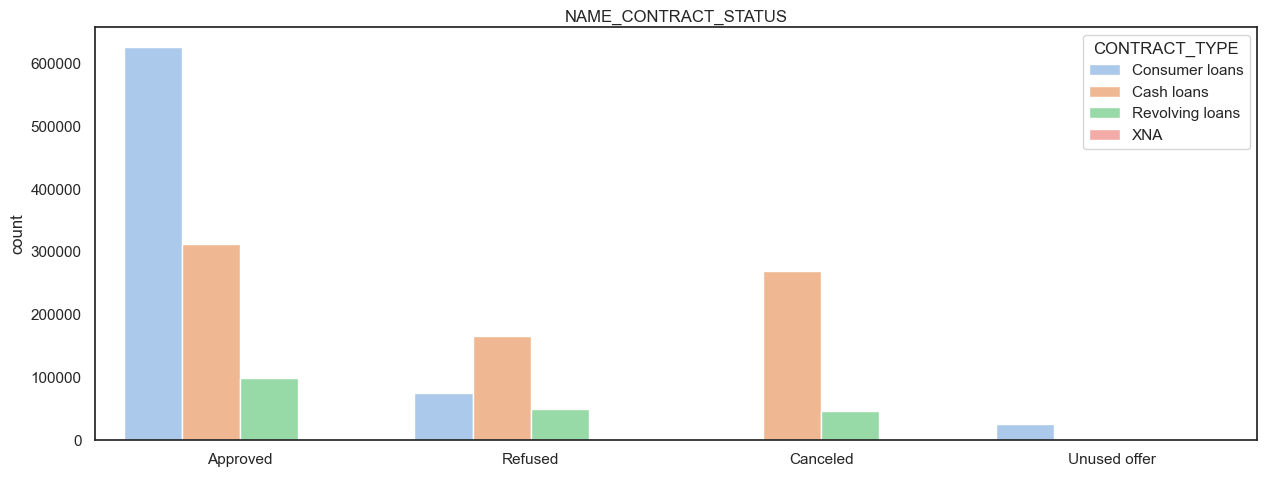

In [134]:
features = ['NAME_CONTRACT_STATUS']
countplt, ax = plt.subplots(figsize = (15,15))

for i in enumerate(features):
    plt.subplot(2, 1, i[0]+1)
    plt.subplots_adjust(hspace=0.8)
    ax = sns.countplot(x = i[1], hue = 'NAME_CONTRACT_TYPE', data = dfp, palette = 'pastel')
    
    plt.rcParams['axes.titlesize'] = 10
    
    plt.xticks(rotation = 0)
    plt.legend()
    
    ax.xaxis.set_label_position('top')
    #place legend in center right of plot
    plt.legend(loc='upper right', title='CONTRACT_TYPE')
    

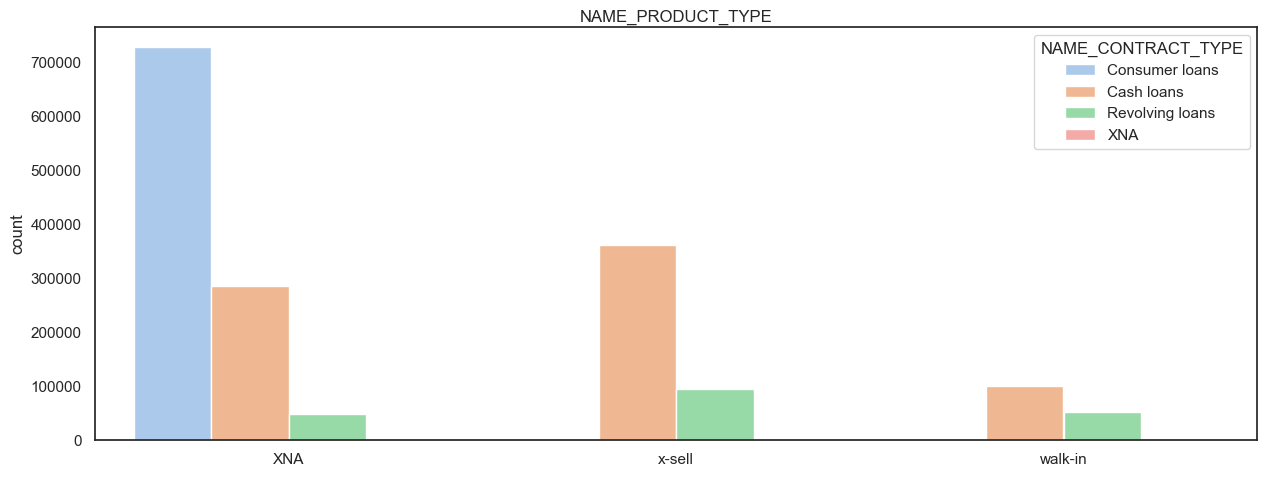

In [135]:
features = ['NAME_PRODUCT_TYPE']
countplt, ax = plt.subplots(figsize = (15,15))

for i in enumerate(features):
    plt.subplot(2, 1, i[0]+1)
    plt.subplots_adjust(hspace=0.8)
    ax = sns.countplot(x = i[1], hue = 'NAME_CONTRACT_TYPE', data = dfp, palette = 'pastel')
    
    plt.rcParams['axes.titlesize'] = 10
    
    plt.xticks(rotation = 0)
    plt.legend() 
    ax.xaxis.set_label_position('top')
    #place legend in center right of plot
    plt.legend(loc='upper right', title='NAME_CONTRACT_TYPE')

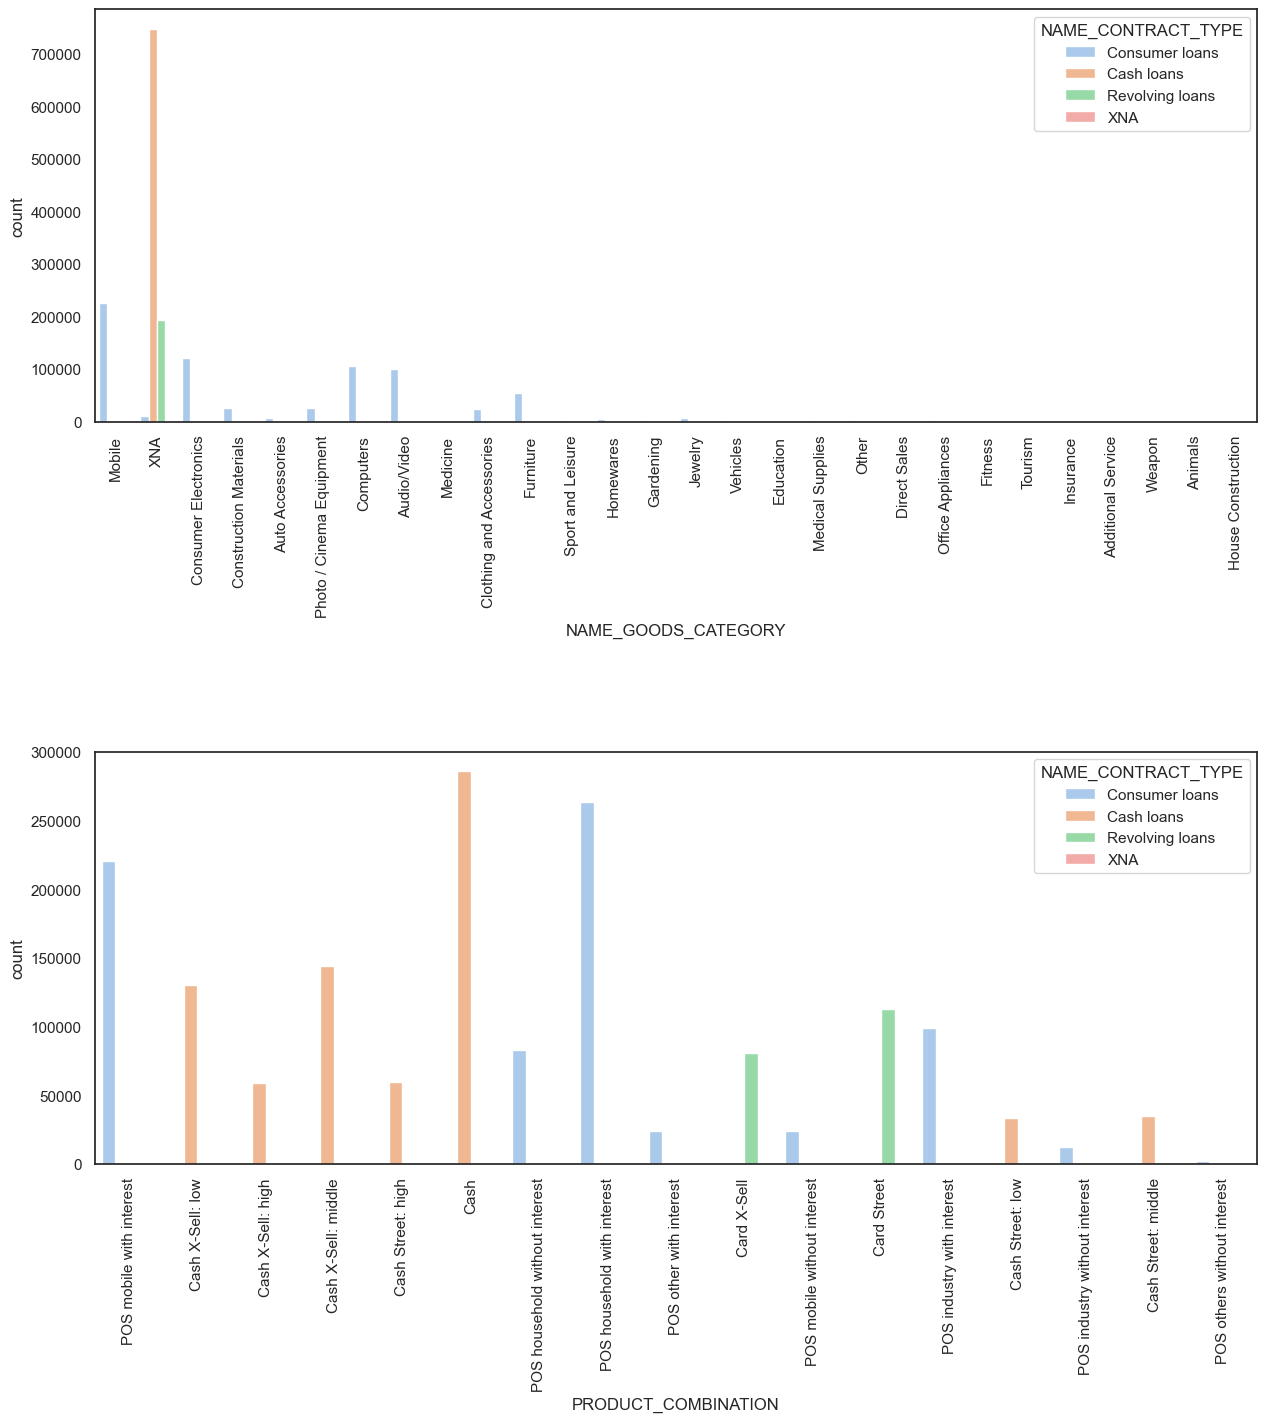

In [136]:
#BEWARE will take approx 2  mins to run!!!
features = ['NAME_GOODS_CATEGORY','PRODUCT_COMBINATION']
countplt, ax = plt.subplots(figsize = (15,15))

for i in enumerate(features):
    plt.subplot(2, 1, i[0]+1)
    plt.subplots_adjust(hspace=0.8)
    ax = sns.countplot(x = i[1], hue = 'NAME_CONTRACT_TYPE', data = dfp, palette = 'pastel')
    
    plt.rcParams['axes.titlesize'] = 10
    
    plt.xticks(rotation = 90)
    #place legend in center right of plot
    plt.legend(loc='upper right', title='NAME_CONTRACT_TYPE')

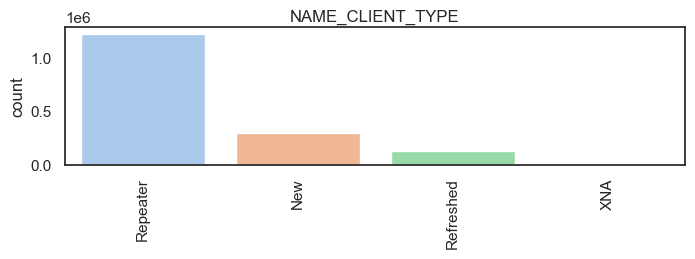

In [137]:

features = ['NAME_CLIENT_TYPE']
countplt, ax = plt.subplots(figsize = (8,5))

for i in enumerate(features):
    plt.subplot(2, 1, i[0]+1)
    plt.subplots_adjust(hspace=0.8)
    ax = sns.countplot(x = i[1],  data = dfp, palette = 'pastel')
    
    plt.rcParams['axes.titlesize'] = 10
    
    plt.xticks(rotation = 90)
    #place legend in center right of plot
    #plt.legend(loc='upper right', title='NAME_CLIENT_TYPE')
    #plt.legend() 
    ax.xaxis.set_label_position('top')
    #place legend in center right of plot
    #plt.legend(loc='upper right', title='NAME_CONTRACT_TYPE')

####  Observation : <br>
- Contract type Consumer Loans are the most preferred loans in the previous_application data as repayment is thru EMI.  <br>
-  For qualified borrowers, consumer loans serve a multitude of purposes and are essential in helping them finance their life. <br>
- Low rate of Refusal. <br>
- High rate of Cancellation for Cash Loans  ie Urgent cash needs could arranged, Rate of Interest is also high for cash loans.
- Majority of applicants are repeat customers.


         

Some Basic information about dfp = 'previous_application' and its intersection with dfn = 'application'

In [138]:
print(f'The shape of previous_application.csv loaded into dfp is: {dfp.shape}')

print(f'Number of unique SK_ID_PREV in dfp  are: {len(dfp.SK_ID_PREV.unique())}')
print(f'Number of unique SK_ID_CURR in dfp are: {len(dfp.SK_ID_CURR.unique())}')
print(f'Number of overlapping SK_ID_CURR in dfn and dfp are: {len(set(dfn.SK_ID_CURR.unique()).intersection(set(dfp.SK_ID_CURR.unique())))}')
print(f'Number of duplicate values in previous_application: {dfp.shape[0] - dfp.duplicated().shape[0]}')

display(dfp.head(5))

The shape of previous_application.csv loaded into dfp is: (1670214, 33)
Number of unique SK_ID_PREV in dfp  are: 1670214
Number of unique SK_ID_CURR in dfp are: 338857
Number of overlapping SK_ID_CURR in dfn and dfp are: 291057
Number of duplicate values in previous_application: 0


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0           -42.0                      300.0          -42.0             -37.0   
1          -134.0                      916.0       365243.0          365243.0   
2          -271.0                       59.0       365243.0          365243.0   
3          -482.0                     -152.0         -182.0            -177.0   
4             NaN                        NaN            NaN               NaN   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1 

# <h1> 7. Merging Current and Previous data </h1>

In [139]:
df_comb = pd.merge(left=dfn,right=dfp,how='left',on='SK_ID_CURR')
df_comb.shape

(1430155, 91)

In [140]:
df_comb.shape

(1430155, 91)

In [141]:
df_comb.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0        24700.5           351000.0     Unaccompanied          Working   
1        35698.5          1129500.0            Family    State servant   
2        35698.5          1129500.0            Family    State servant   
3        35698.5          1129500.0            Family    State servant   
4         6750.0           135000.0     Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.003541       16765           1188             1186.0   
3                    0.003541       16765           1188             1186.0   
4                    0.010032       19046            225             4260.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120          NaN           1               1                0   
1              291          NaN           1               1                0   
2              291          NaN           1               1                0   
3              291          NaN           1               1                0   
4             2531         26.0           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers               1   
1                 1           1           0      Core staff               2   
2                 1           1           0      Core staff               2   
3                 1           1           0      Core staff               2   
4                 1           1           0        Laborers               1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                    WEDNESDAY                         10   
1                       MONDAY                         11   
2                       MONDAY                         11   
3                       MONDAY                         11   
4                       MONDAY                          9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1       

### 7.1 Analysing the Combined Data

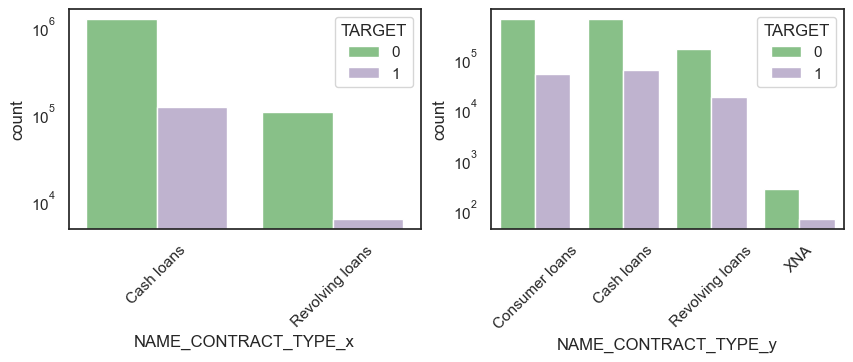

In [142]:
features = ['NAME_CONTRACT_TYPE_x','NAME_CONTRACT_TYPE_y']
countplt, ax = plt.subplots(figsize = (10,8))

for i in enumerate(features):
    plt.subplot(2, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.8)
    ax = sns.countplot(x = i[1], hue = 'TARGET', data = df_comb, palette = 'Accent')
    
    plt.rcParams['axes.titlesize'] = 10
    
    plt.xticks(rotation = 45)
    plt.yscale('log')

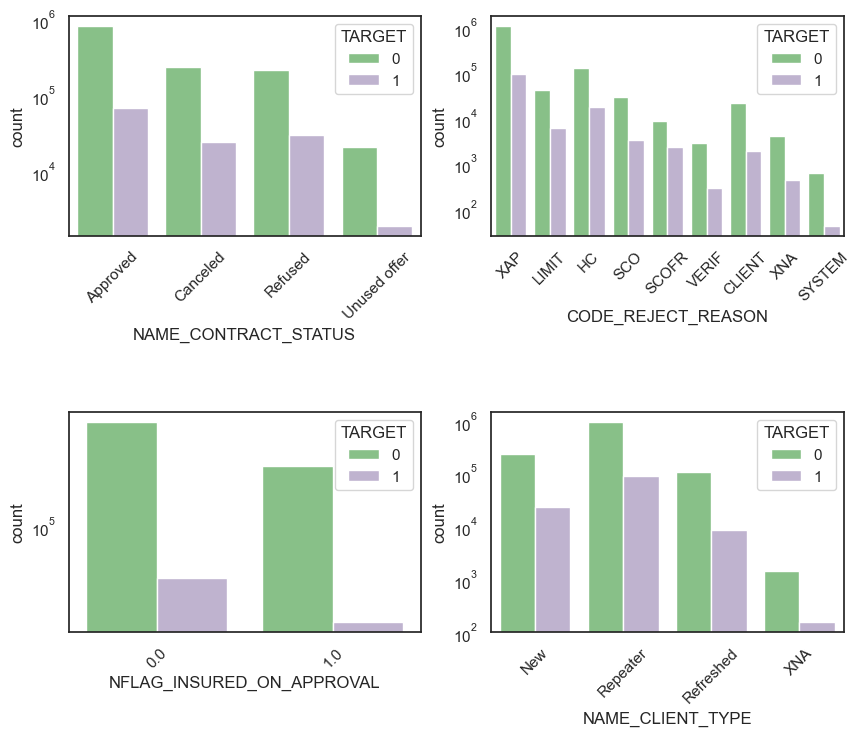

In [143]:
features = ['NAME_CONTRACT_STATUS','CODE_REJECT_REASON','NFLAG_INSURED_ON_APPROVAL','NAME_CLIENT_TYPE']
countplt, ax = plt.subplots(figsize = (10,8))

for i in enumerate(features):
    plt.subplot(2, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.8)
    ax = sns.countplot(x = i[1], hue = 'TARGET', data = df_comb, palette = 'Accent')
    
    plt.rcParams['axes.titlesize'] = 10
    
    plt.xticks(rotation = 45)
    plt.yscale('log')
    


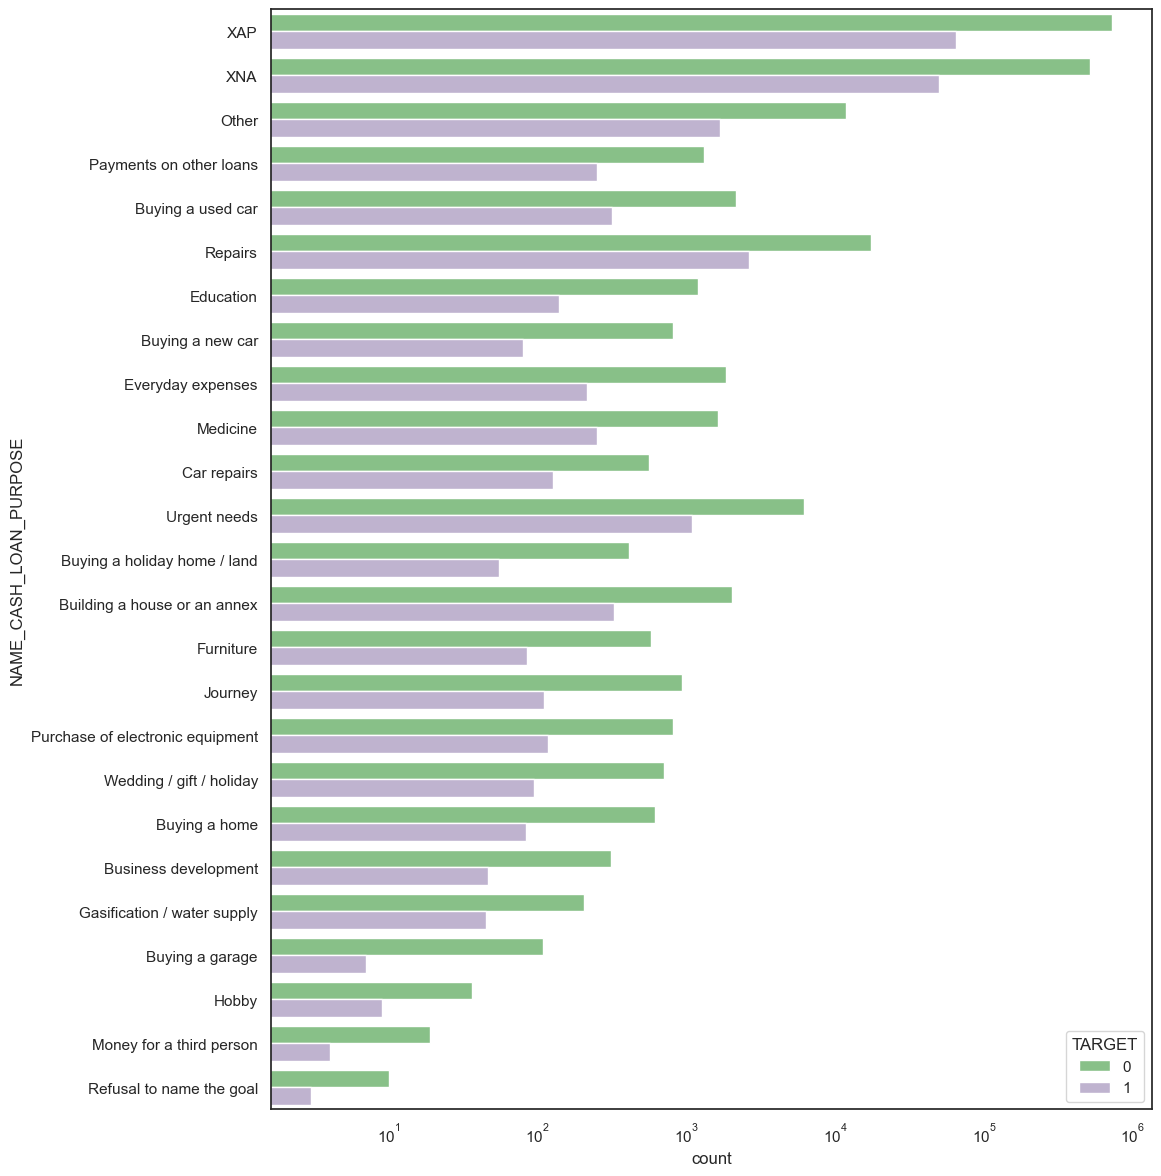

In [144]:
features = ['NAME_CASH_LOAN_PURPOSE']
countplt, ax = plt.subplots(figsize = (25,40))

for i in enumerate(features):
    plt.subplot(2, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.8)
    ax = sns.countplot(y = i[1], hue = 'TARGET', data = df_comb, palette = 'Accent')
    
    plt.rcParams['axes.titlesize'] = 4
    
    plt.xticks(rotation = 0)
    plt.xscale('log')

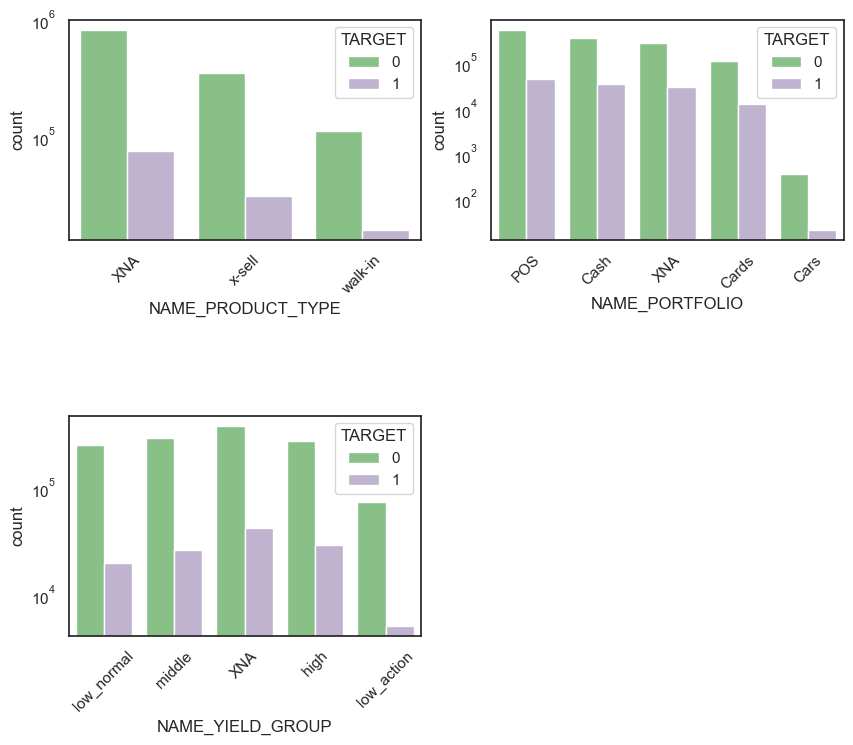

In [145]:
features = ['NAME_PRODUCT_TYPE','NAME_PORTFOLIO','NAME_YIELD_GROUP']
countplt, ax = plt.subplots(figsize = (10,8))

for i in enumerate(features):
    plt.subplot(2, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.8)
    ax = sns.countplot(x = i[1], hue = 'TARGET', data = df_comb, palette = 'Accent')
    
    plt.rcParams['axes.titlesize'] = 10
    
    plt.xticks(rotation = 45)
    plt.yscale('log')
    

#### Observation :
> 1.Contract Type :Previous History shows 'Consumer Loans', the current Application data has information does not show borrowing against consumer loans <br>
>   Defaults are higher in history of the Borrowers for Consumer, Revolving & Cash , History of previous loans is IMPORTANT <br>

> 2.Contract Status : Defaulters will likely be rejected for HC, SCOFR,LIMIT  reasons. The rejection reasons are missing in many cases <br>
> 3.CASH_LOAN_PURPOSE : Defaulters primarily in Urgent Need, Others, Repair Jobs ,however not very conclusive as high % of missing values <br>
> 4.CLIENT_TYPE Defaulters high in Repeater &  New Applicants <br>
> 5.No Conclusive inference can be made on the basis of loan product_type, portfolio, yield_group ( also confirmed by correlation matrix)
 

### 7.2 Correlation Matrixes

In [146]:
#List of NUMERIC_COLS with Traget as 1
NUMERIC_COLS_0m = df_comb[['TARGET', 'CNT_CHILDREN',  'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x',
                    'AMT_GOODS_PRICE_x', 'AMT_APPLICATION', 'DAYS_FIRST_DRAWING',
                      'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH','DAYS_DECISION','DAYS_FIRST_DRAWING','DAYS_LAST_DUE',
                           'DAYS_TERMINATION','DAYS_EMPLOYED', 'DAYS_REGISTRATION',  'DAYS_ID_PUBLISH' ,  'OWN_CAR_AGE',
                    'FLAG_MOBIL',  'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 
                    'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
                     'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
                    'LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
                    'LIVE_CITY_NOT_WORK_CITY' ,  ]]
NUMERIC_COLS_0m.drop(NUMERIC_COLS_0m[NUMERIC_COLS_0m['TARGET'] == 1].index, inplace = True)
NUMERIC_COLS_0m.shape

(1306815, 32)

In [147]:
#List of NUMERIC_COLS with Traget as 0
NUMERIC_COLS_1m = df_comb[['TARGET', 'CNT_CHILDREN',  'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x',
                    'AMT_GOODS_PRICE_x', 'AMT_APPLICATION', 'DAYS_FIRST_DRAWING',
                      'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH','DAYS_DECISION','DAYS_FIRST_DRAWING','DAYS_LAST_DUE',
                           'DAYS_TERMINATION','DAYS_EMPLOYED', 'DAYS_REGISTRATION',  'DAYS_ID_PUBLISH' ,  'OWN_CAR_AGE',
                    'FLAG_MOBIL',  'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 
                    'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
                     'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
                    'LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
                    'LIVE_CITY_NOT_WORK_CITY' ,  ]]
NUMERIC_COLS_1m.drop(NUMERIC_COLS_1m[NUMERIC_COLS_1m['TARGET'] == 0].index, inplace = True)
NUMERIC_COLS_1m.shape

(123340, 32)

[Text(0, 0.5, 'TARGET'),
 Text(0, 1.5, 'CNT_CHILDREN'),
 Text(0, 2.5, 'AMT_INCOME_TOTAL'),
 Text(0, 3.5, 'AMT_CREDIT_x'),
 Text(0, 4.5, 'AMT_ANNUITY_x'),
 Text(0, 5.5, 'AMT_GOODS_PRICE_x'),
 Text(0, 6.5, 'AMT_APPLICATION'),
 Text(0, 7.5, 'DAYS_FIRST_DRAWING'),
 Text(0, 8.5, 'REGION_POPULATION_RELATIVE'),
 Text(0, 9.5, 'DAYS_BIRTH'),
 Text(0, 10.5, 'DAYS_DECISION'),
 Text(0, 11.5, 'DAYS_FIRST_DRAWING'),
 Text(0, 12.5, 'DAYS_LAST_DUE'),
 Text(0, 13.5, 'DAYS_TERMINATION'),
 Text(0, 14.5, 'DAYS_EMPLOYED'),
 Text(0, 15.5, 'DAYS_REGISTRATION'),
 Text(0, 16.5, 'DAYS_ID_PUBLISH'),
 Text(0, 17.5, 'OWN_CAR_AGE'),
 Text(0, 18.5, 'FLAG_MOBIL'),
 Text(0, 19.5, 'FLAG_WORK_PHONE'),
 Text(0, 20.5, 'FLAG_CONT_MOBILE'),
 Text(0, 21.5, 'FLAG_PHONE'),
 Text(0, 22.5, 'FLAG_EMAIL'),
 Text(0, 23.5, 'REGION_RATING_CLIENT'),
 Text(0, 24.5, 'REGION_RATING_CLIENT_W_CITY'),
 Text(0, 25.5, 'REG_REGION_NOT_LIVE_REGION'),
 Text(0, 26.5, 'REG_REGION_NOT_WORK_REGION'),
 Text(0, 27.5, 'LIVE_REGION_NOT_WORK_REGION'),
 T

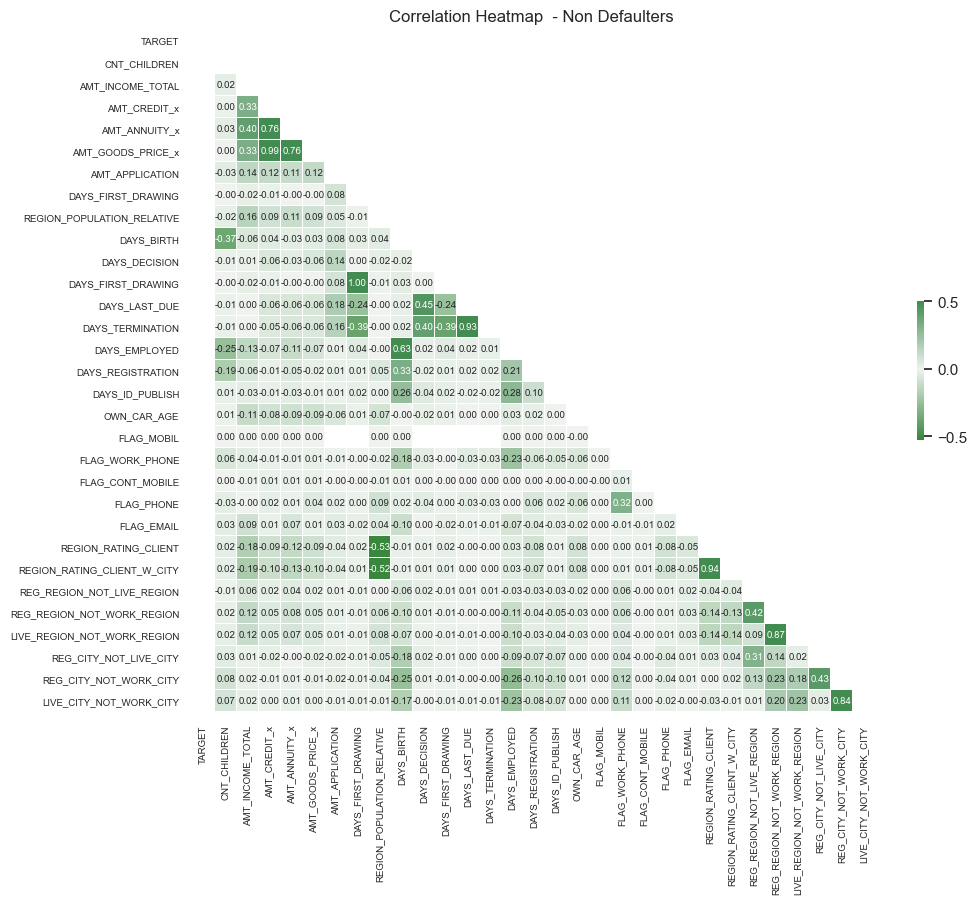

In [148]:
# Compute the correlation matrix
corr = NUMERIC_COLS_0m.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
cmap = sns.diverging_palette(129, 133, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0, annot=True, fmt='.02f',annot_kws={"size": 7},
            square=True, linewidths=.5, cbar_kws={"shrink": .2})
ax.set_title('Correlation Heatmap  - Non Defaulters ',fontsize =12)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 7)
ax.set_yticklabels(ax.get_xmajorticklabels(), fontsize = 7)

[Text(0, 0.5, 'TARGET'),
 Text(0, 1.5, 'CNT_CHILDREN'),
 Text(0, 2.5, 'AMT_INCOME_TOTAL'),
 Text(0, 3.5, 'AMT_CREDIT'),
 Text(0, 4.5, 'AMT_ANNUITY'),
 Text(0, 5.5, 'AMT_GOODS_PRICE'),
 Text(0, 6.5, 'REGION_POPULATION_RELATIVE'),
 Text(0, 7.5, 'DAYS_BIRTH'),
 Text(0, 8.5, 'DAYS_EMPLOYED'),
 Text(0, 9.5, 'DAYS_REGISTRATION'),
 Text(0, 10.5, 'DAYS_ID_PUBLISH'),
 Text(0, 11.5, 'OWN_CAR_AGE'),
 Text(0, 12.5, 'FLAG_MOBIL'),
 Text(0, 13.5, 'FLAG_WORK_PHONE'),
 Text(0, 14.5, 'FLAG_CONT_MOBILE'),
 Text(0, 15.5, 'FLAG_PHONE'),
 Text(0, 16.5, 'FLAG_EMAIL'),
 Text(0, 17.5, 'REGION_RATING_CLIENT'),
 Text(0, 18.5, 'REGION_RATING_CLIENT_W_CITY'),
 Text(0, 19.5, 'HOUR_APPR_PROCESS_START'),
 Text(0, 20.5, 'REG_REGION_NOT_LIVE_REGION'),
 Text(0, 21.5, 'REG_REGION_NOT_WORK_REGION'),
 Text(0, 22.5, 'LIVE_REGION_NOT_WORK_REGION'),
 Text(0, 23.5, 'REG_CITY_NOT_LIVE_CITY'),
 Text(0, 24.5, 'REG_CITY_NOT_WORK_CITY'),
 Text(0, 25.5, 'LIVE_CITY_NOT_WORK_CITY')]

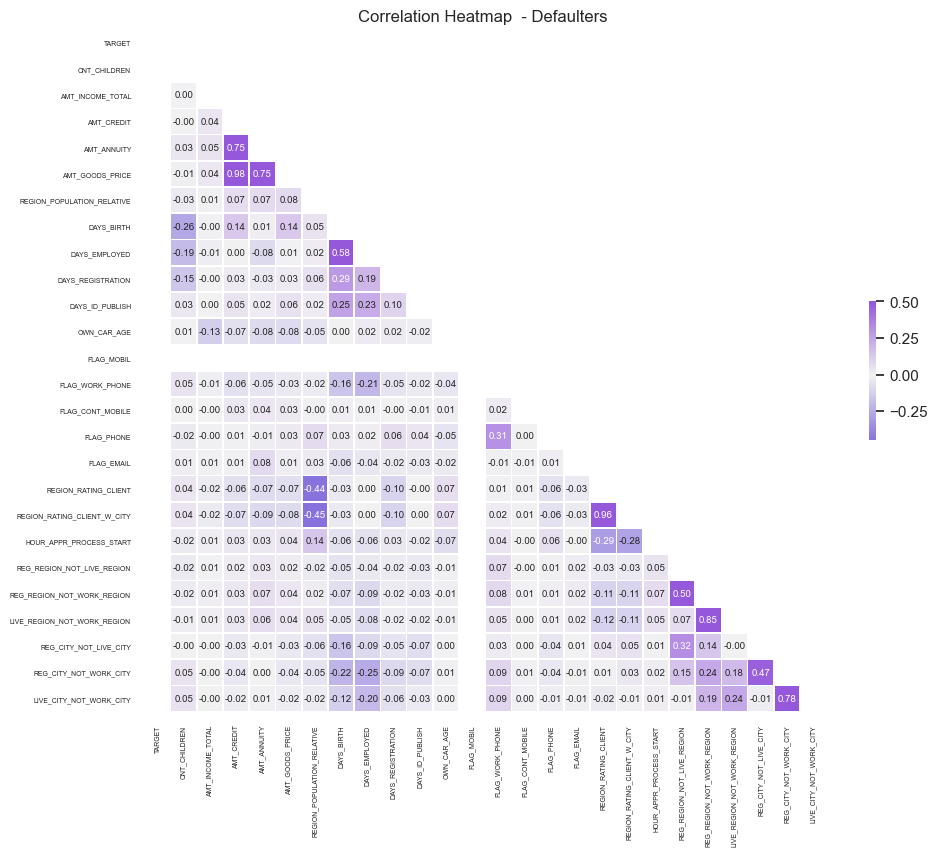

In [149]:
sns.set_theme(style="white")


# Compute the correlation matrix for Defaulters
corr = NUMERIC_COLS_1.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
cmap = sns.diverging_palette(271, 280, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0, annot=True, fmt='.02f',annot_kws={"size": 7},
            square=True, linewidths=.5, cbar_kws={"shrink": .2})
ax.set_title('Correlation Heatmap  - Defaulters ',fontsize =12)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 5)
ax.set_yticklabels(ax.get_xmajorticklabels(), fontsize = 5)

In [150]:
# Top 10 correlated variables: Target 0  dataaframe

corr = NUMERIC_COLS_0m.corr()
corrdf = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

Var1                        Var2  Correlation
348           DAYS_FIRST_DRAWING          DAYS_FIRST_DRAWING         1.00
158            AMT_GOODS_PRICE_x                AMT_CREDIT_x         0.99
767  REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT         0.94
415             DAYS_TERMINATION               DAYS_LAST_DUE         0.93
863  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION         0.87
959      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.84
159            AMT_GOODS_PRICE_x               AMT_ANNUITY_x         0.76
127                AMT_ANNUITY_x                AMT_CREDIT_x         0.76
443                DAYS_EMPLOYED                  DAYS_BIRTH         0.63
721         REGION_RATING_CLIENT  REGION_POPULATION_RELATIVE         0.53

In [151]:
# Top 10 correlated variables: Target 0  dataaframe

corr = NUMERIC_COLS_1m.corr()
corrdf = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

Var1                        Var2  Correlation
348           DAYS_FIRST_DRAWING          DAYS_FIRST_DRAWING         1.00
158            AMT_GOODS_PRICE_x                AMT_CREDIT_x         0.98
767  REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT         0.96
415             DAYS_TERMINATION               DAYS_LAST_DUE         0.94
863  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION         0.87
959      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.79
127                AMT_ANNUITY_x                AMT_CREDIT_x         0.75
159            AMT_GOODS_PRICE_x               AMT_ANNUITY_x         0.75
443                DAYS_EMPLOYED                  DAYS_BIRTH         0.59
410             DAYS_TERMINATION          DAYS_FIRST_DRAWING         0.47

###  Observations:
> The merged data  is aligned with results of 'application data'  , new associations not evident <br>
> Possible Reason : The previous application data has loan primarily for CONTRACT_TYPE = Cash , which is not present in Application data. <br>



# <h1>8.  Final Insight</h1>
##### Previous application data may be used to do a background check on the Customer, keeping an eye over the following variables: <br> 
>>  1. Past Default history against Loan types and overall default history of the applicant should be examined. <br>
>>  2. Income vs Loan Amt, if the loan amount vs Income ratio is higher, the chances of loan to be dafault gets higher. <br>
>>  3. A slight chance of deferral is there with higher number of  Annuity<br>
>>  4. Reason for loan <br>
>>  5. Numbers of inquires to the Credit Bureau against the applicant <br>


#####  Othe variables to be considered are the  Personal & Social  traits ie <br>
>>  6. Financial status of the application : Income and assets like Car, House  which may be used for collateral 
>>  7. Education , Occupation  Marital Status 
>>  8. Region Rating & Social parameters 
>>  9. Credit score is an important parameter
